In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chapter 8 - Advanced Data Analysis

In [2]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                     index_col = [0,1],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

In [3]:
data.index[0]

('AGO', Timestamp('1970-01-01 00:00:00'))

## Isolate each individual that comprises the multiindex

In [4]:
countries = data.index.get_level_values("ISO_Code_3").unique()
countries

Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='ISO_Code_3', length=165)

In [5]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [6]:
index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  

def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):
    data[indicator_name] = 0
    data[indicator_name][data.index.get_level_values(
        index_name).isin(target_index_list)] = 1

create_indicator_variable(data = data, indicator_name = indicator_name, 
                              index_name = index_name, target_index_list=countries_in_north_america)
data.loc["USA"]

C:\Users\hthog\AppData\Local\Temp\ipykernel_11868\3954288911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name][data.index.get_level_values(


ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

## Plotting Indicator Variables in Scatter

C:\Users\hthog\AppData\Local\Temp\ipykernel_11868\3957794067.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,12))


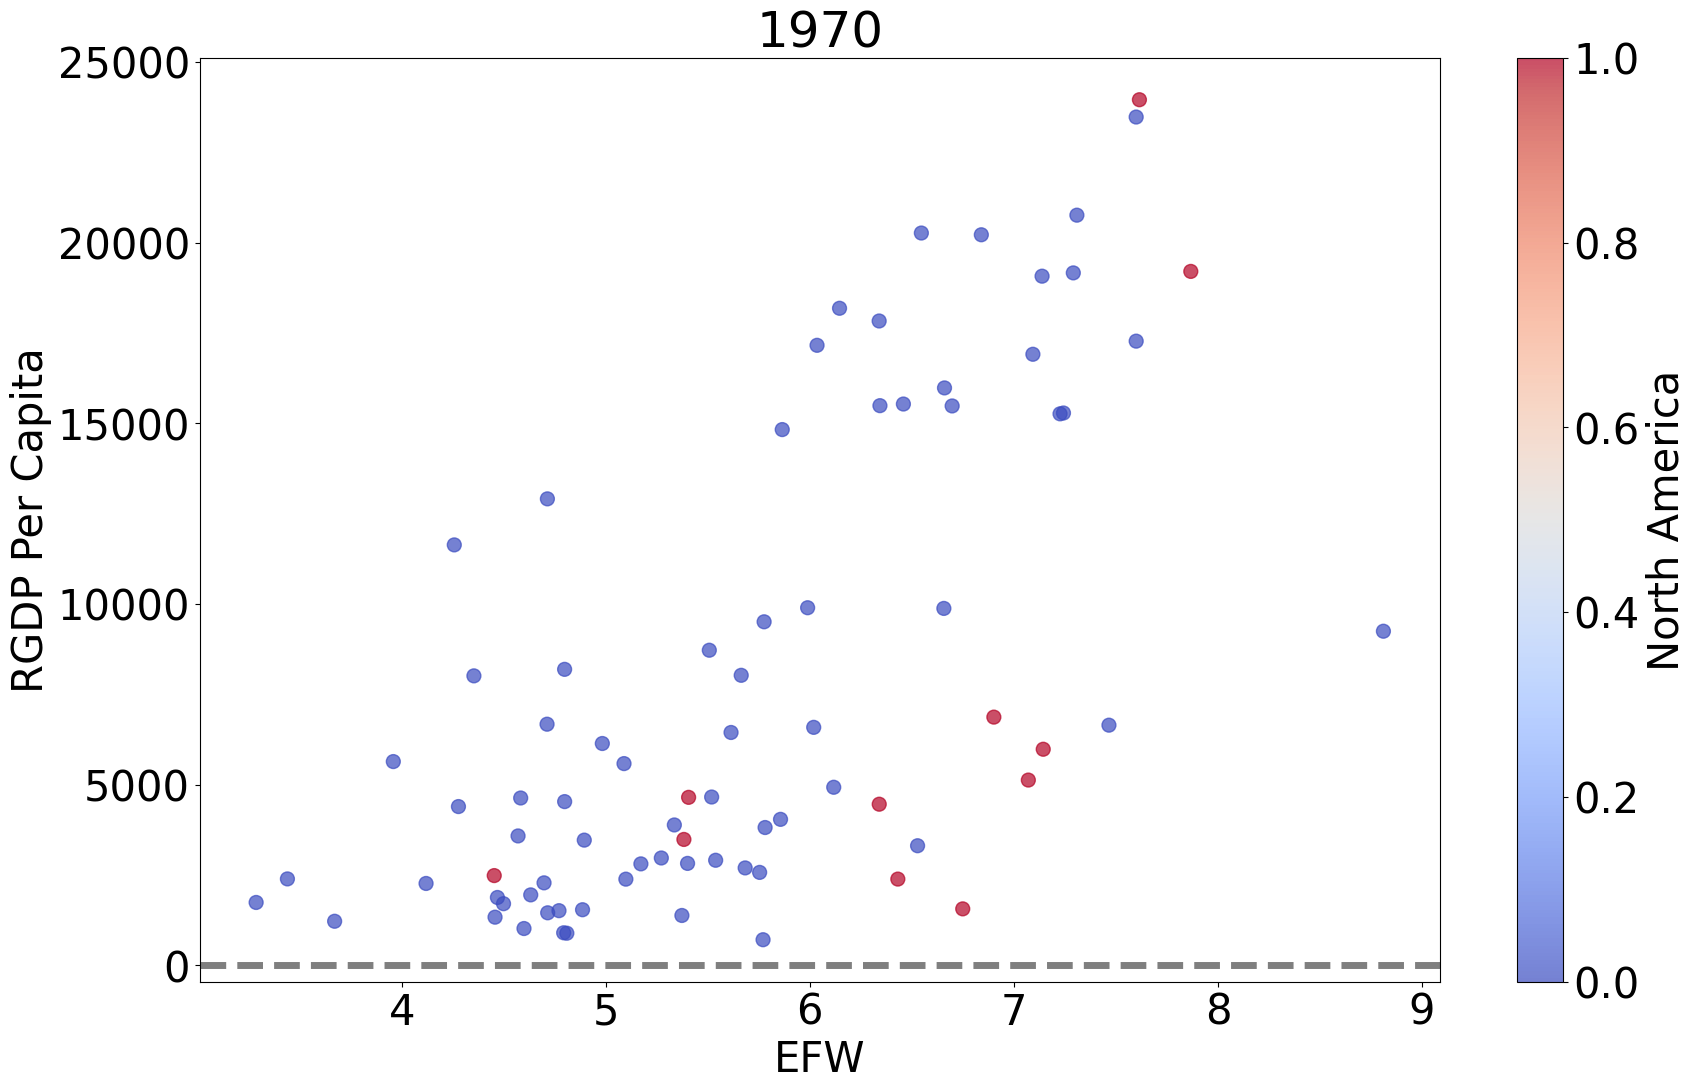

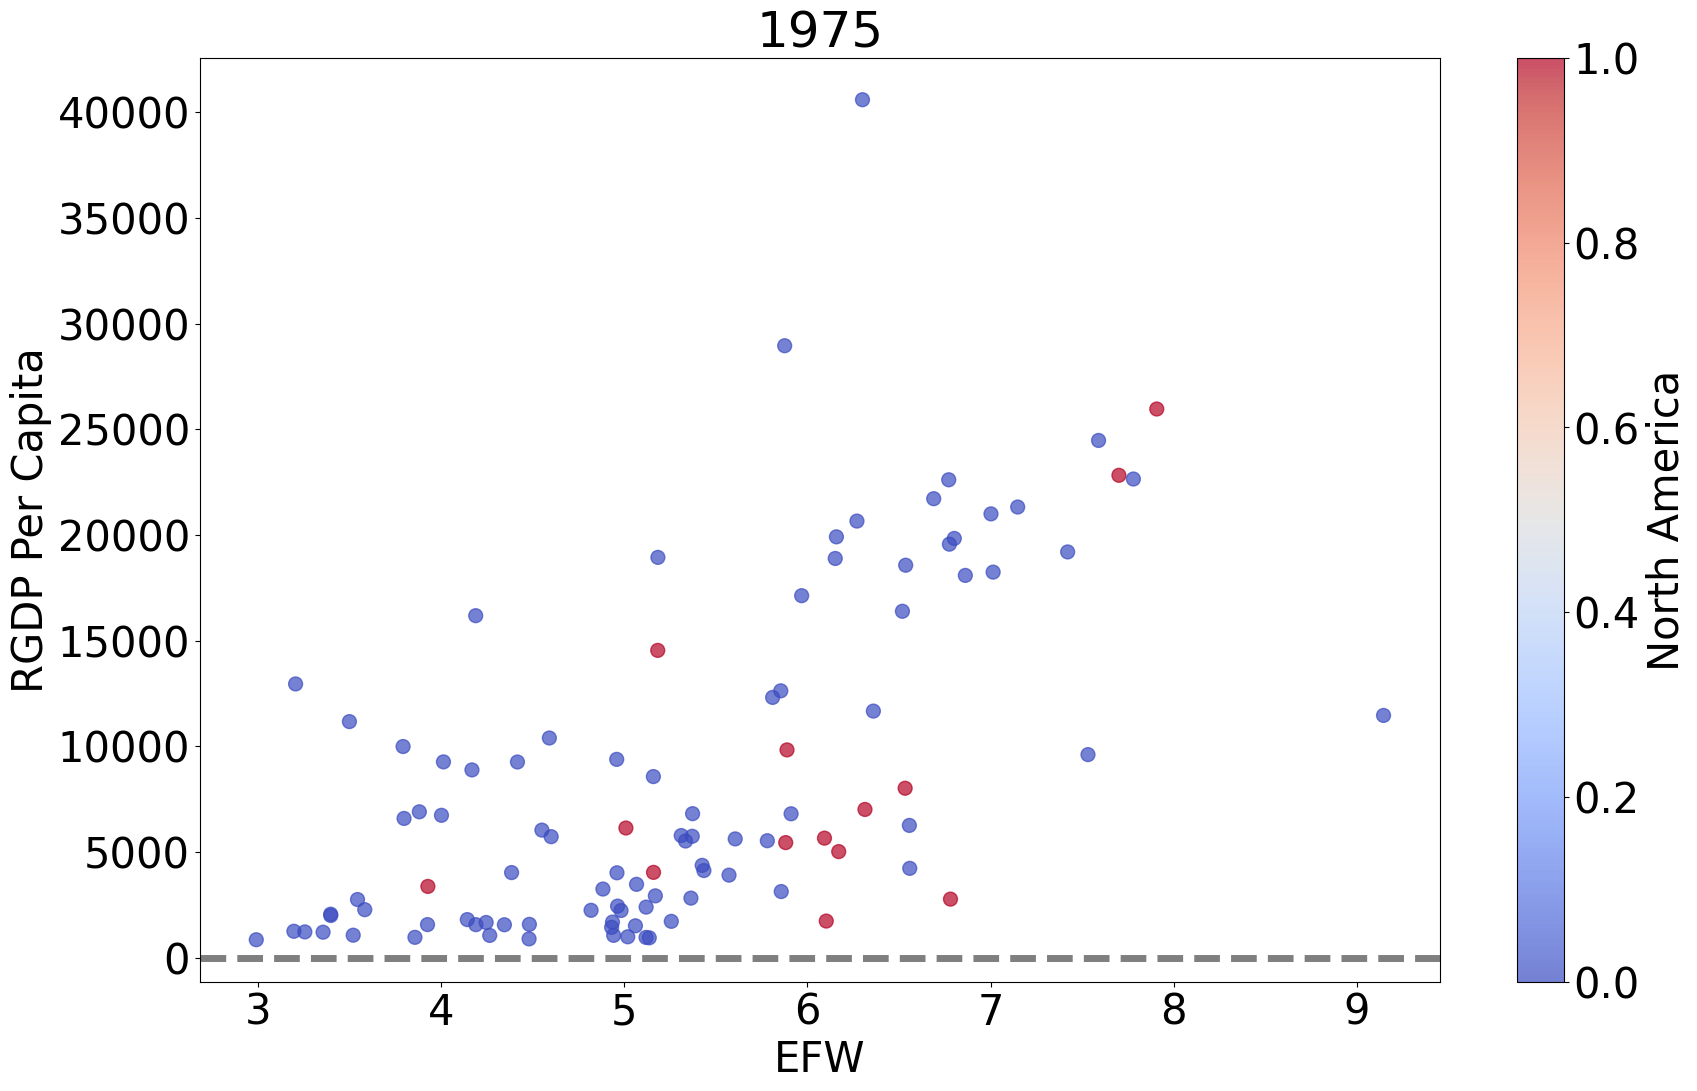

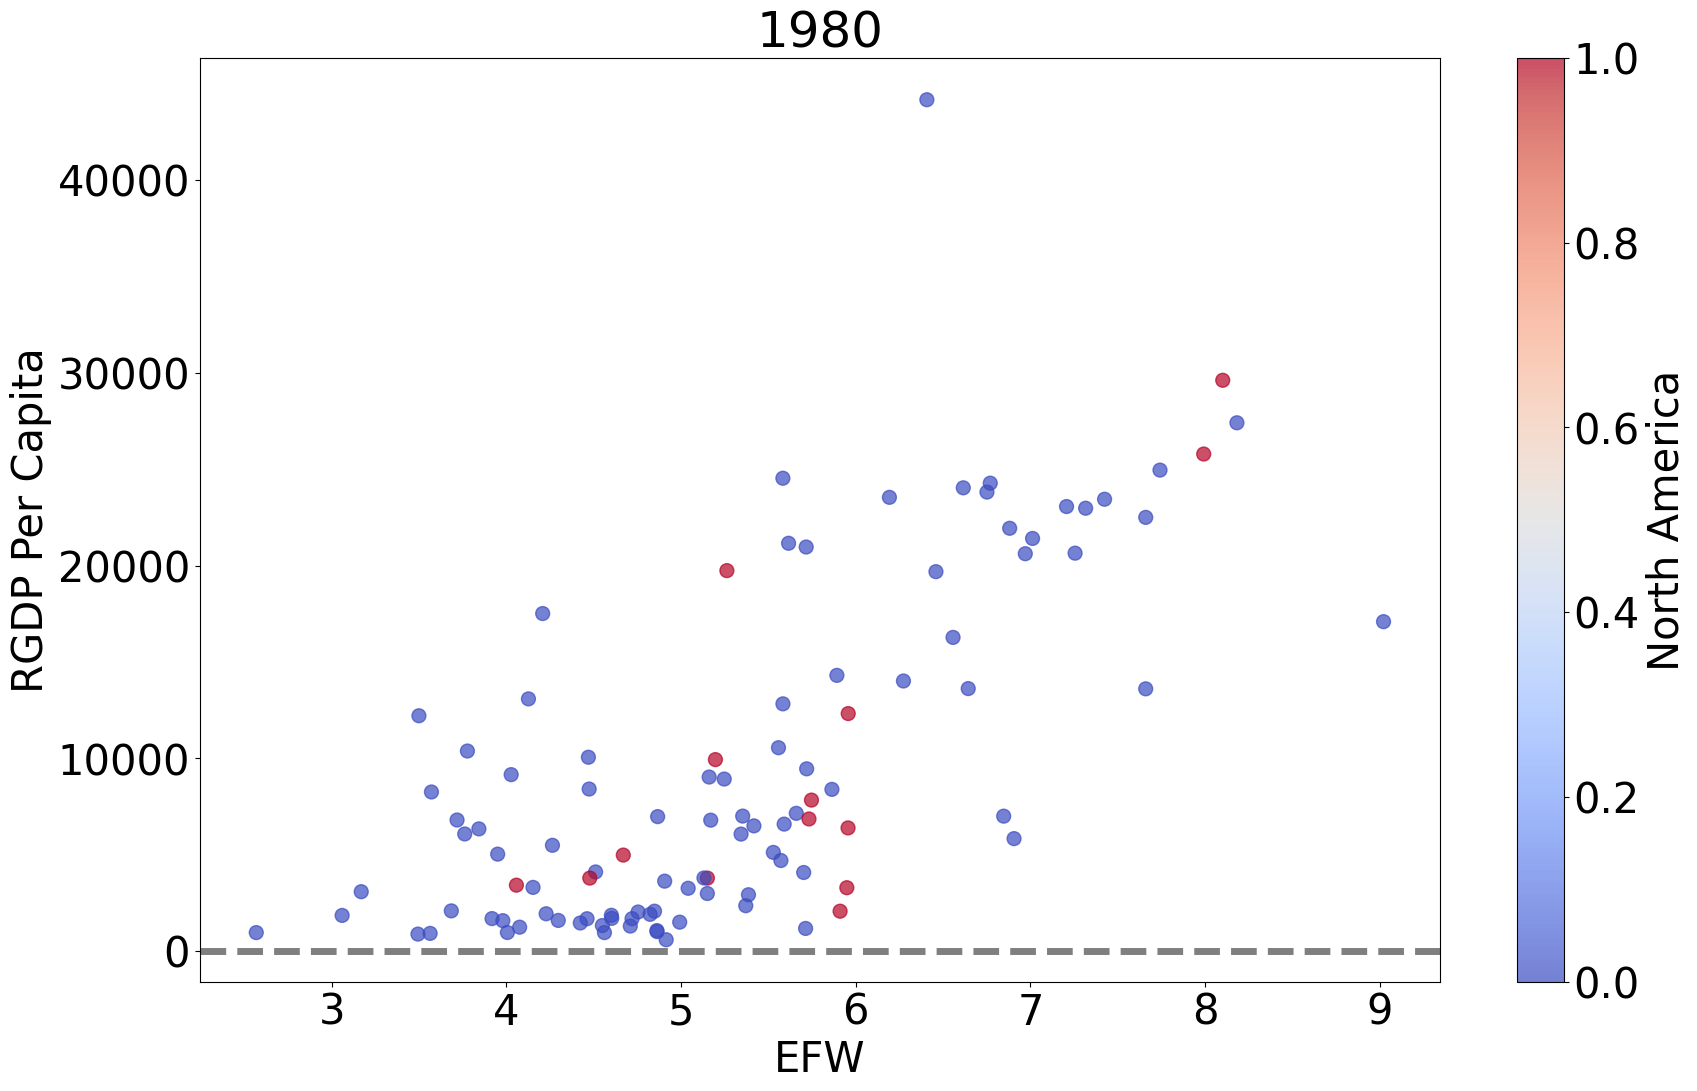

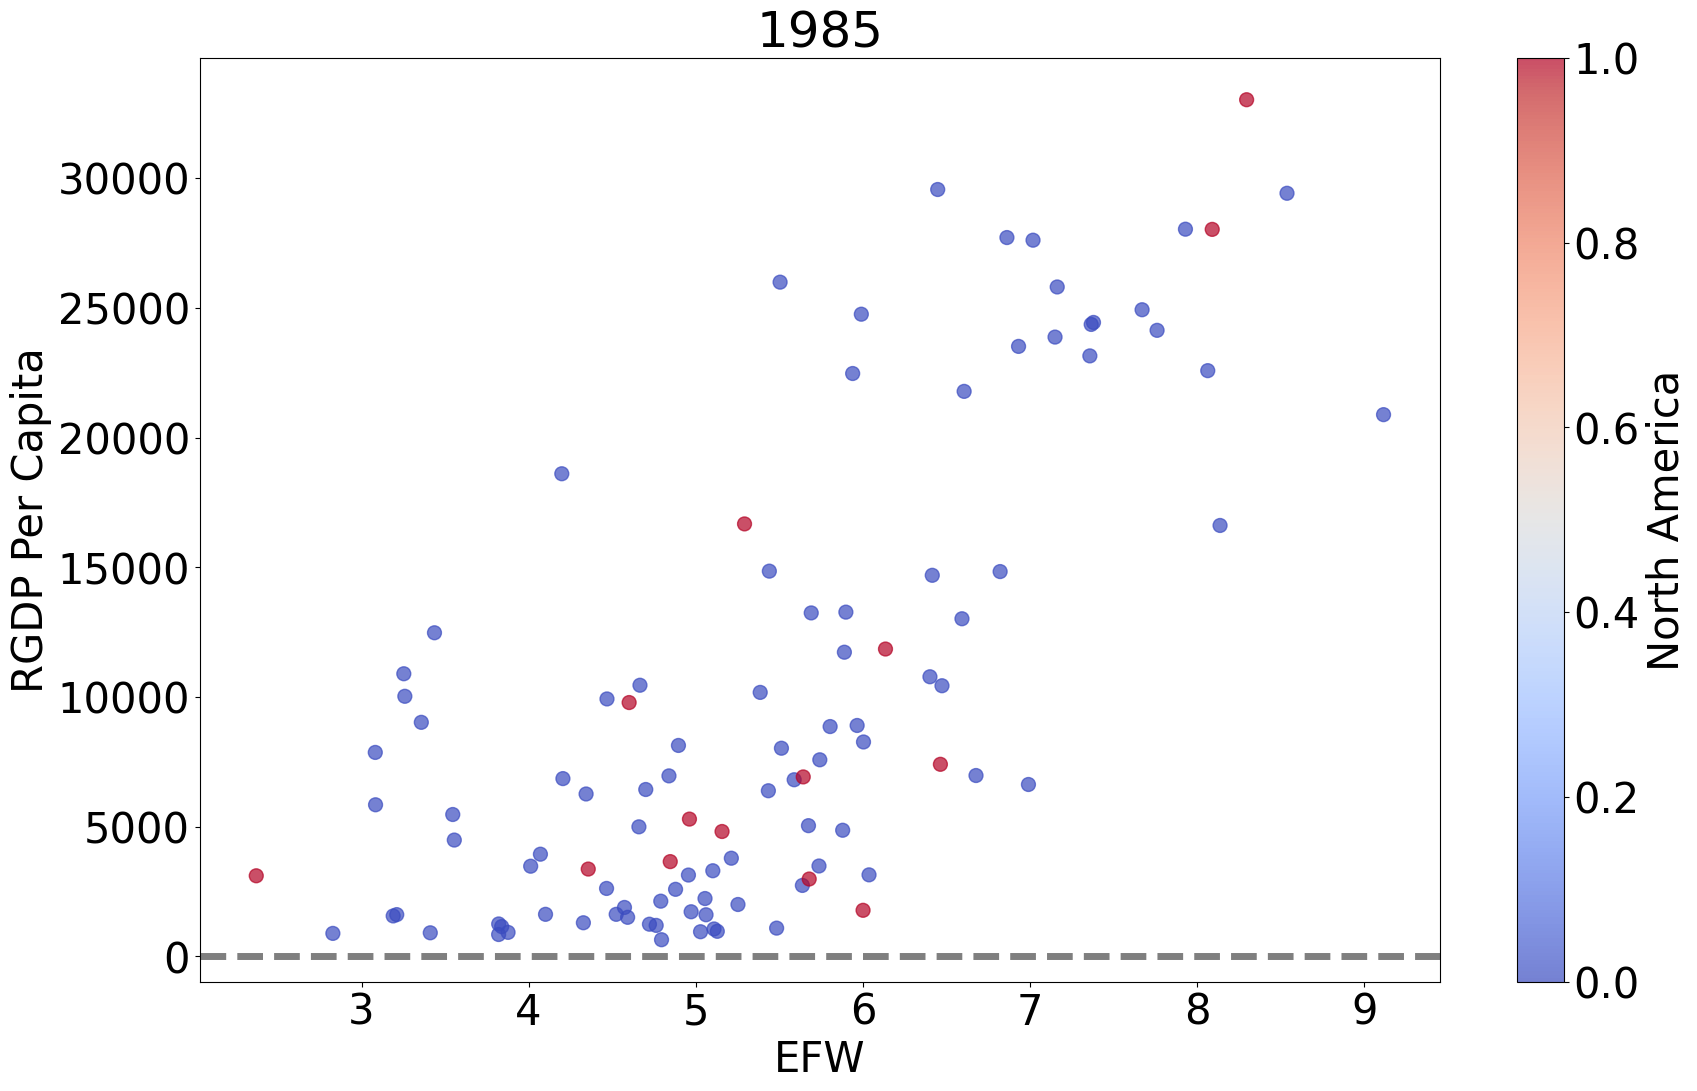

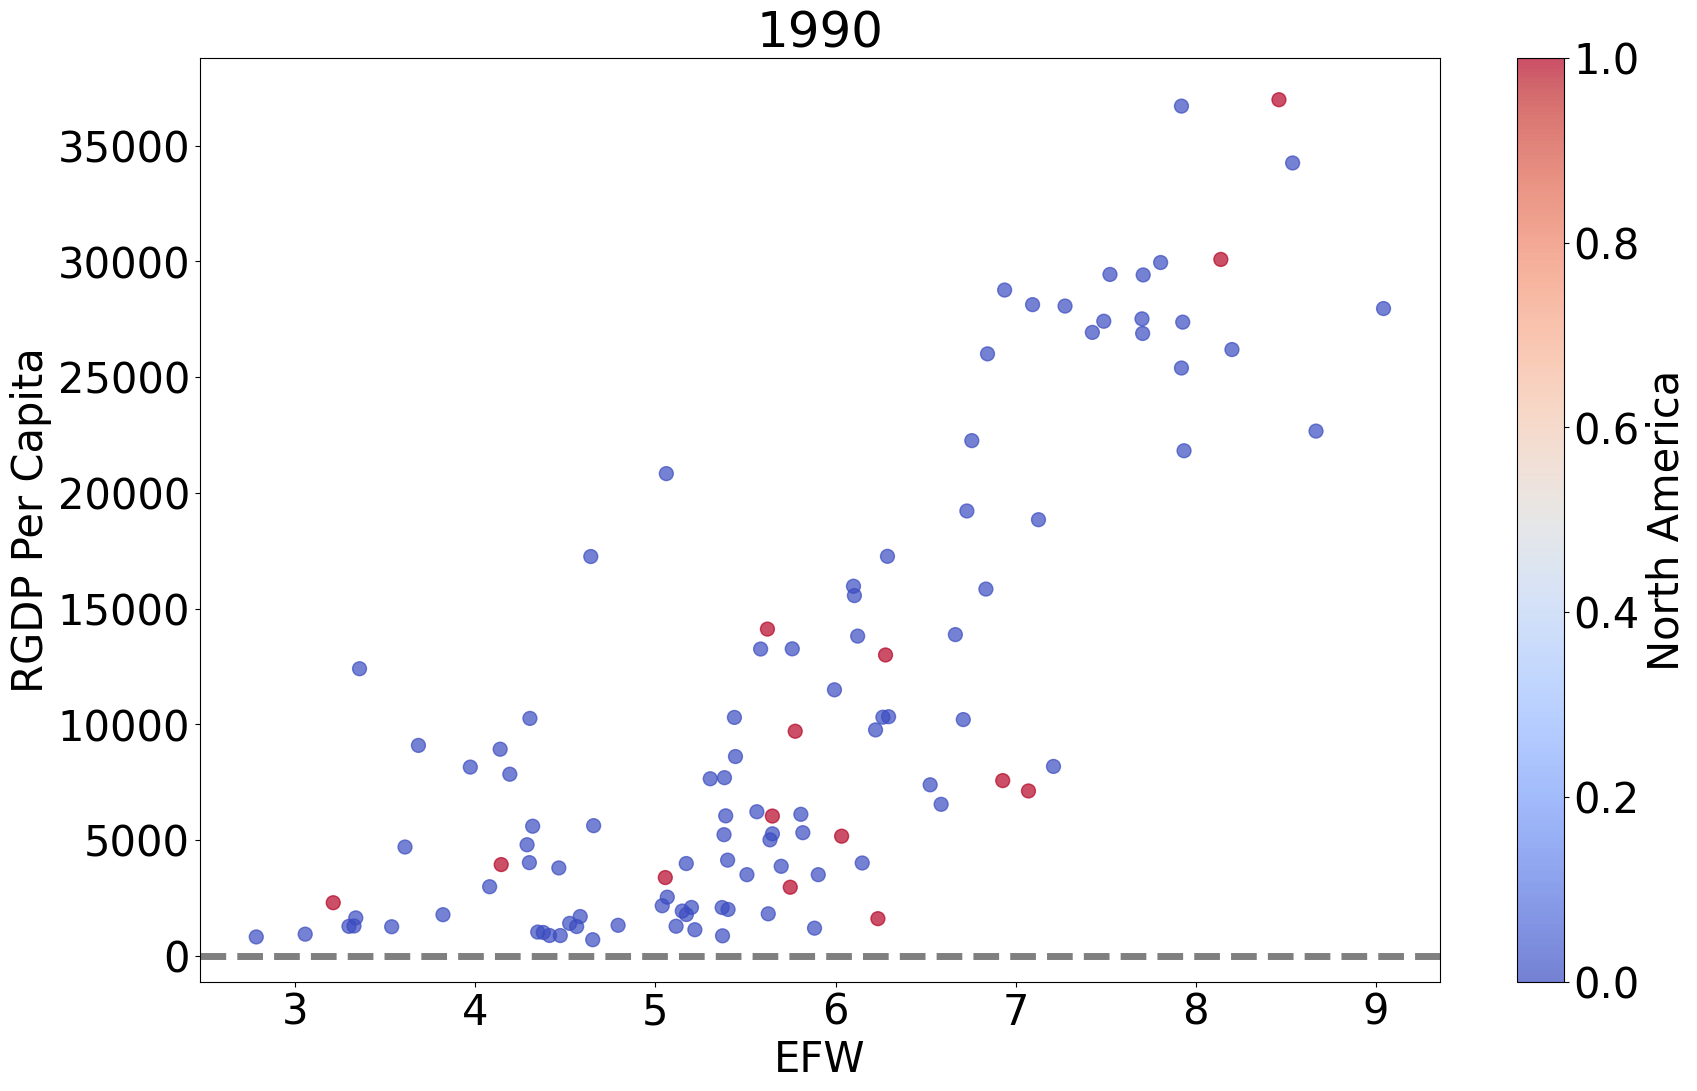

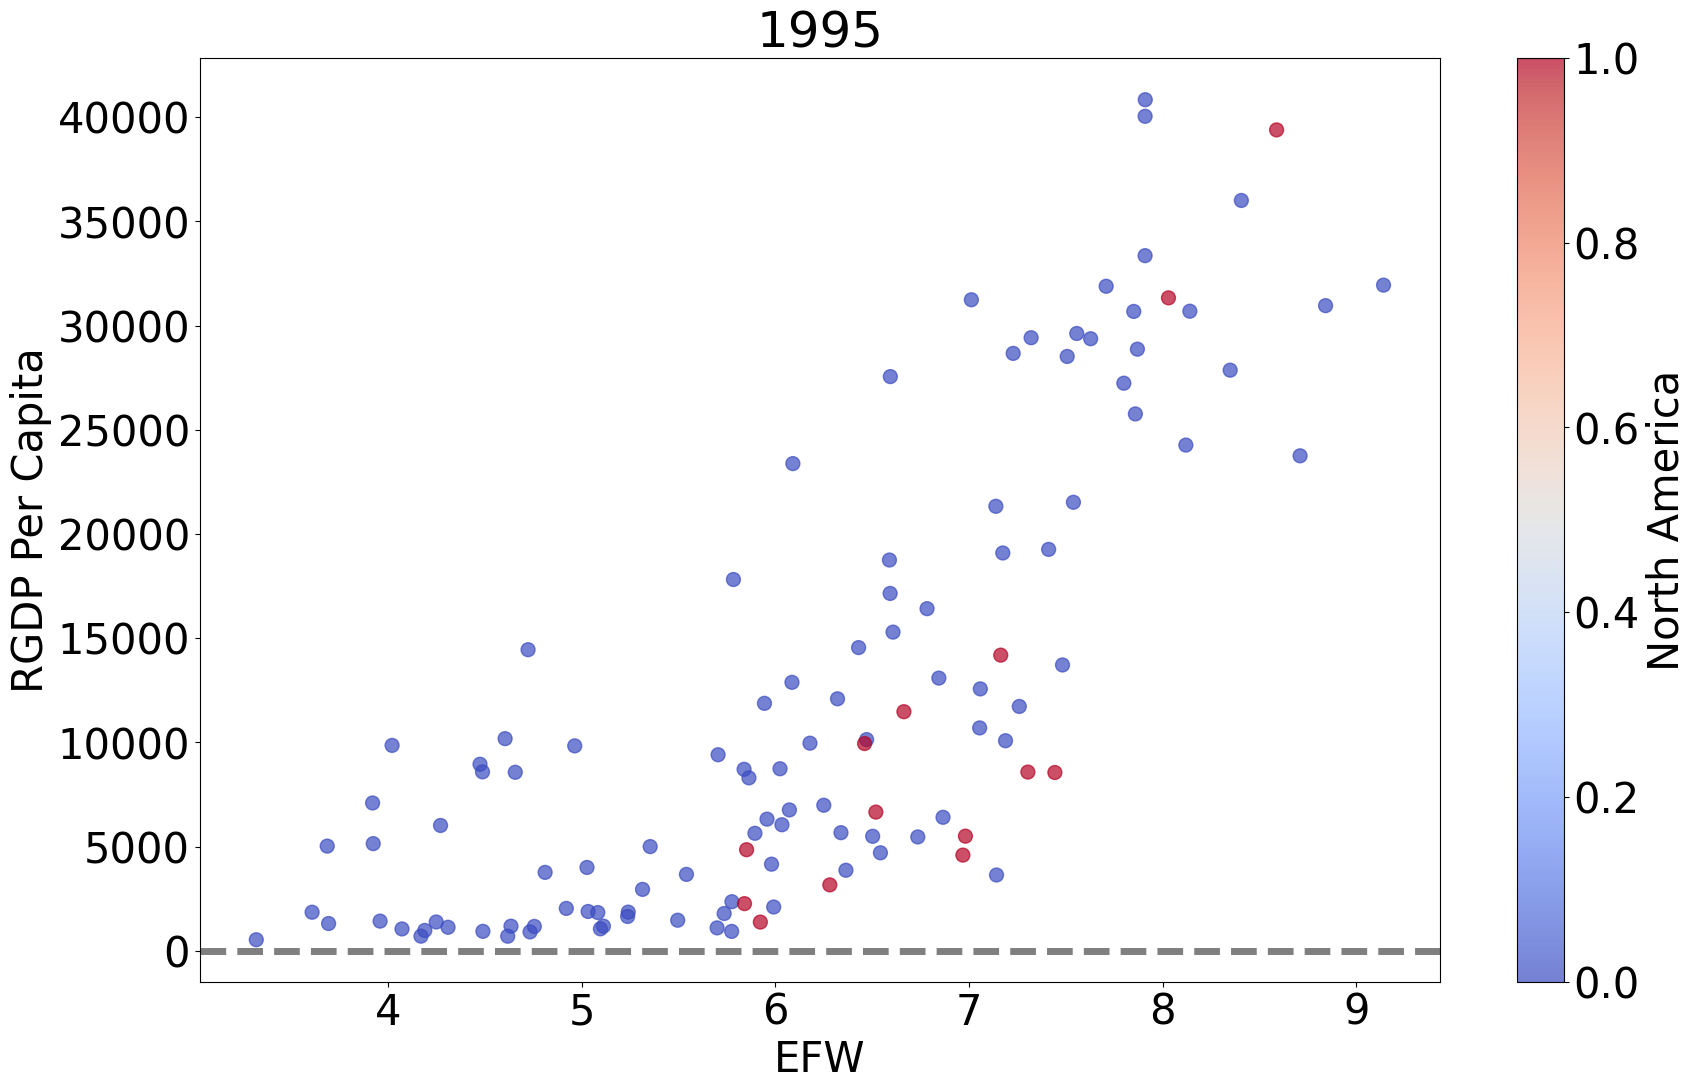

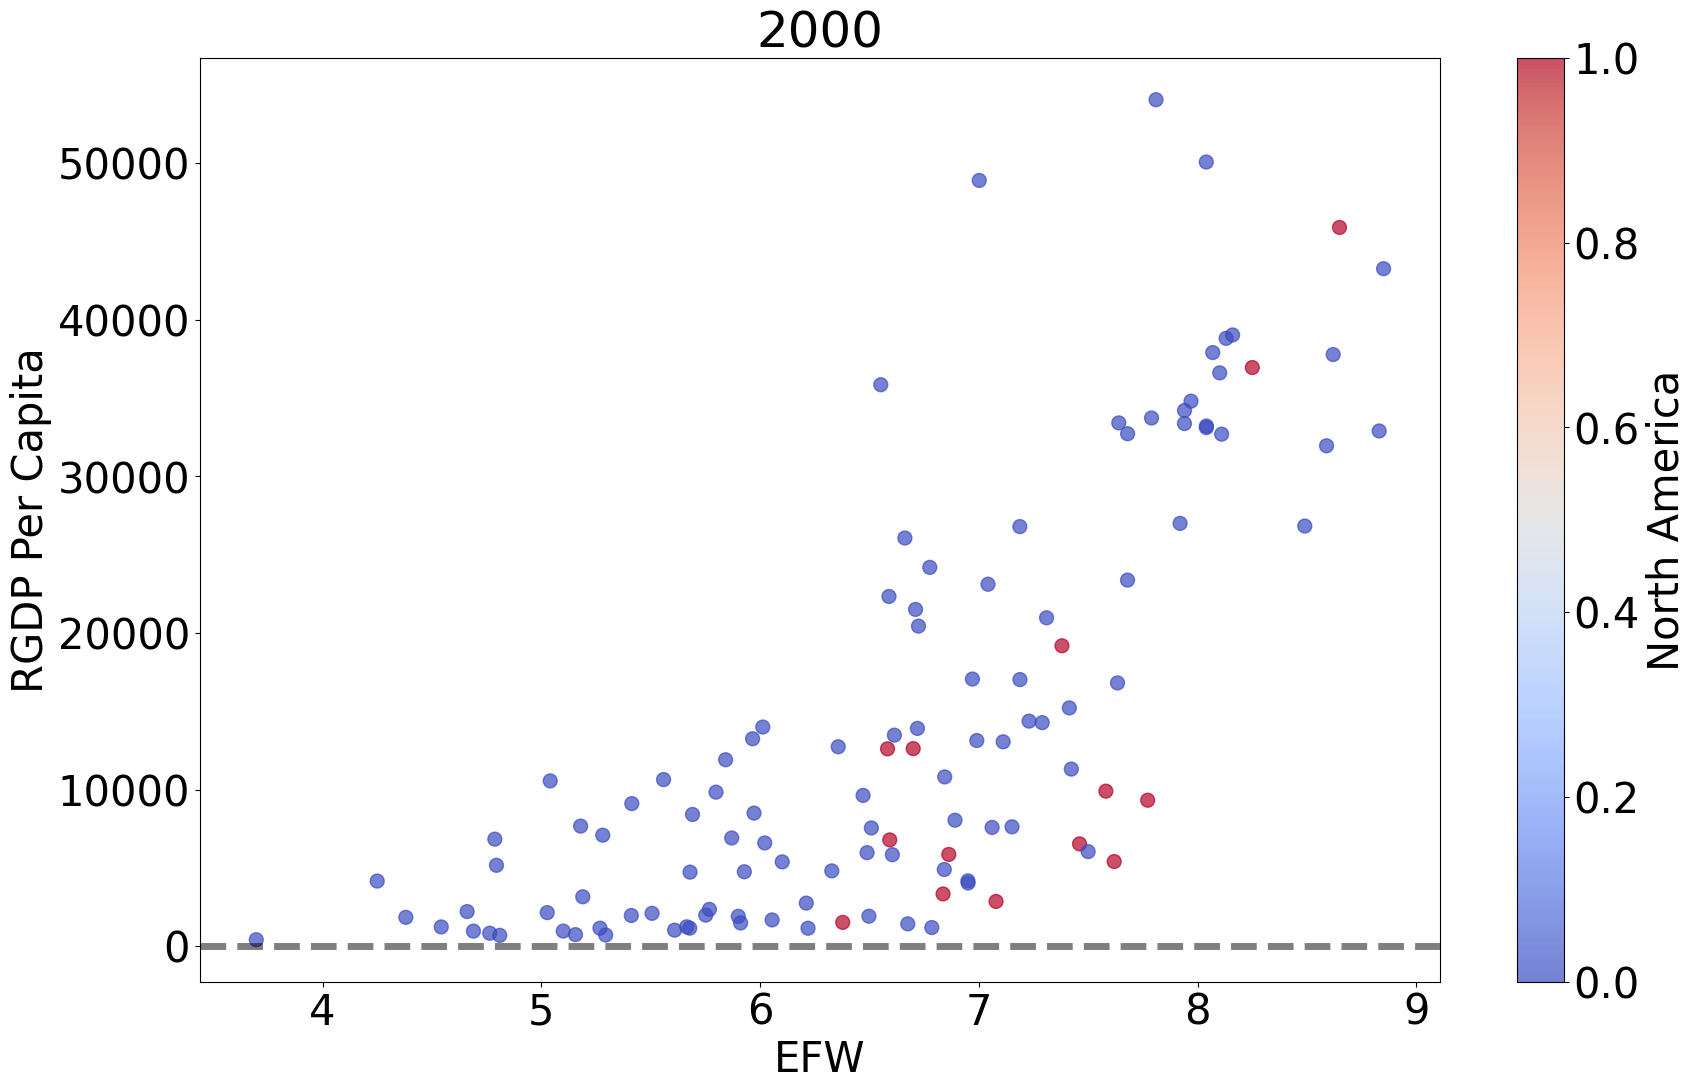

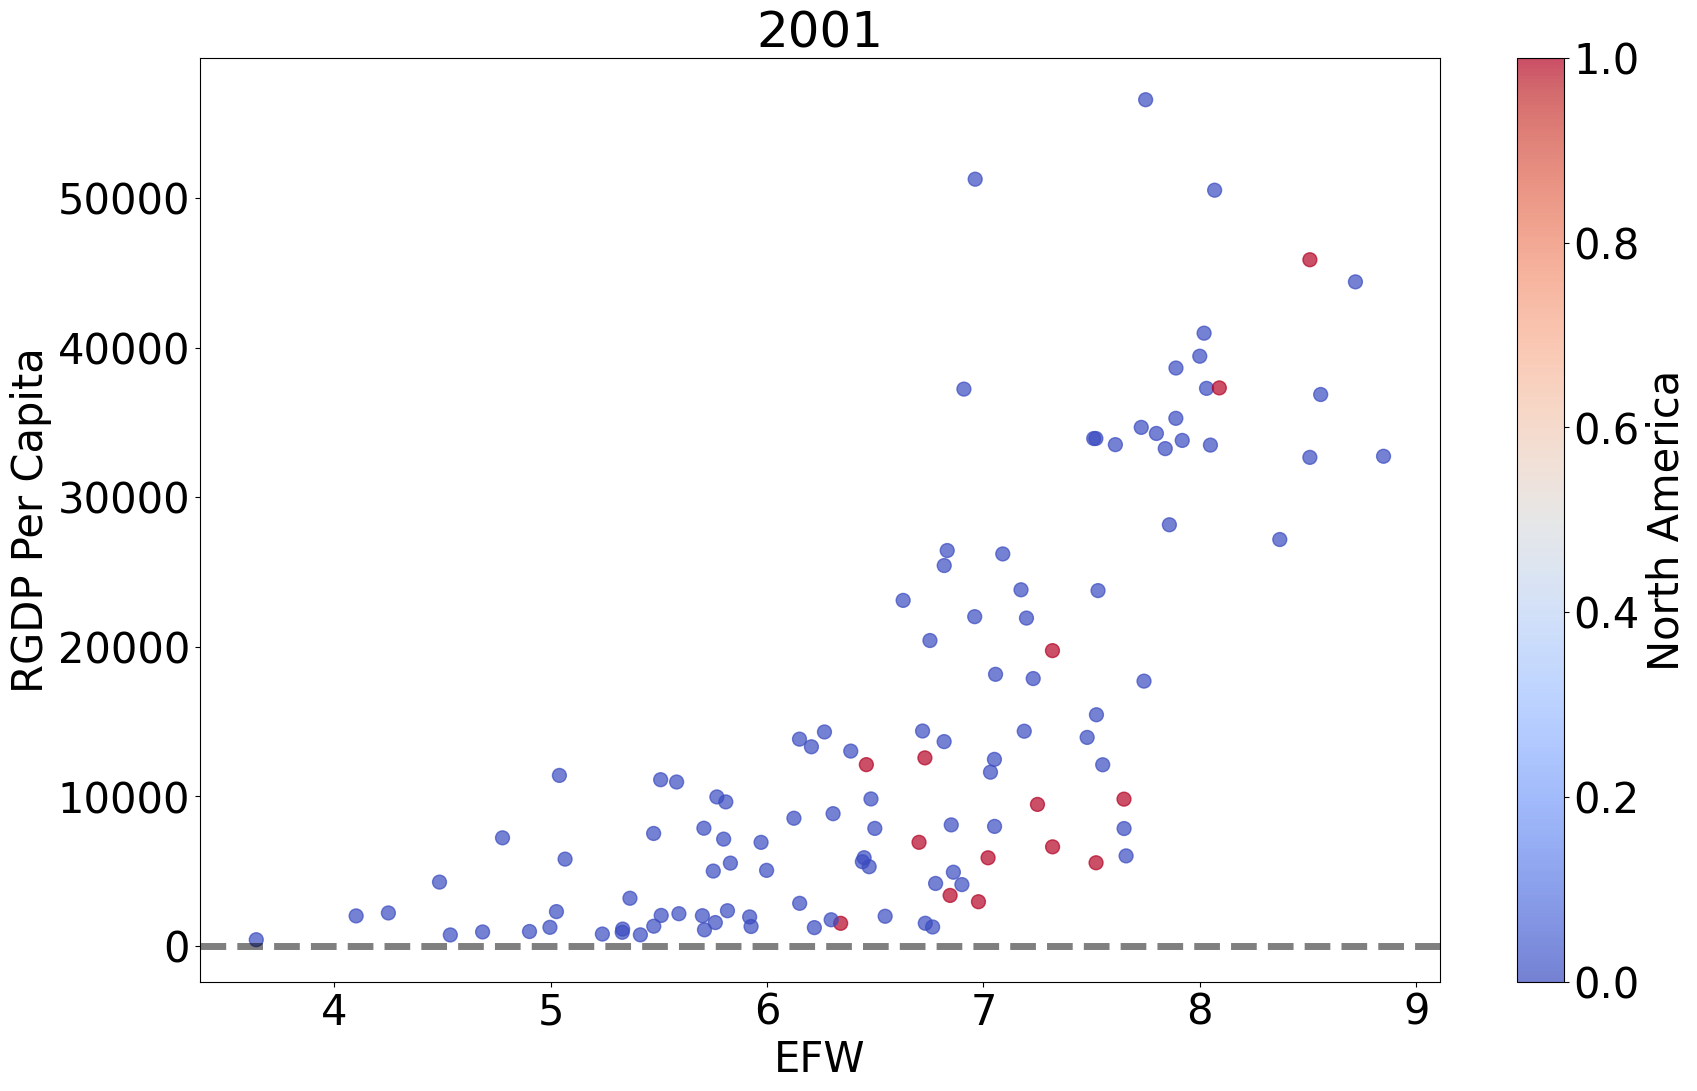

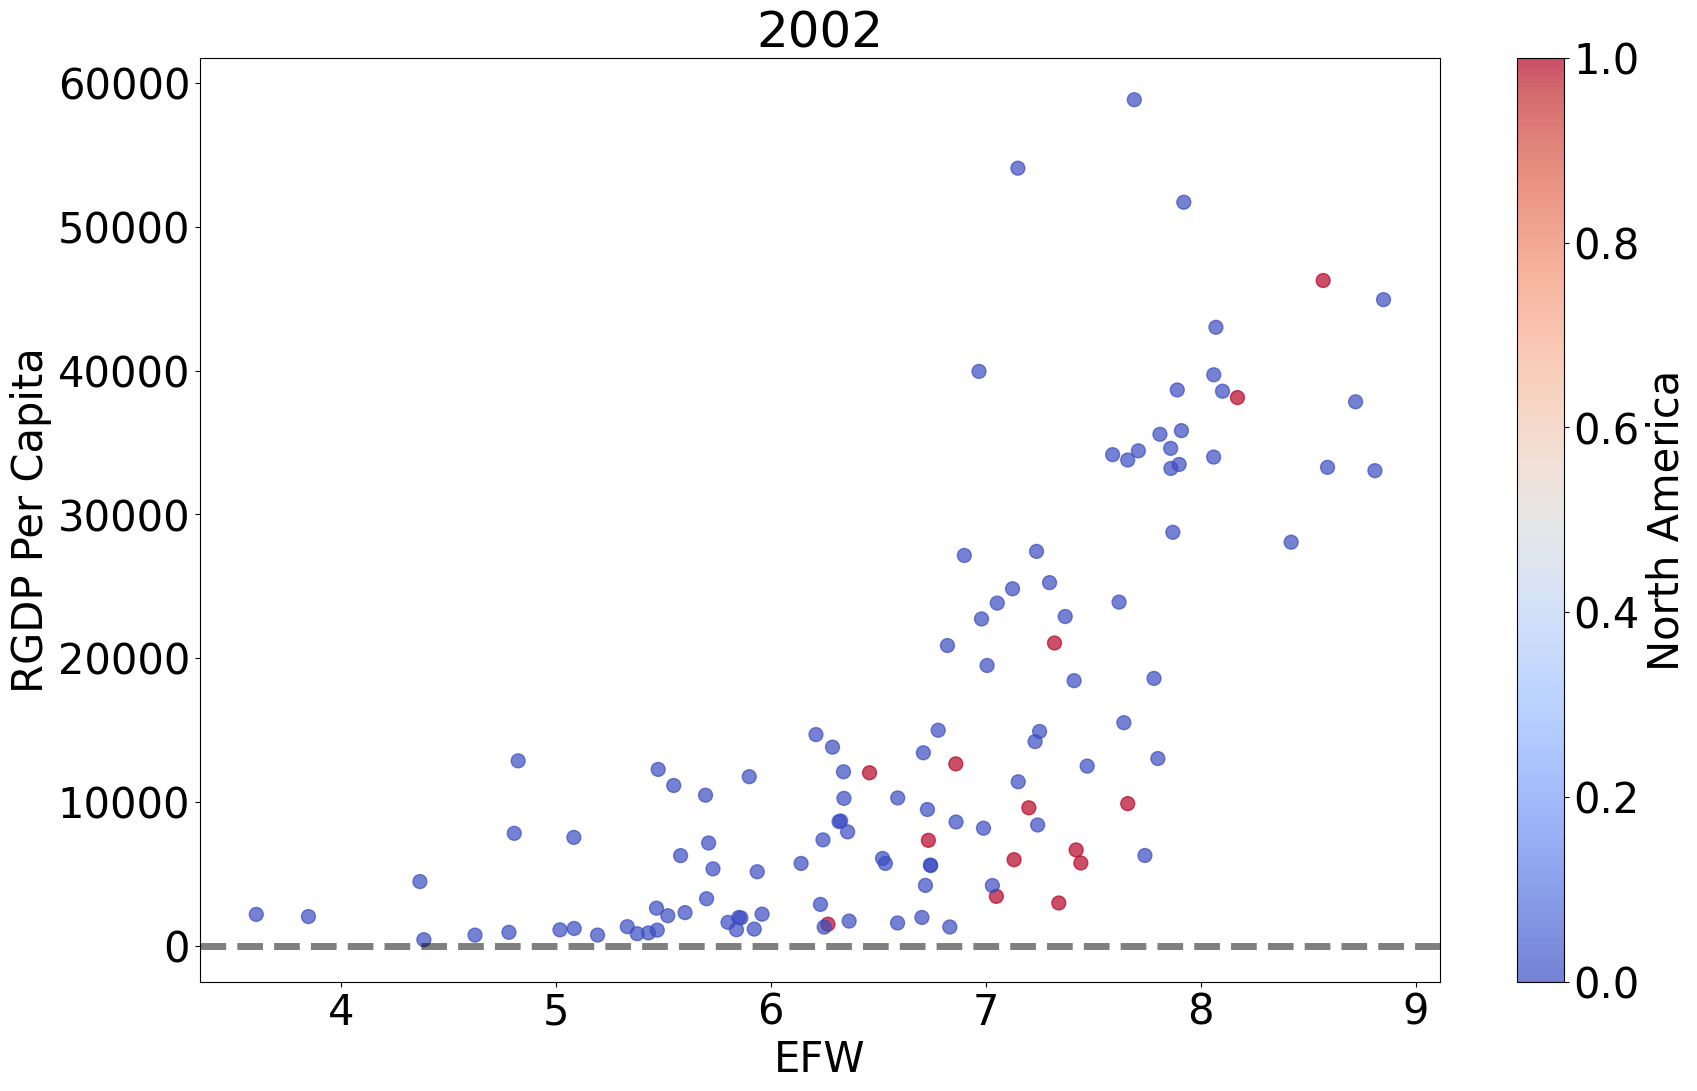

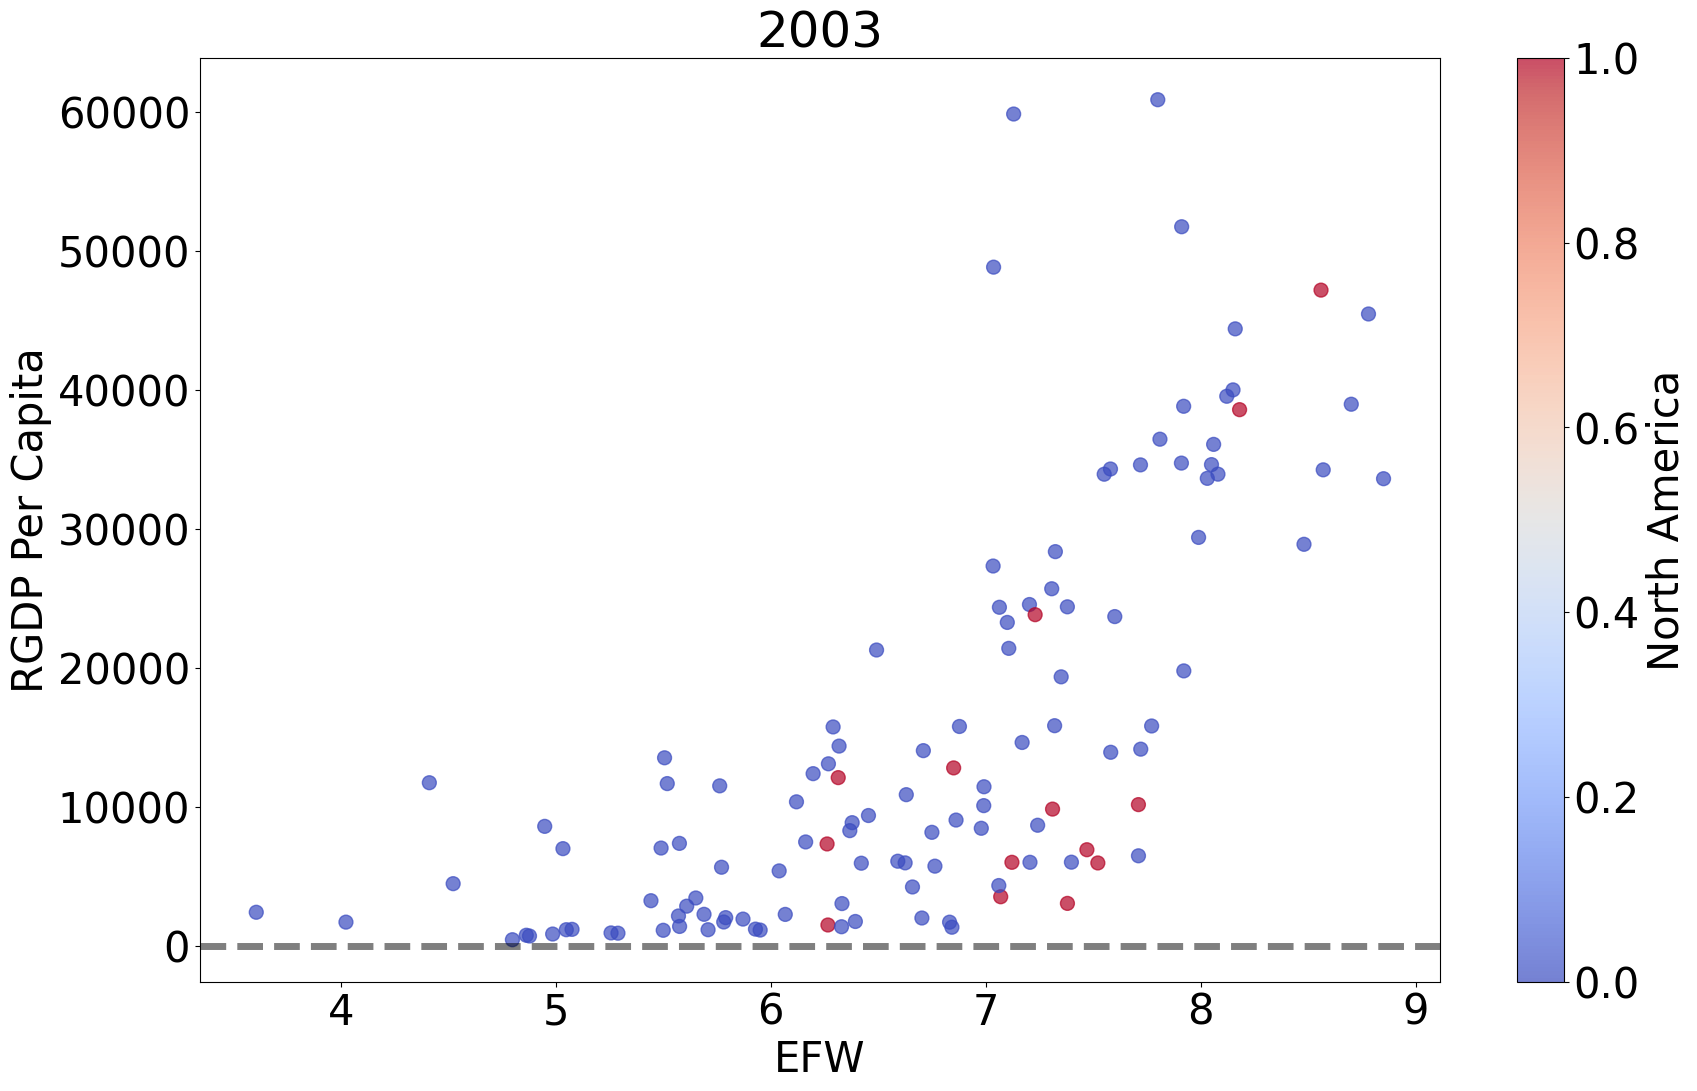

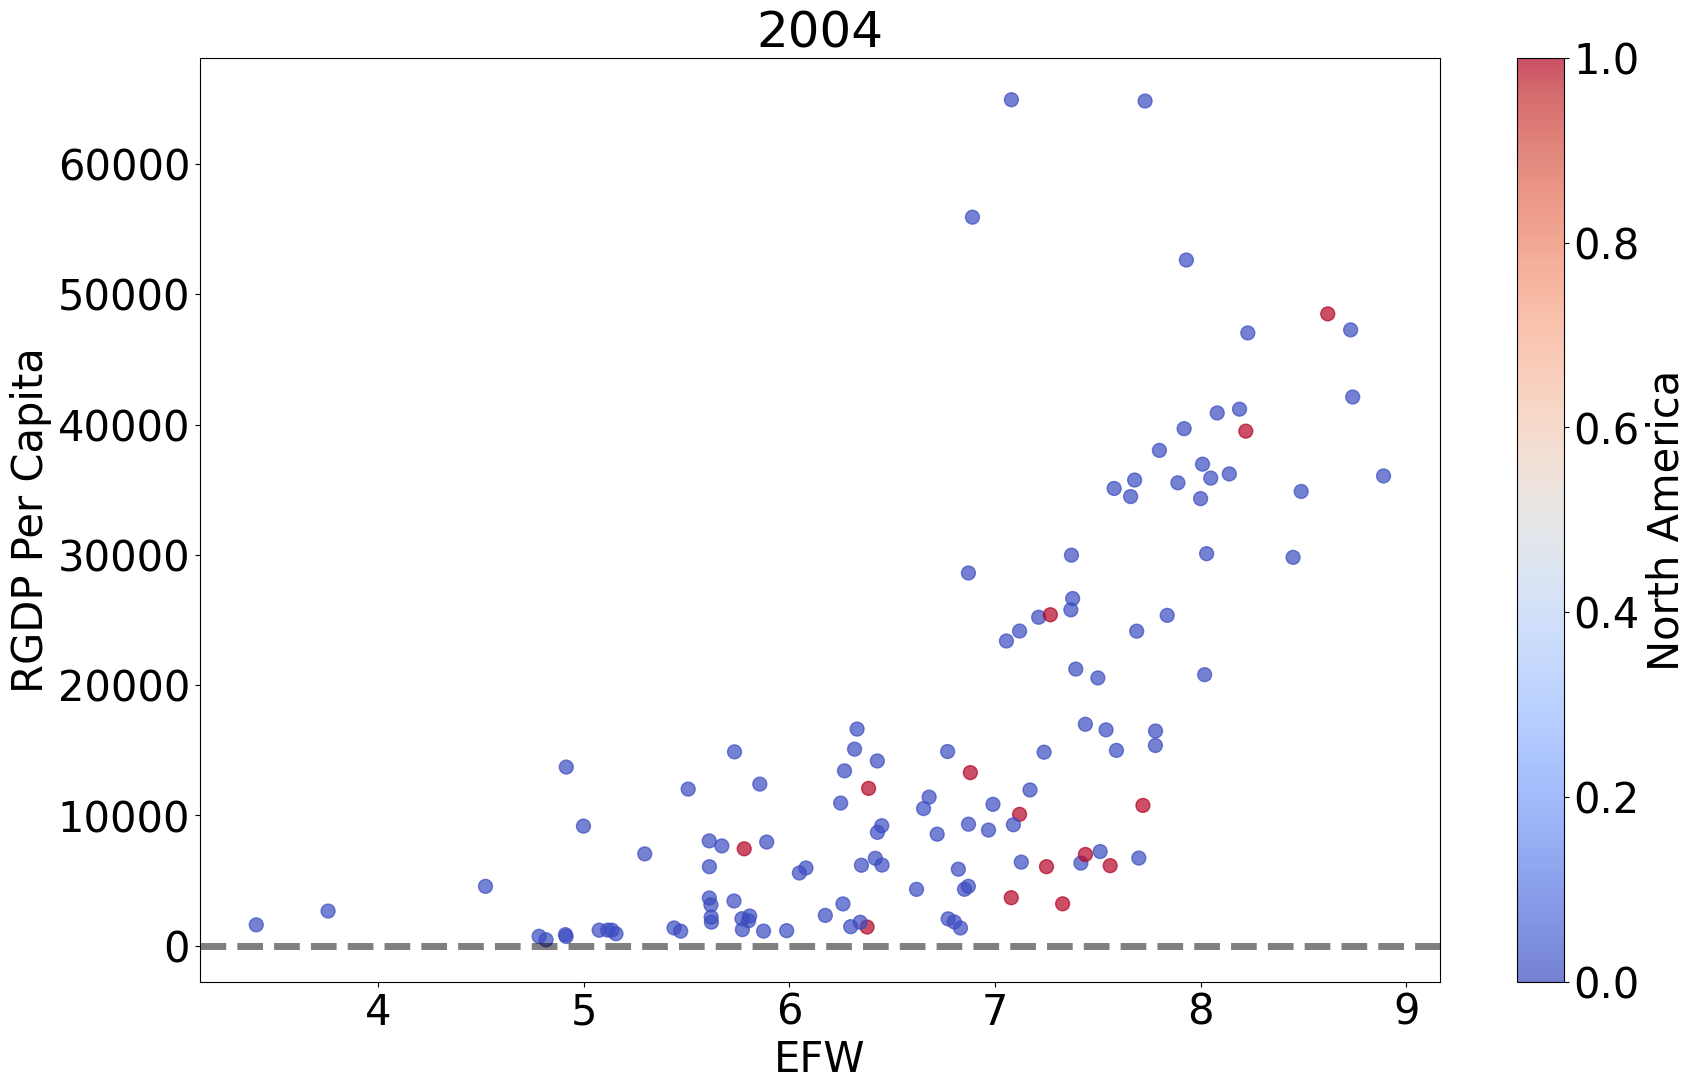

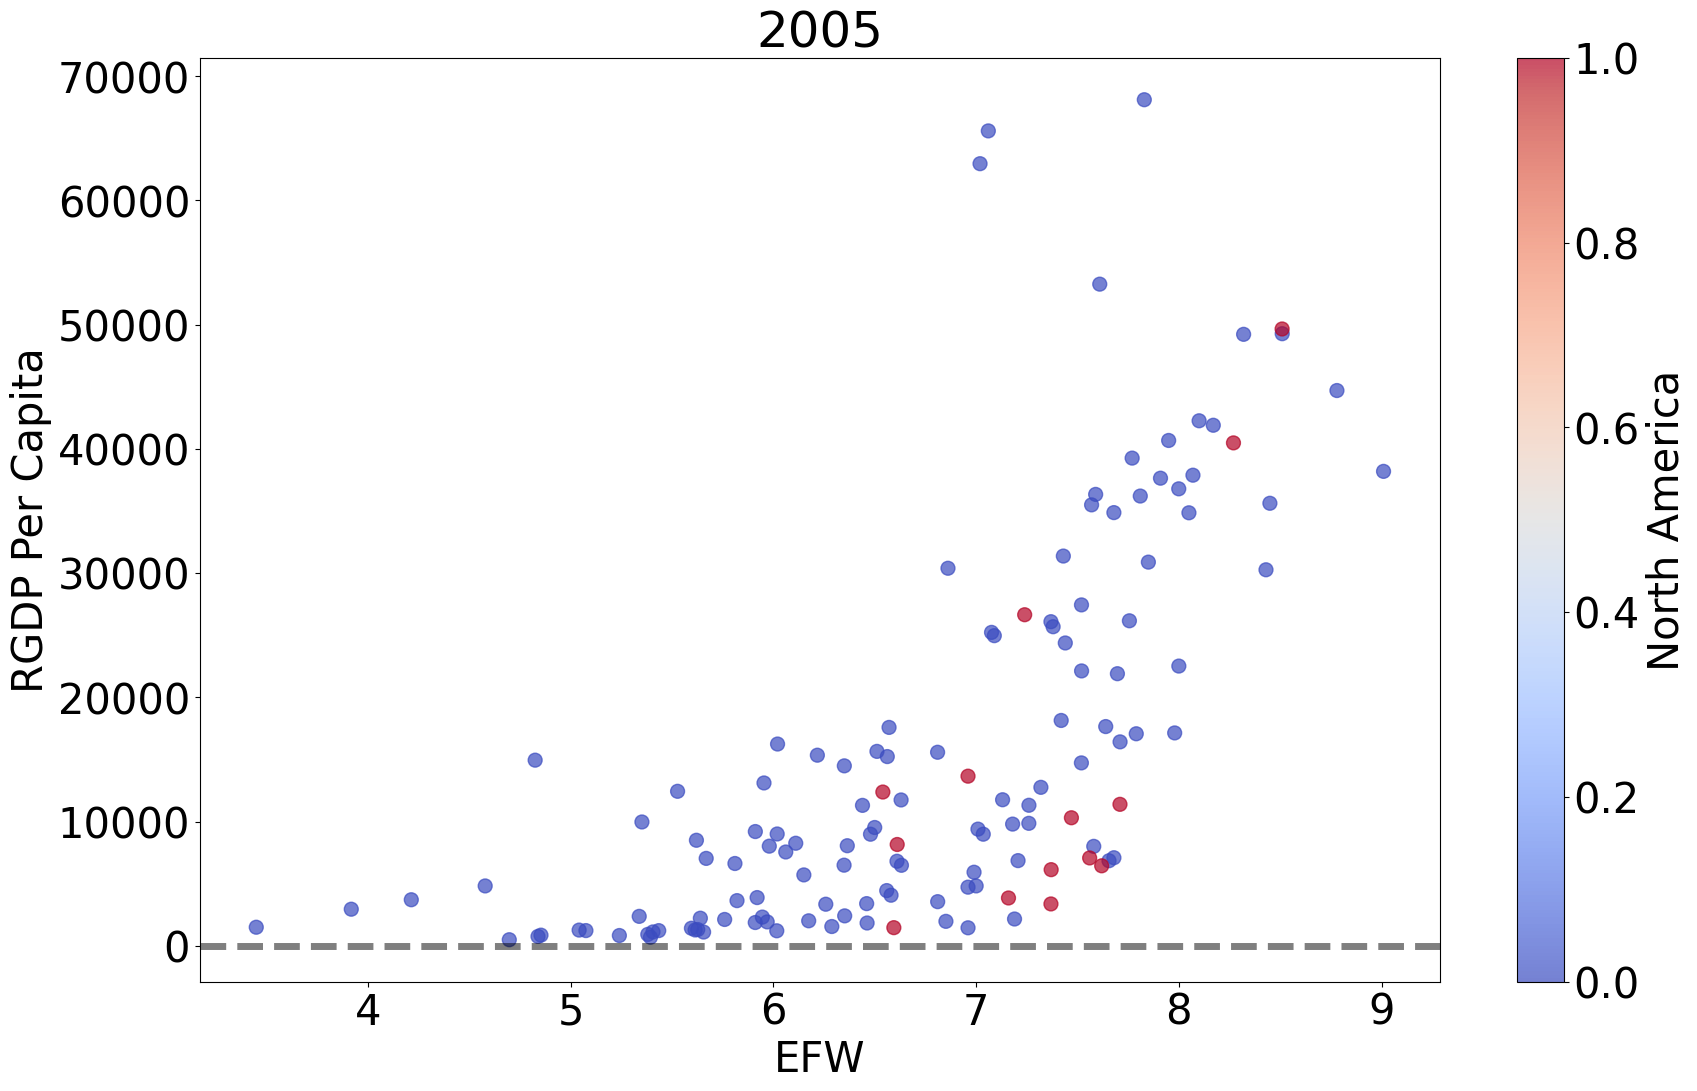

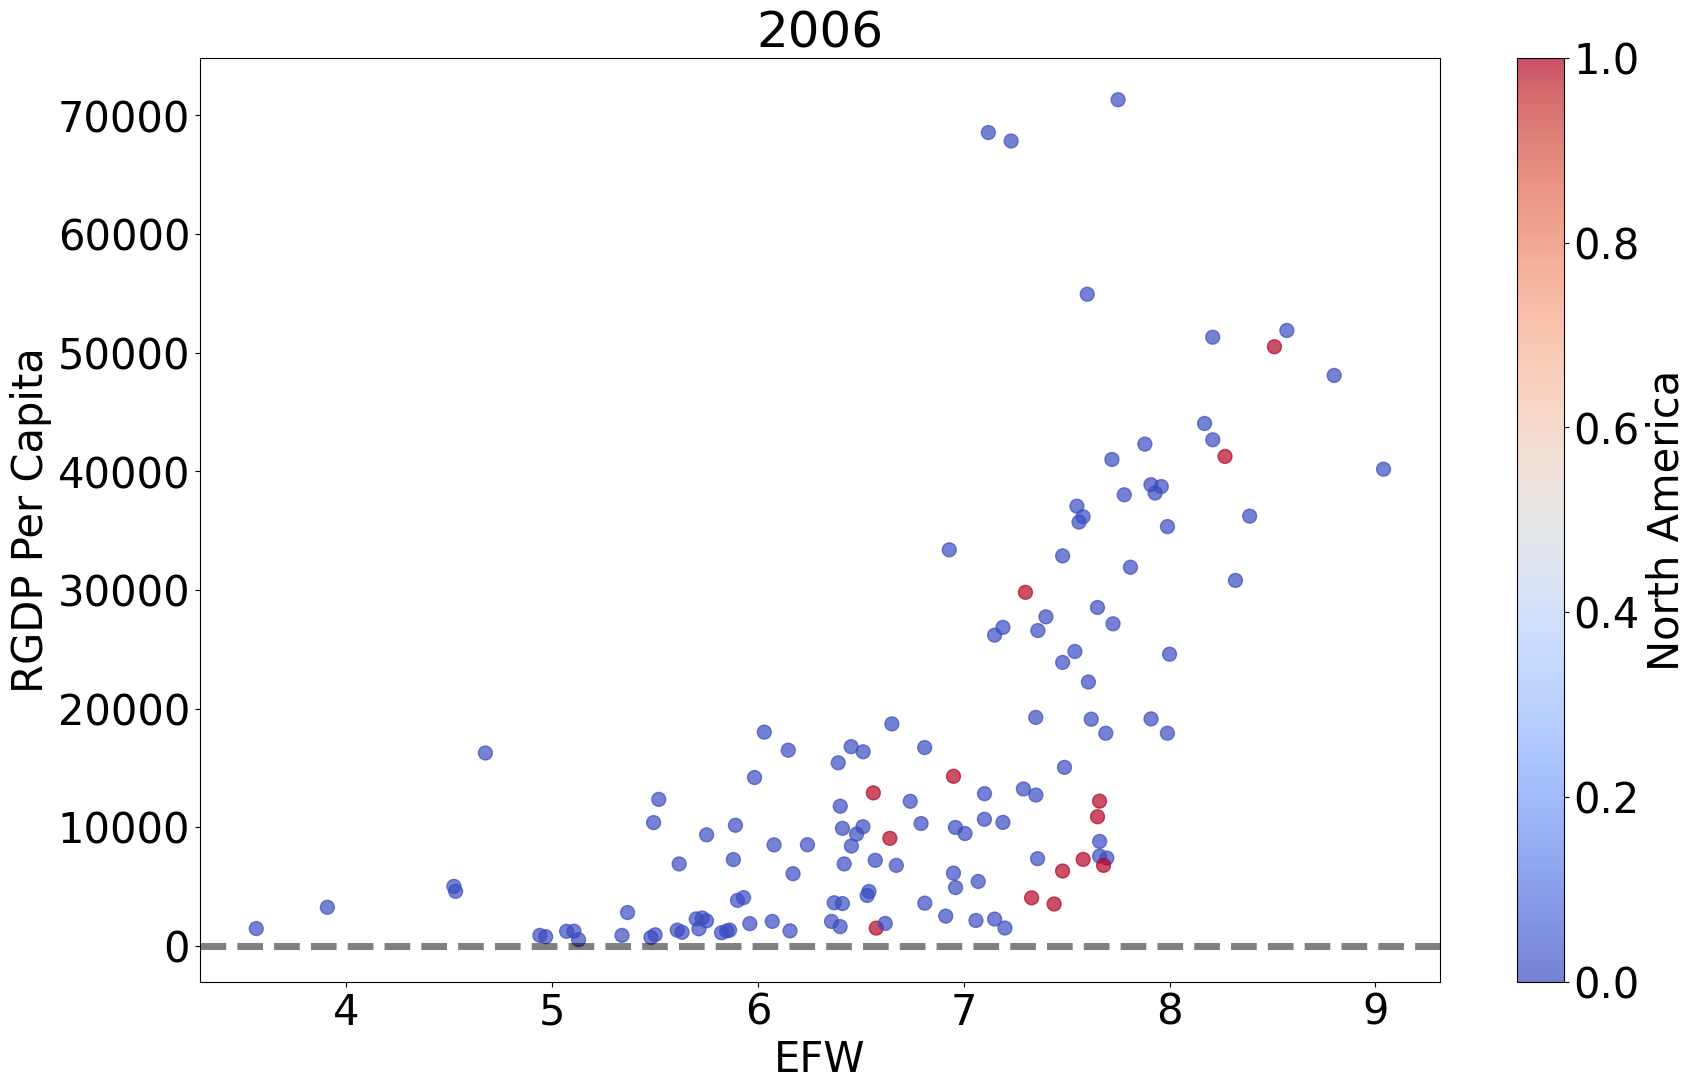

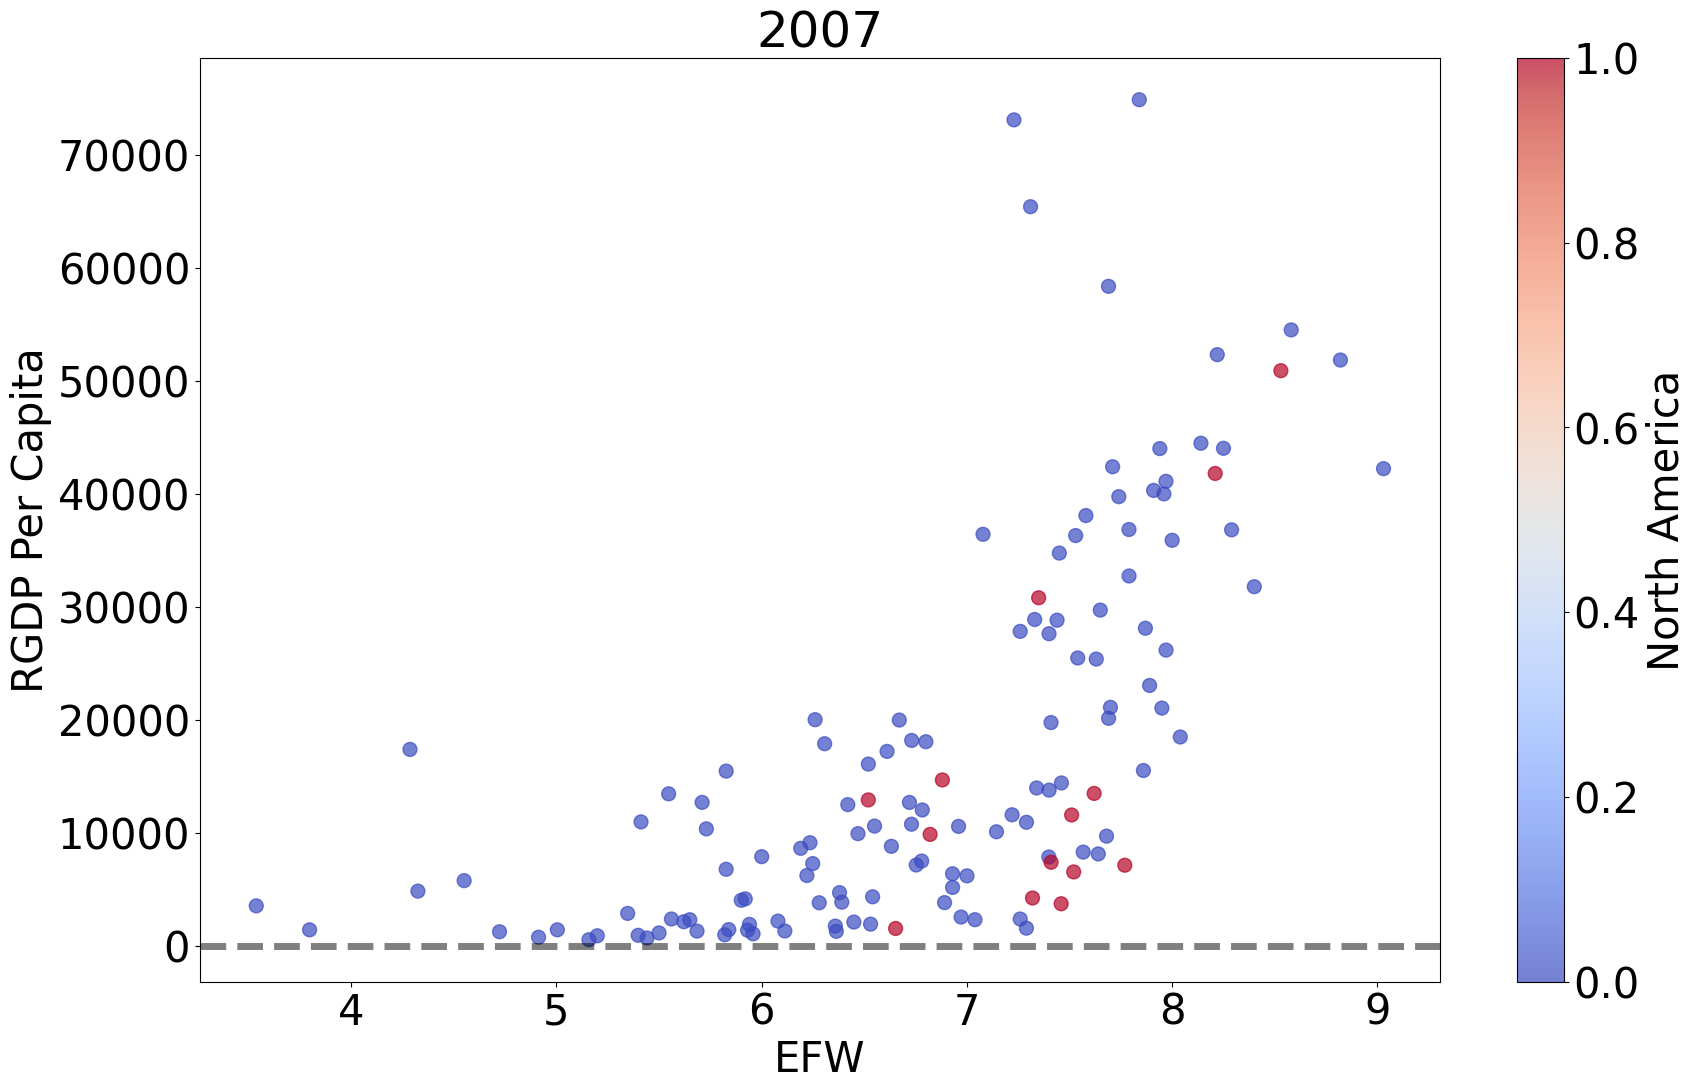

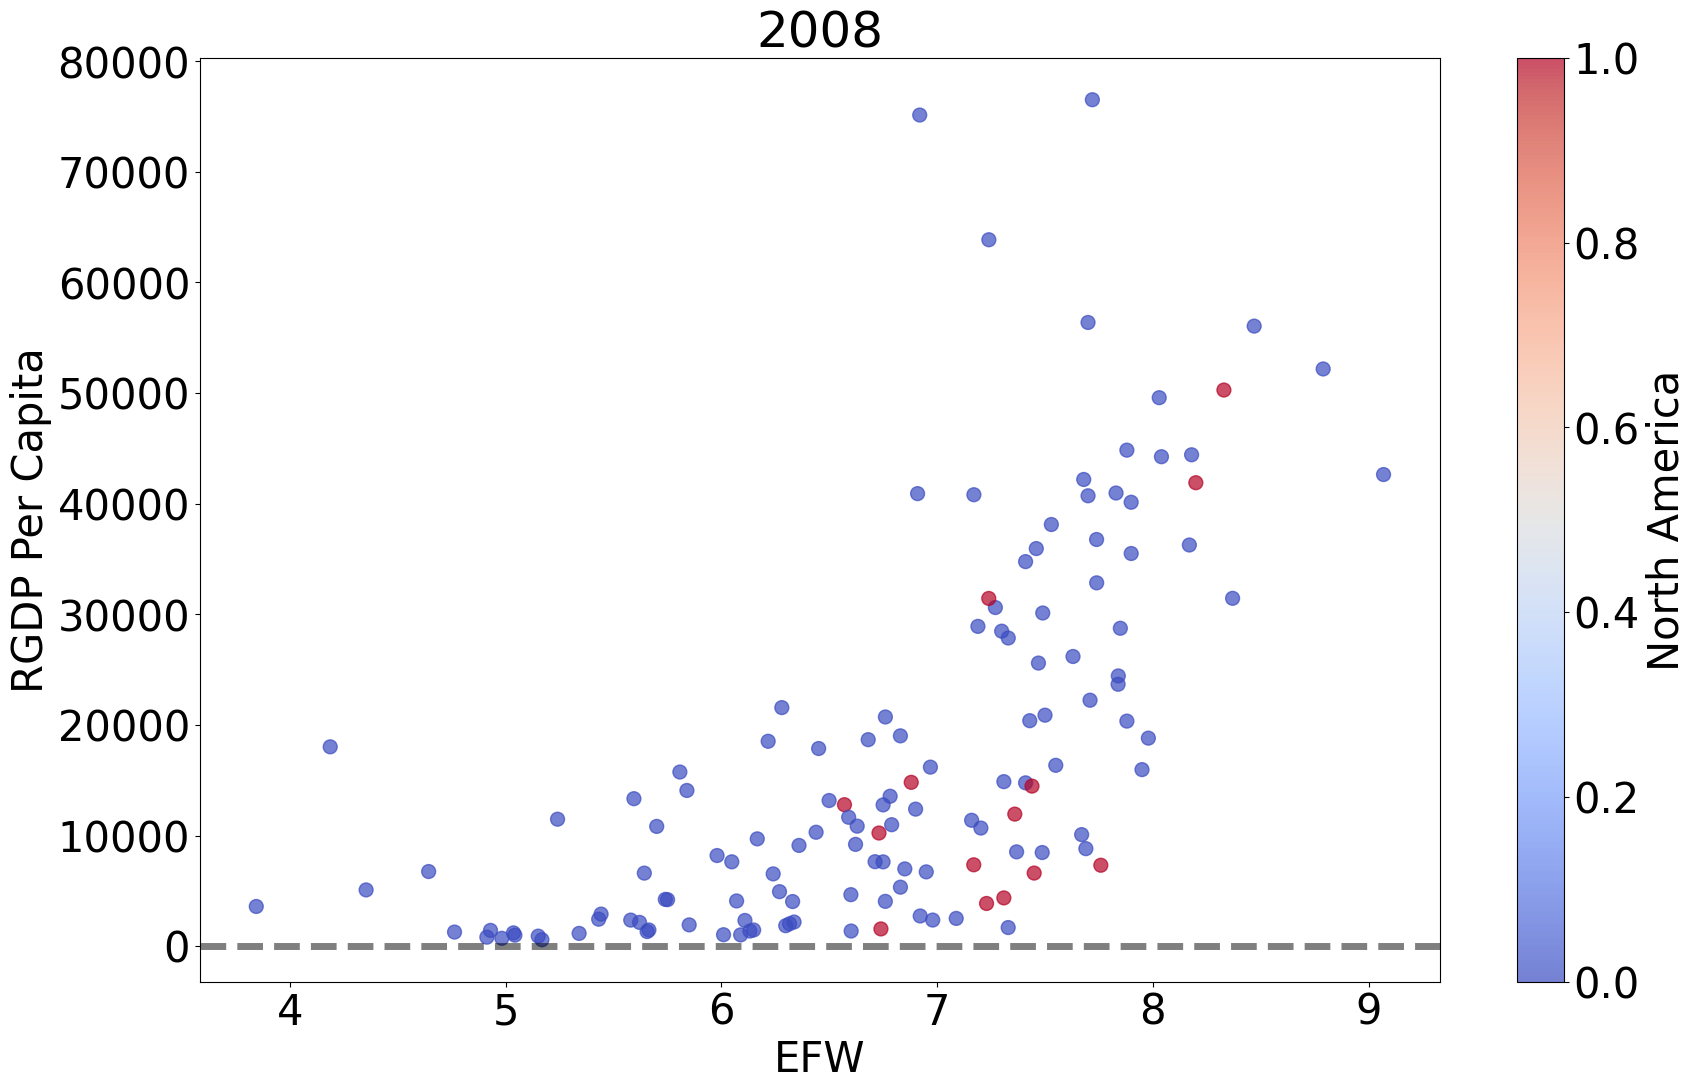

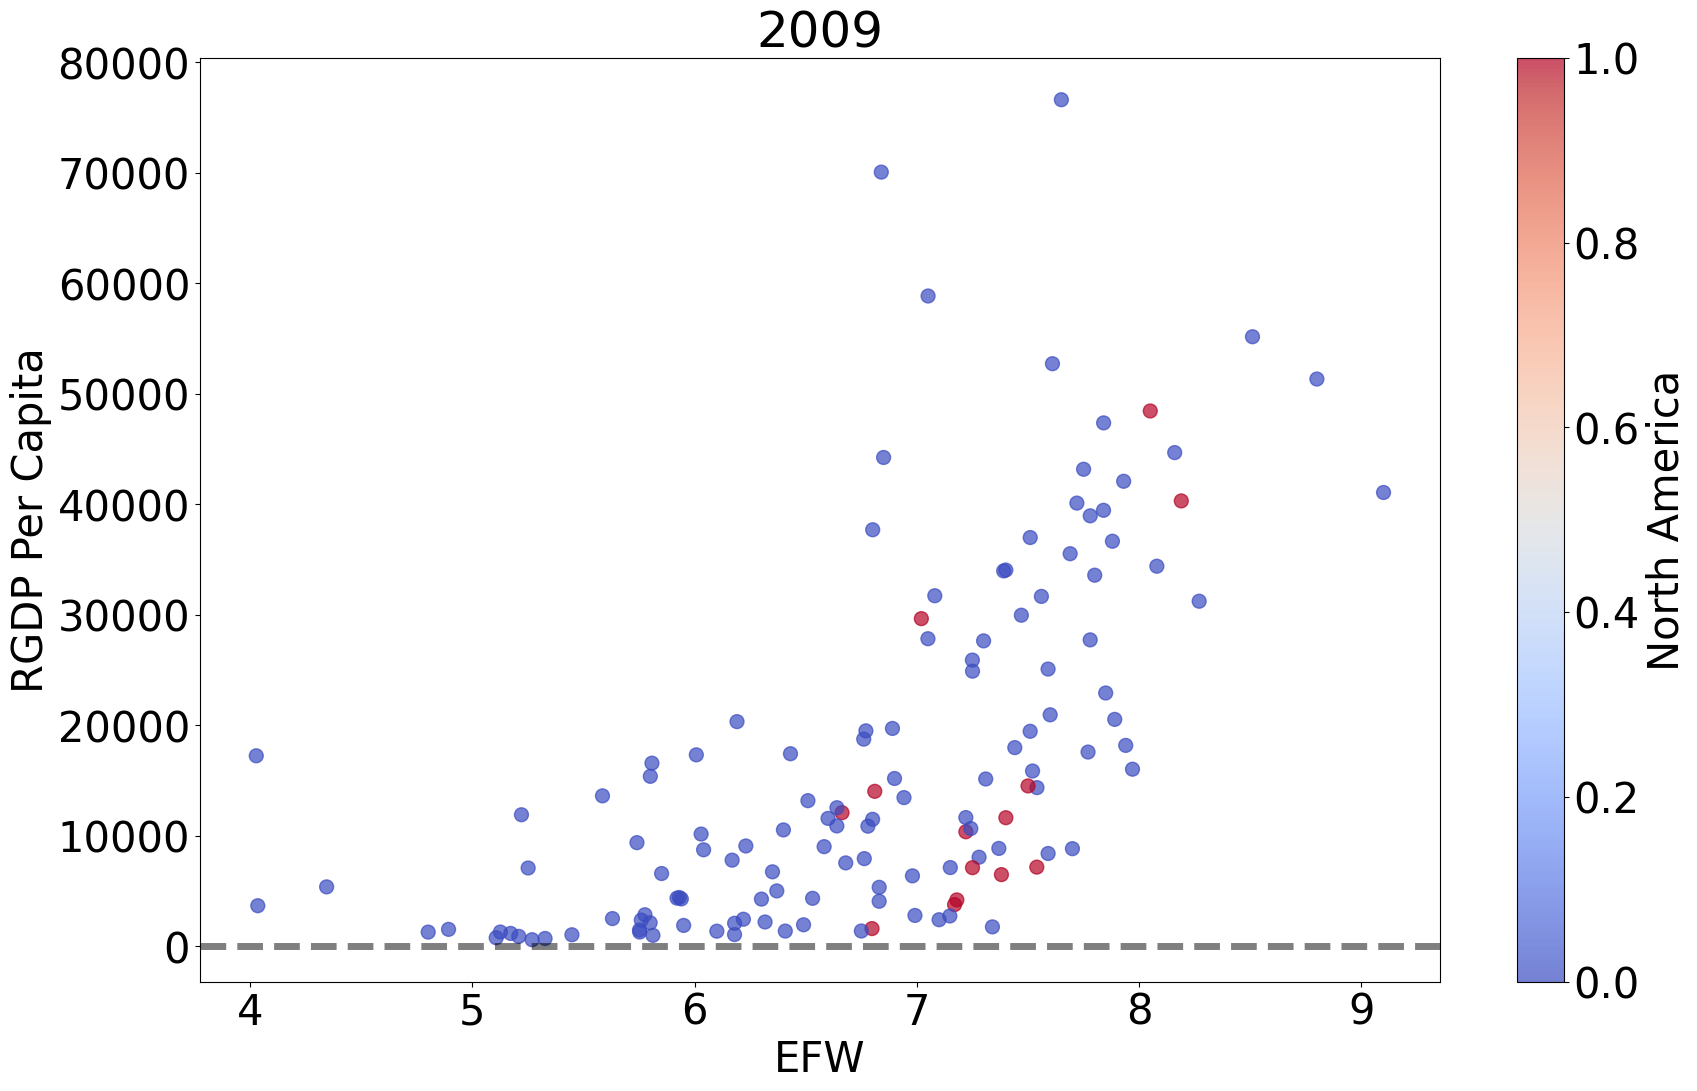

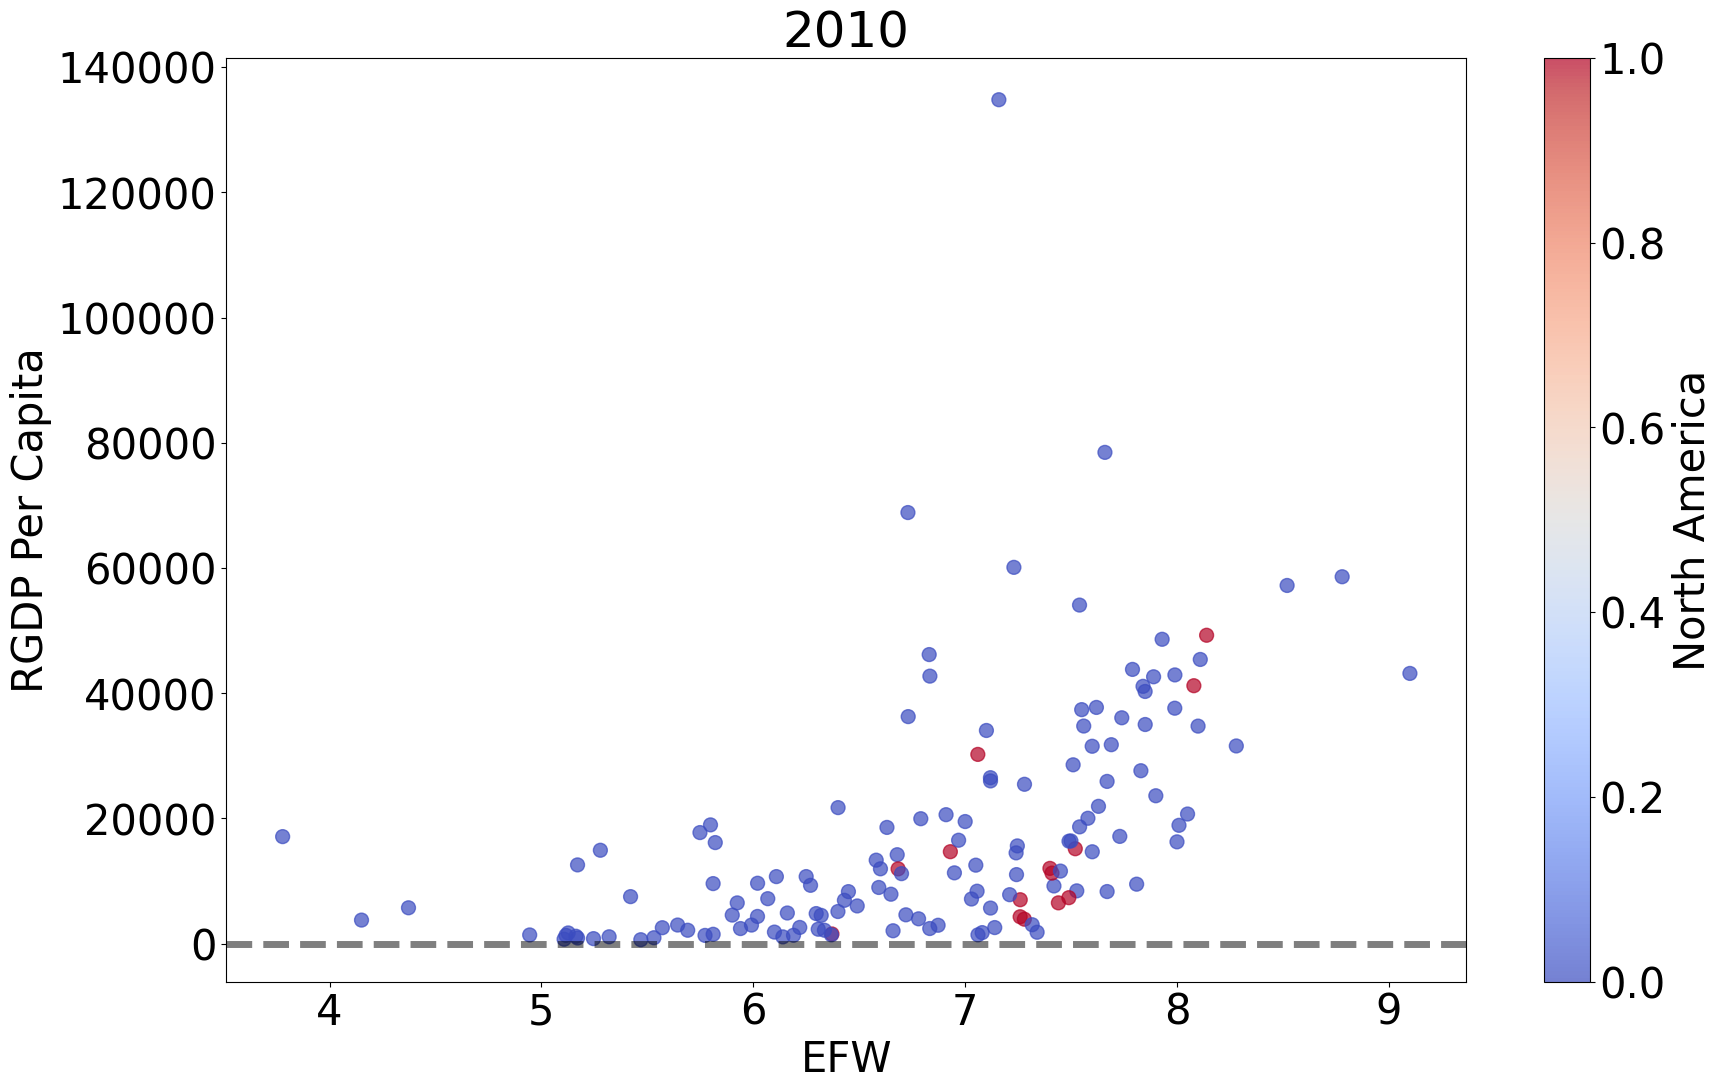

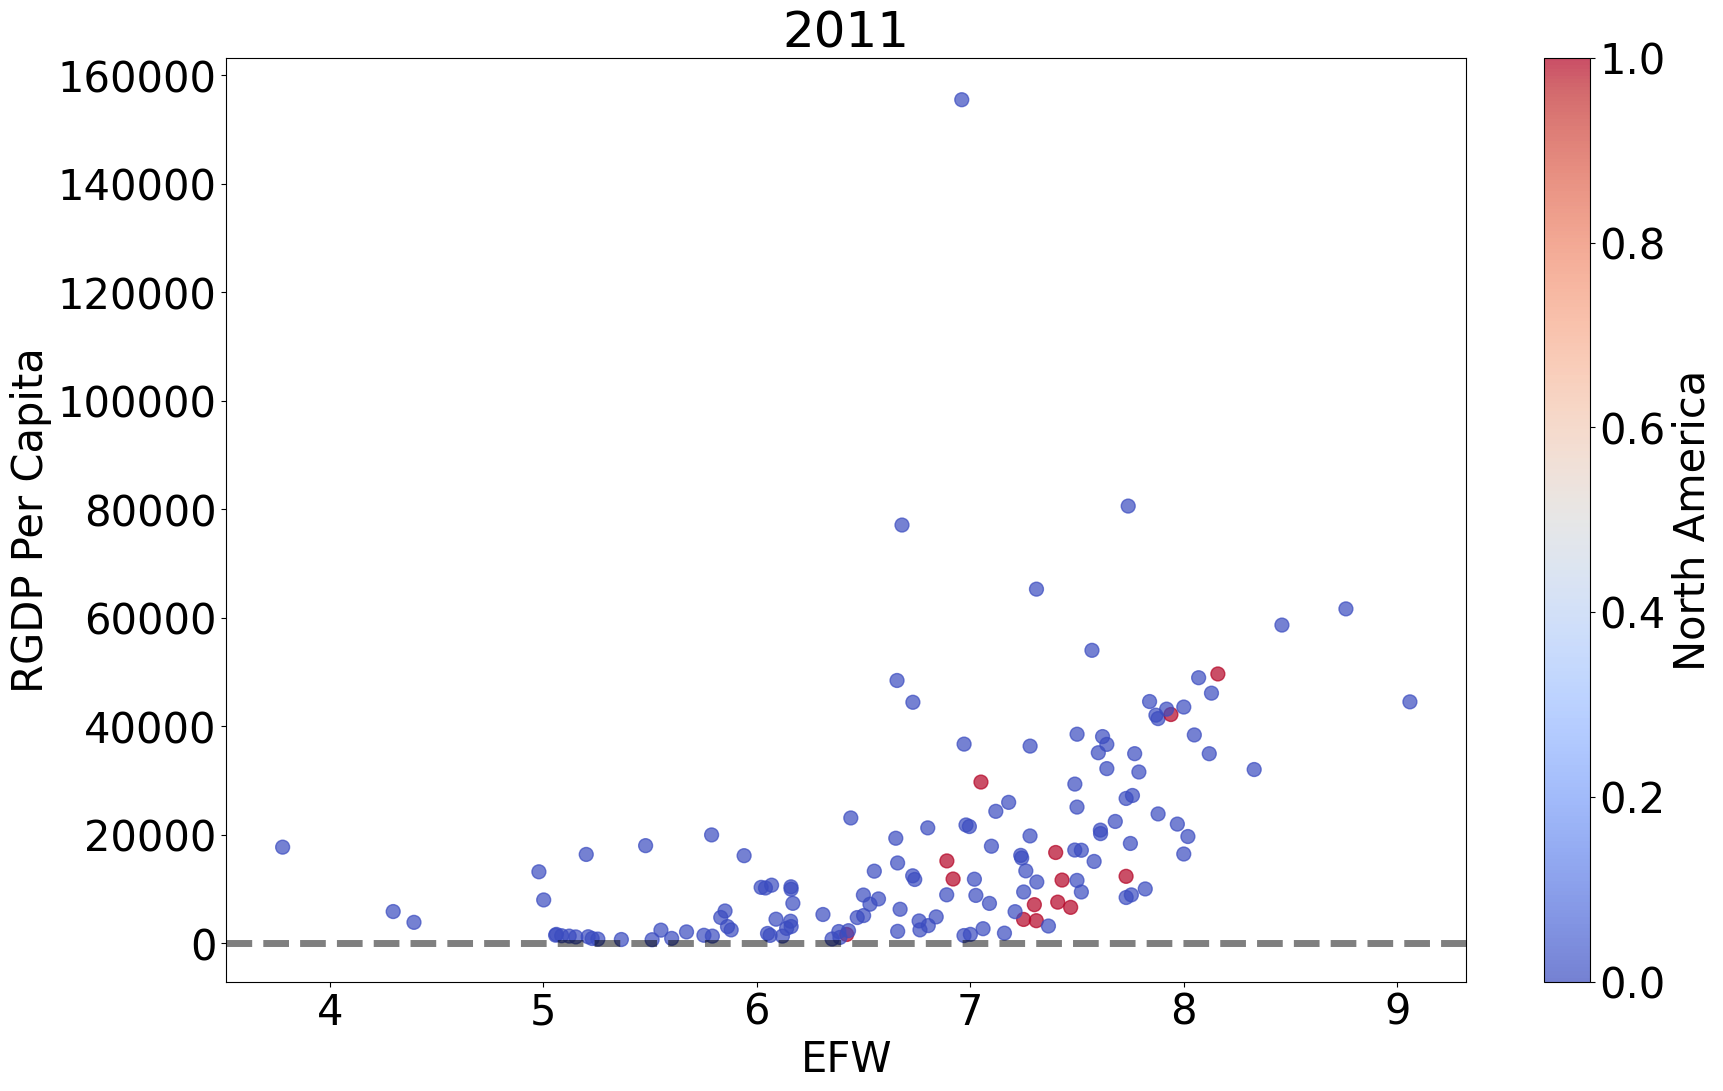

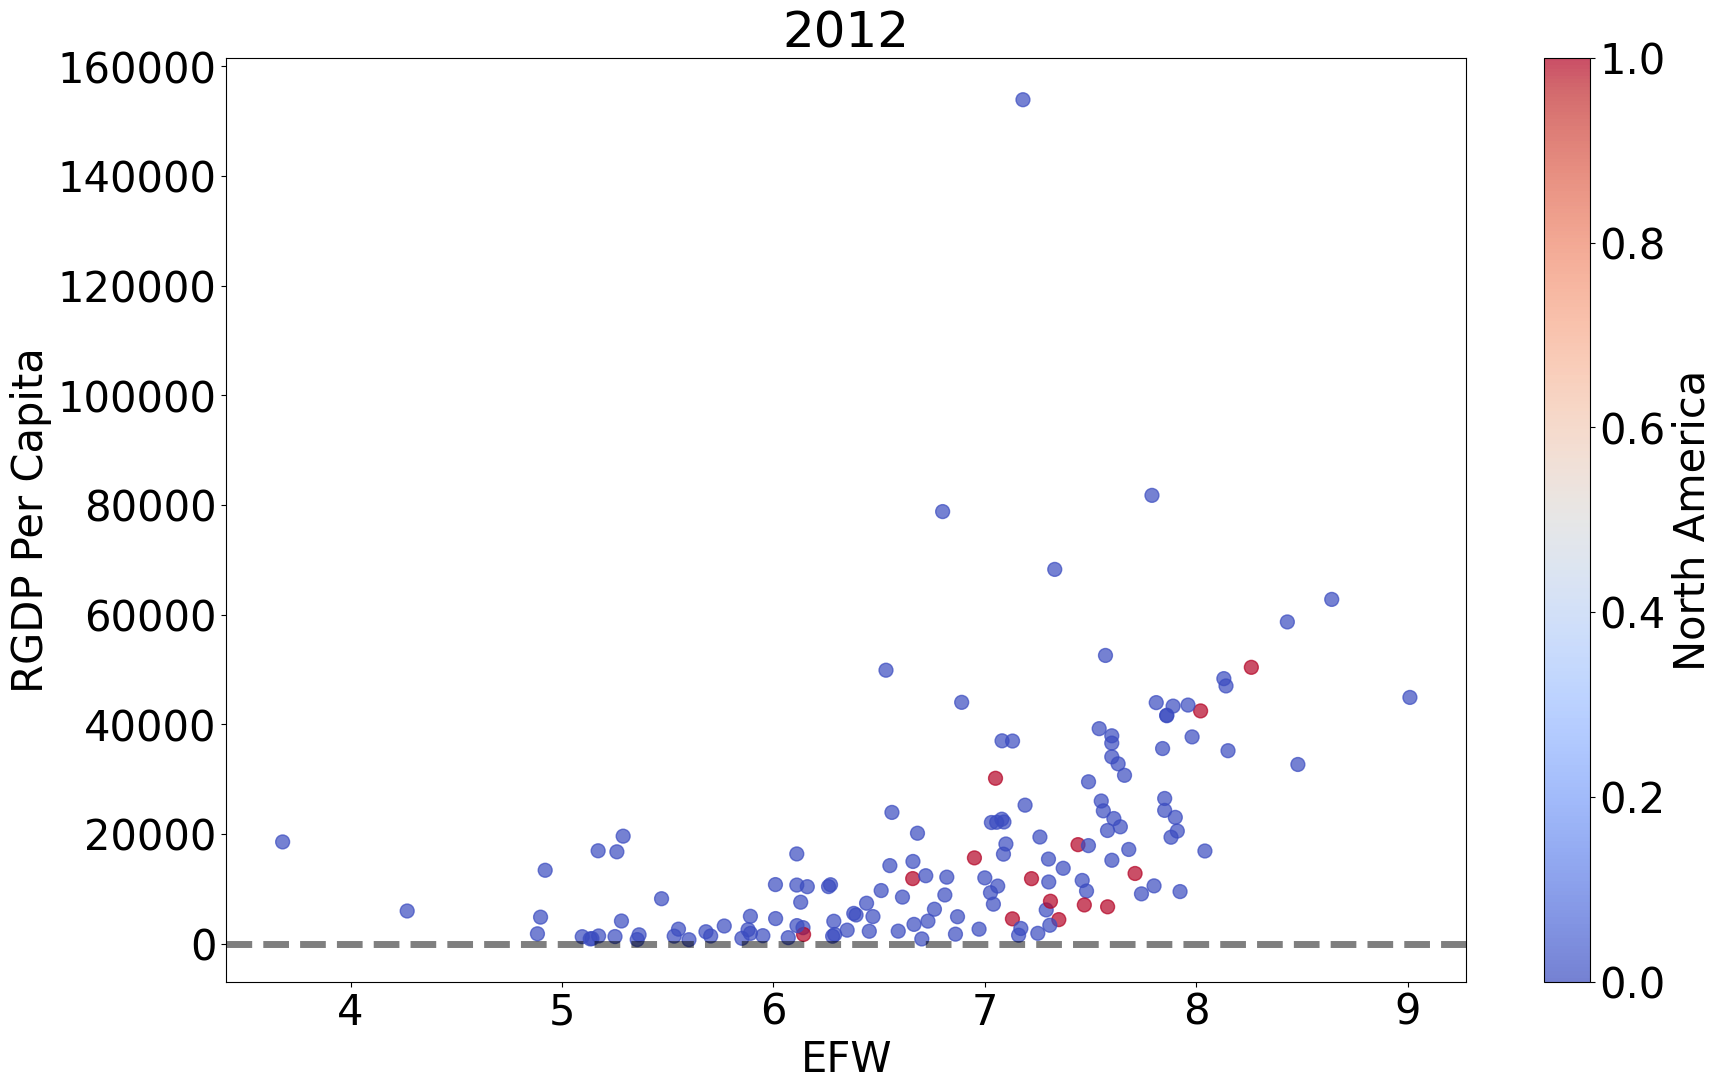

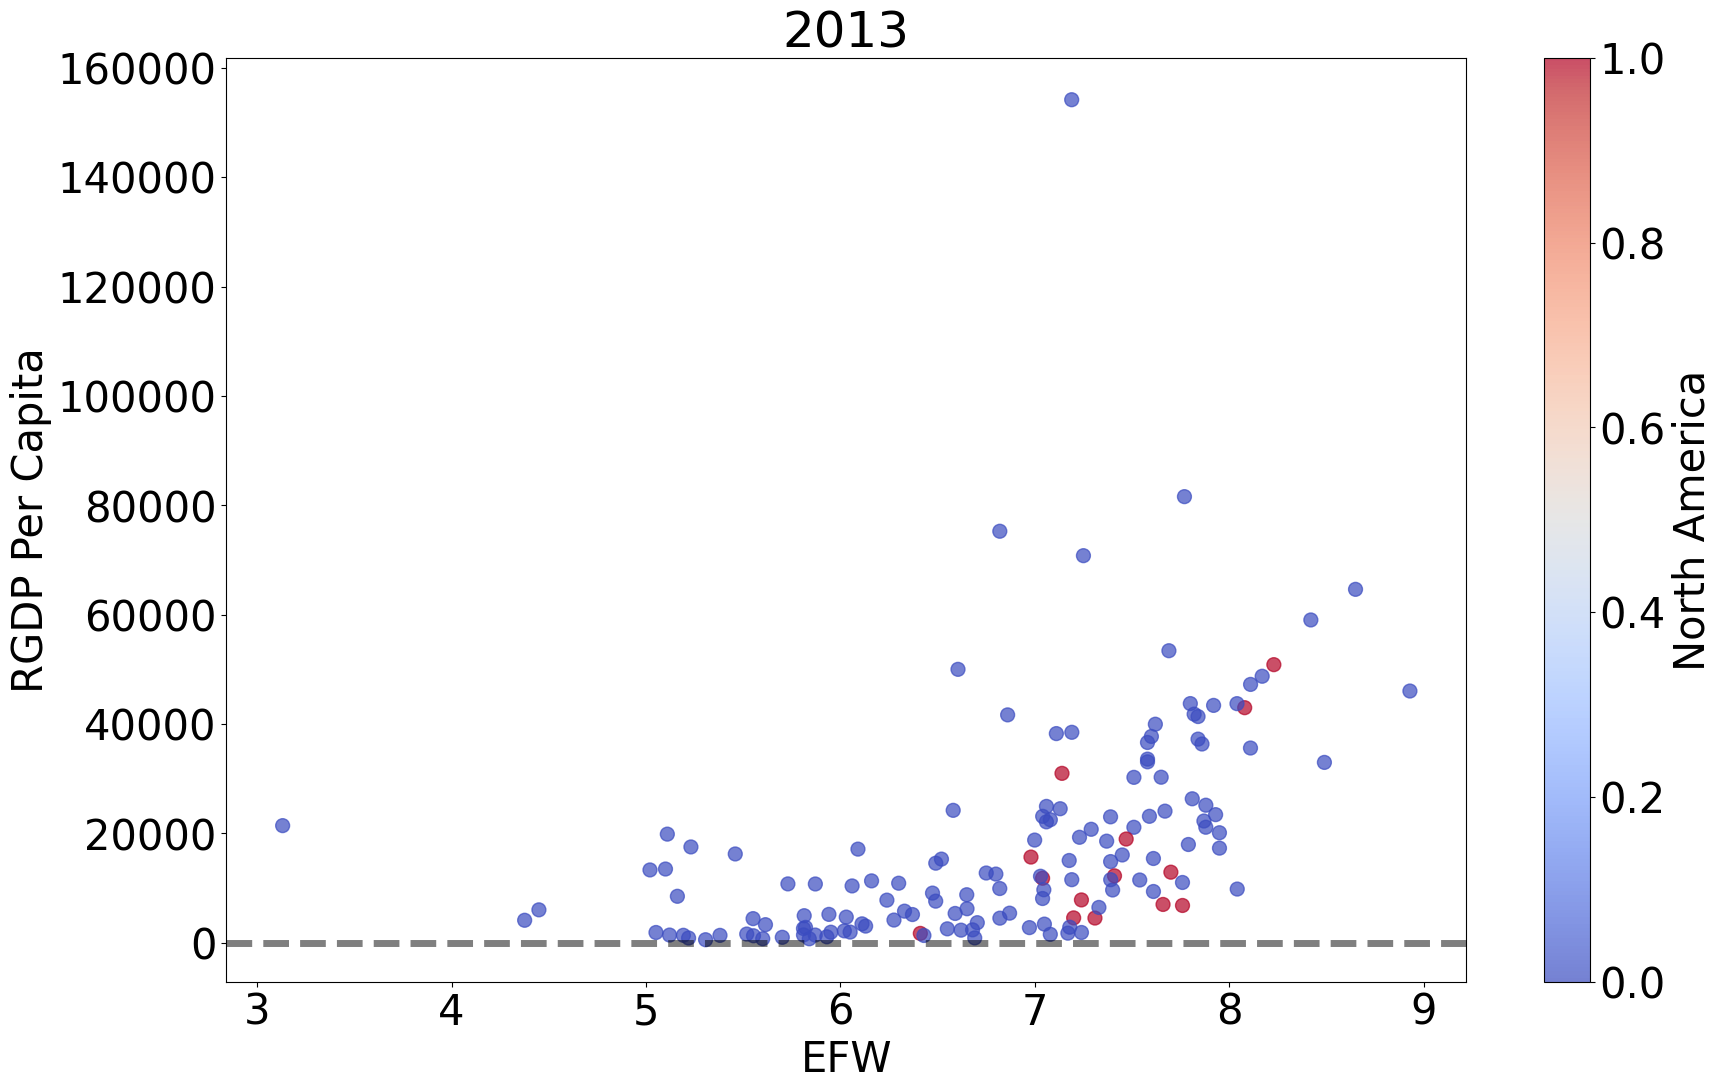

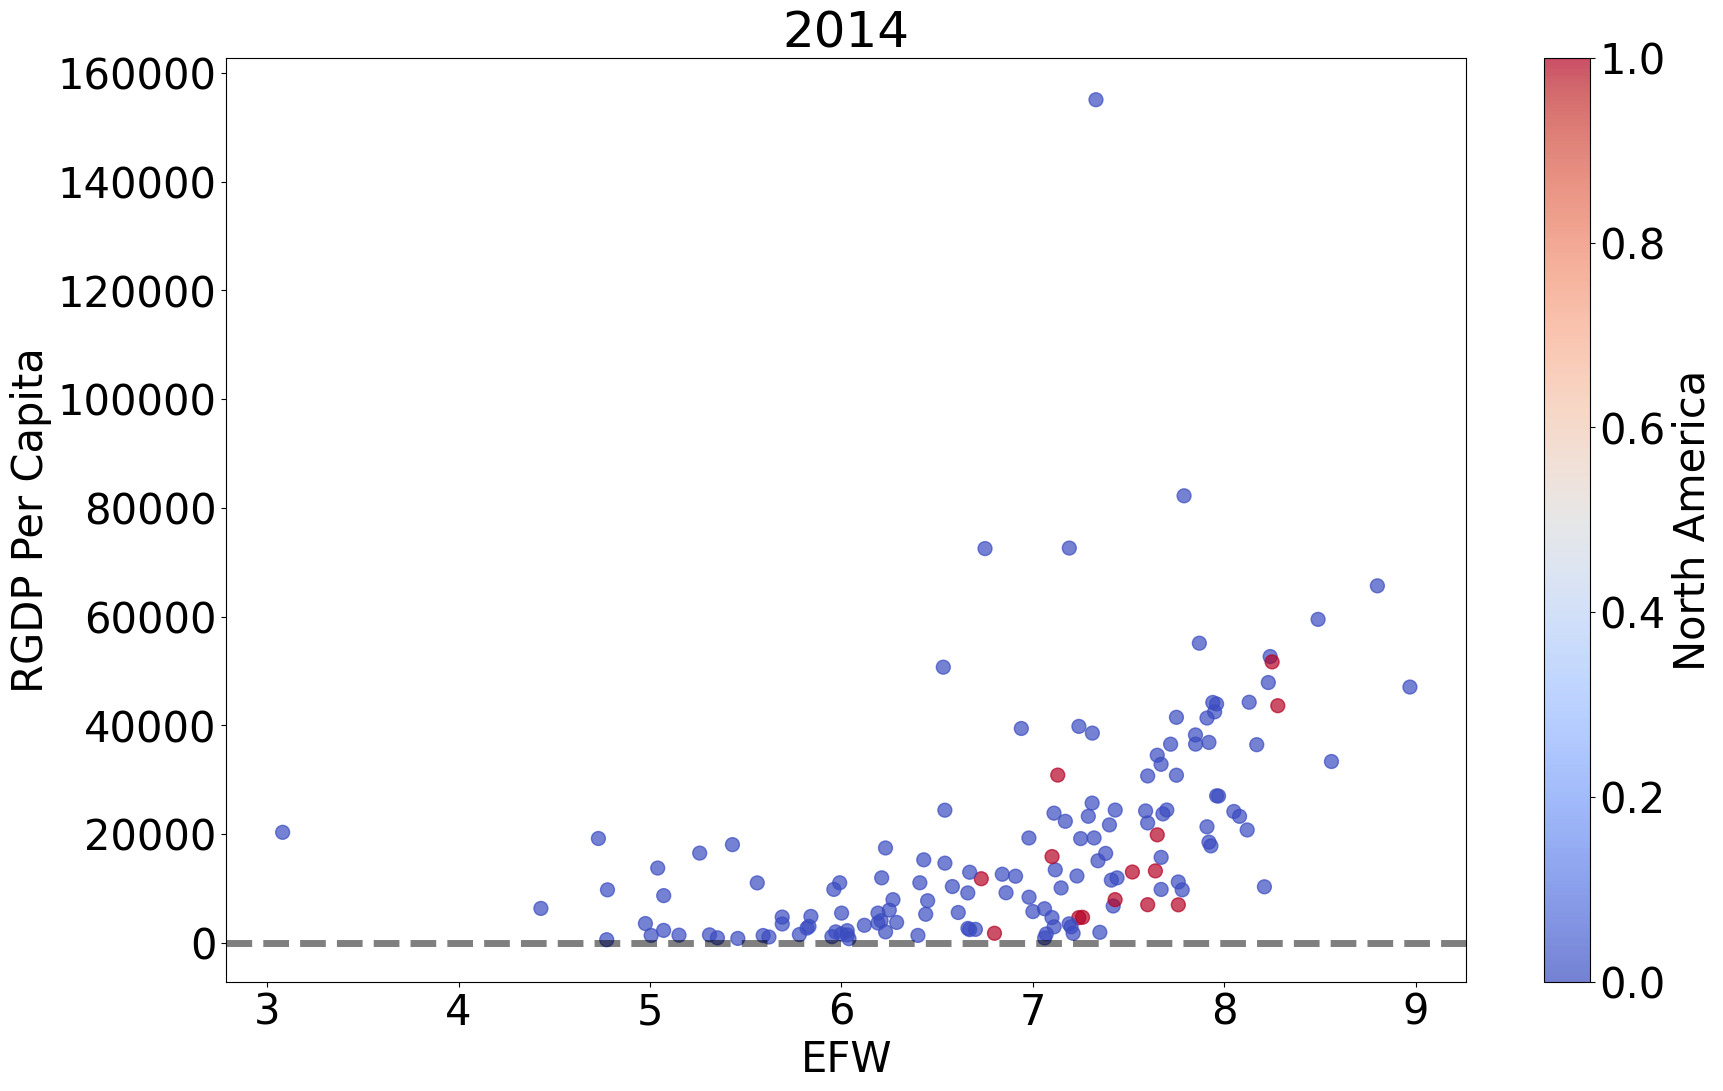

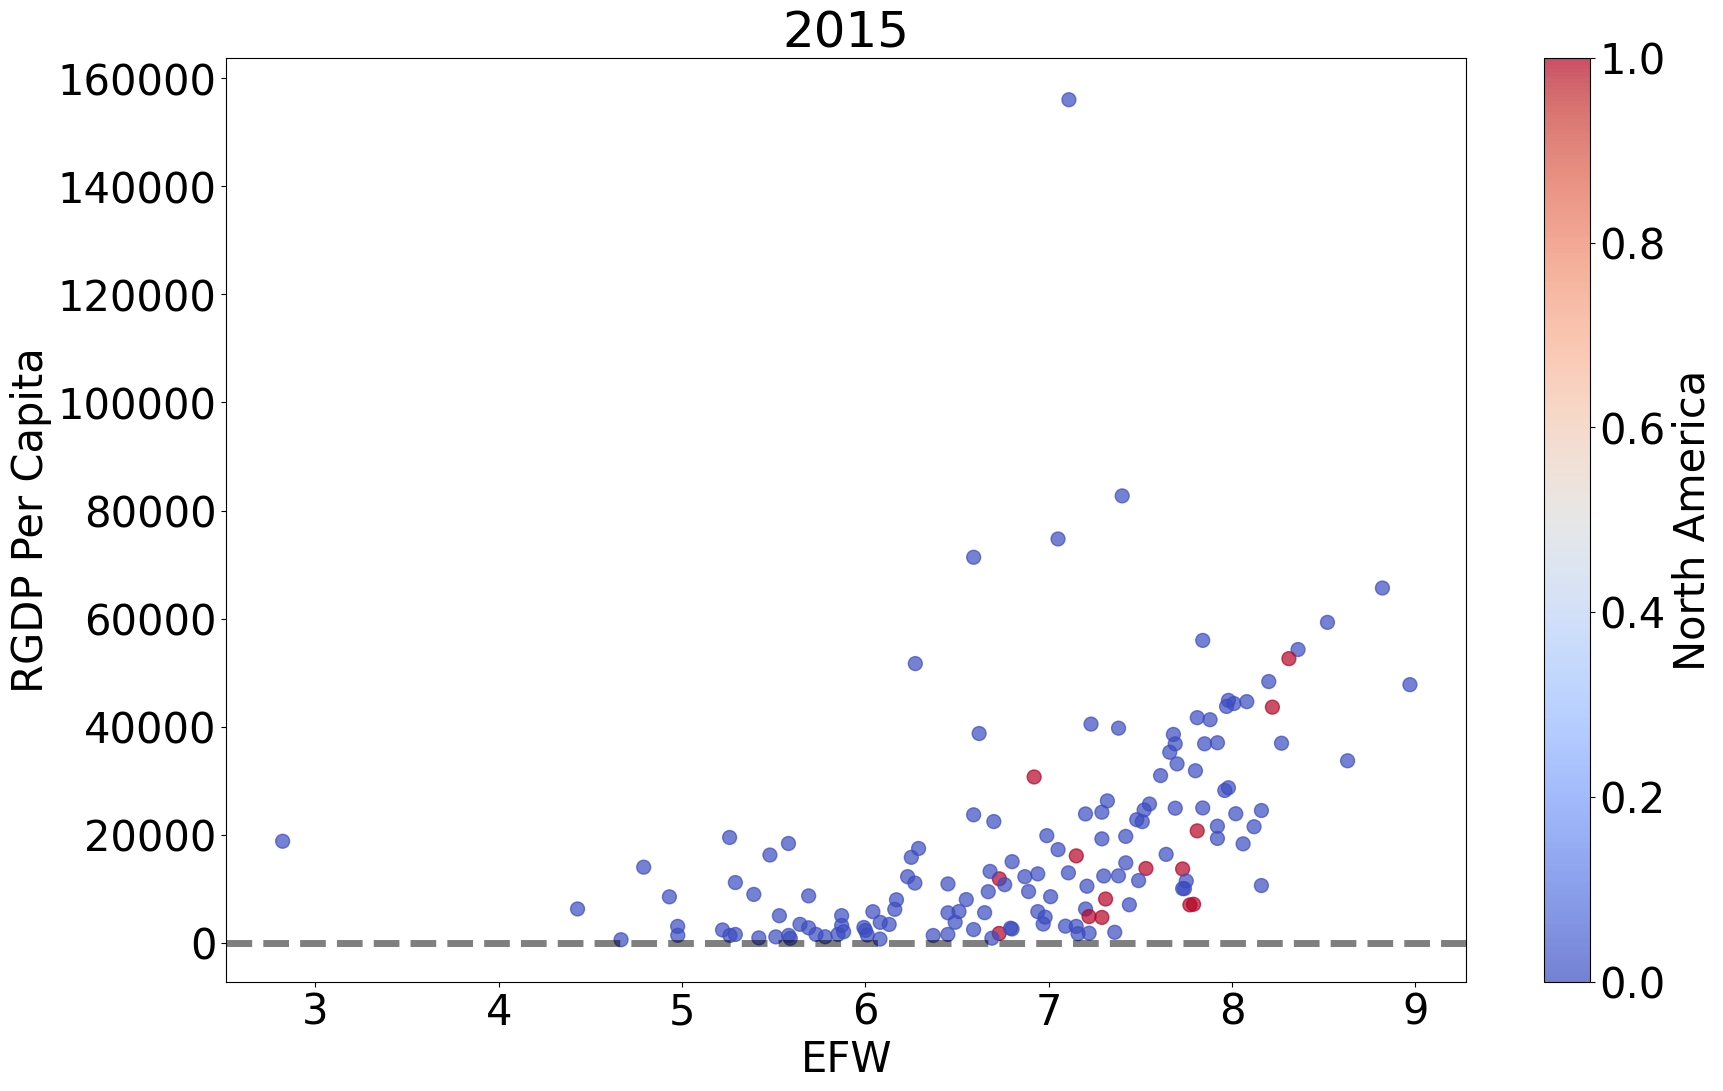

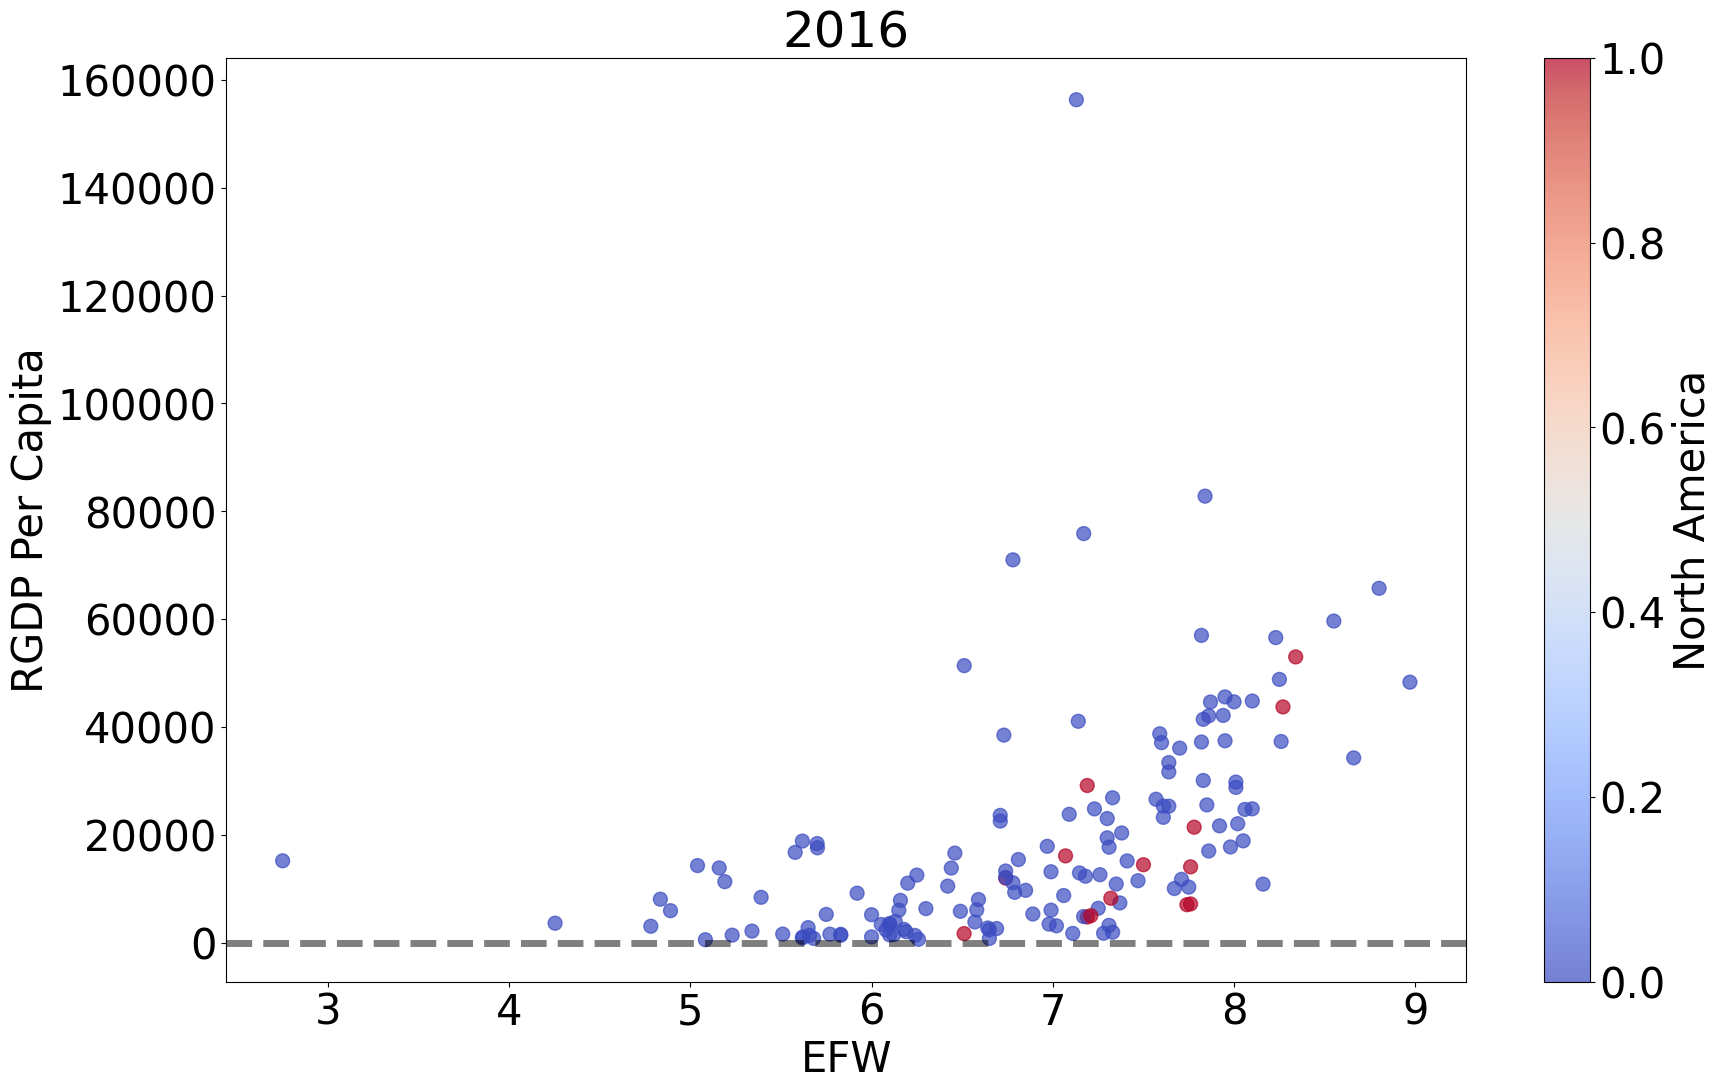

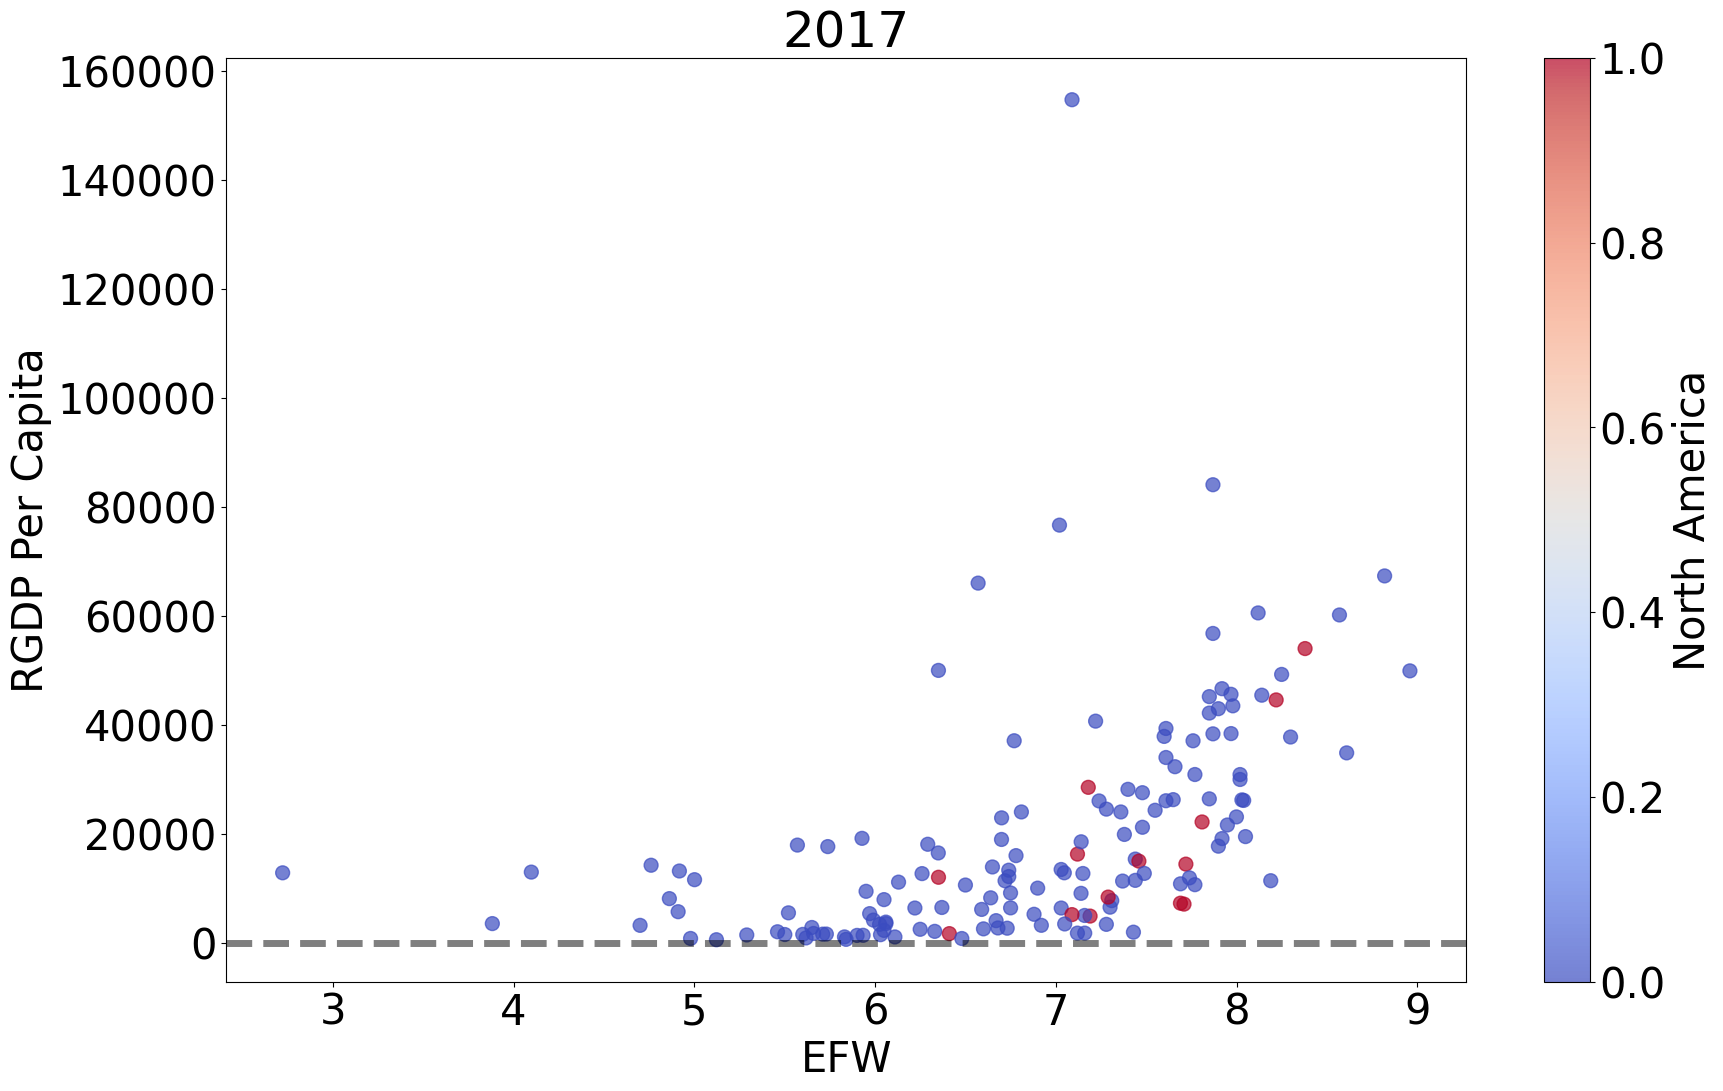

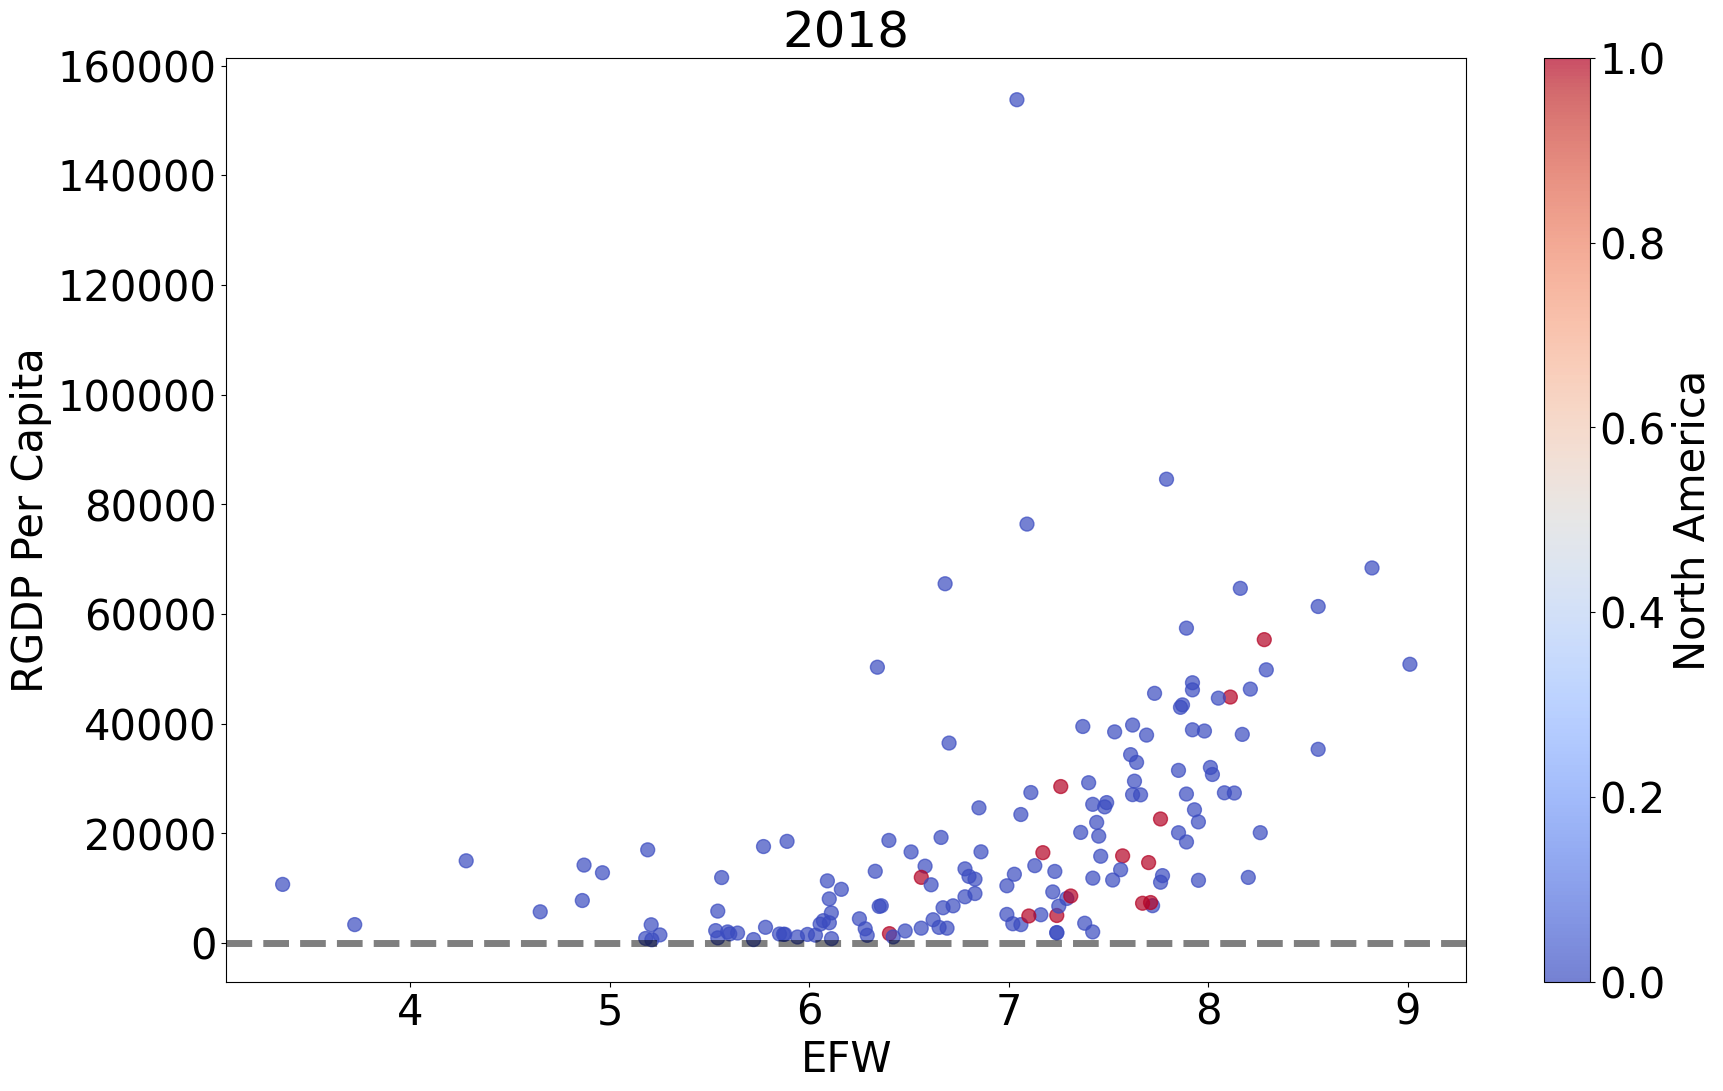

In [7]:
plt.rcParams.update({"font.size":30})
#year = 2000
years = sorted(data.dropna(subset = ["RGDP Per Capita"]).index.get_level_values("Year").unique())
for year in years:
    plot_data = data[data.index.get_level_values("Year") == str(year)]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW",
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = "coolwarm",
                          s = 100,
                          alpha = 0.7,
                          ax =ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls="--", color = "k", alpha = 0.5, linewidth = 5)

C:\Users\hthog\AppData\Local\Temp\ipykernel_11868\2048801809.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,12))


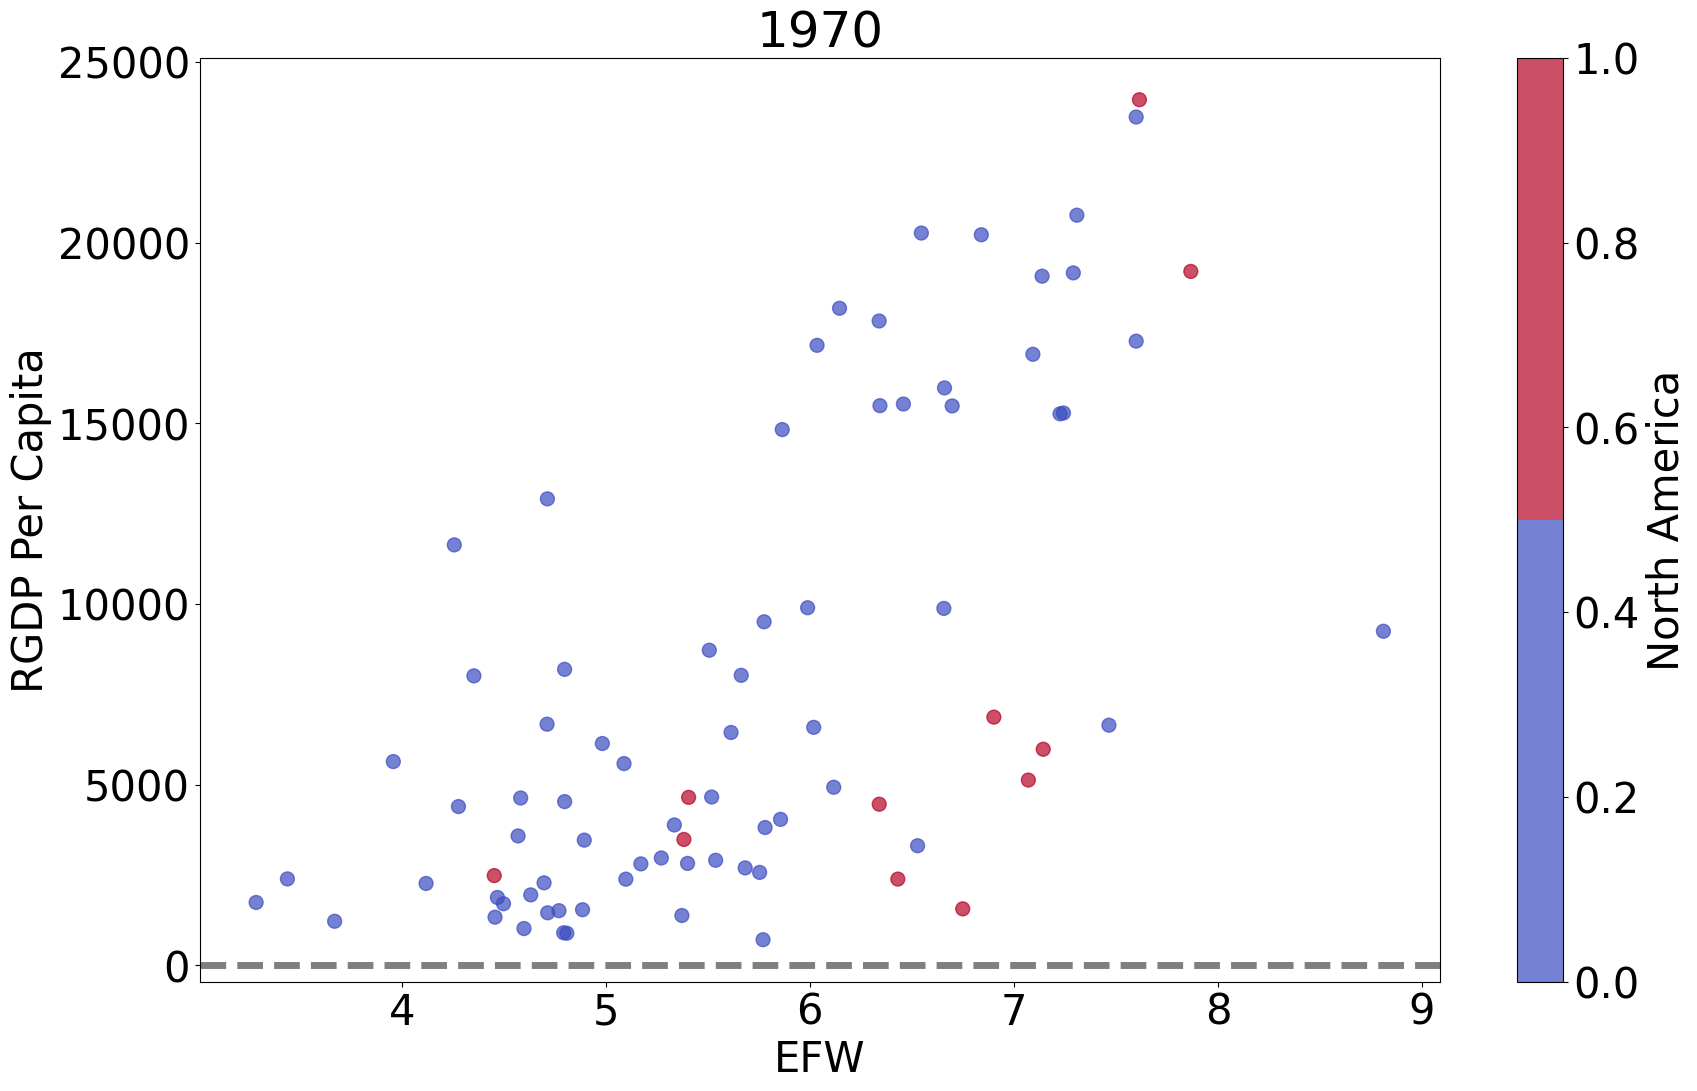

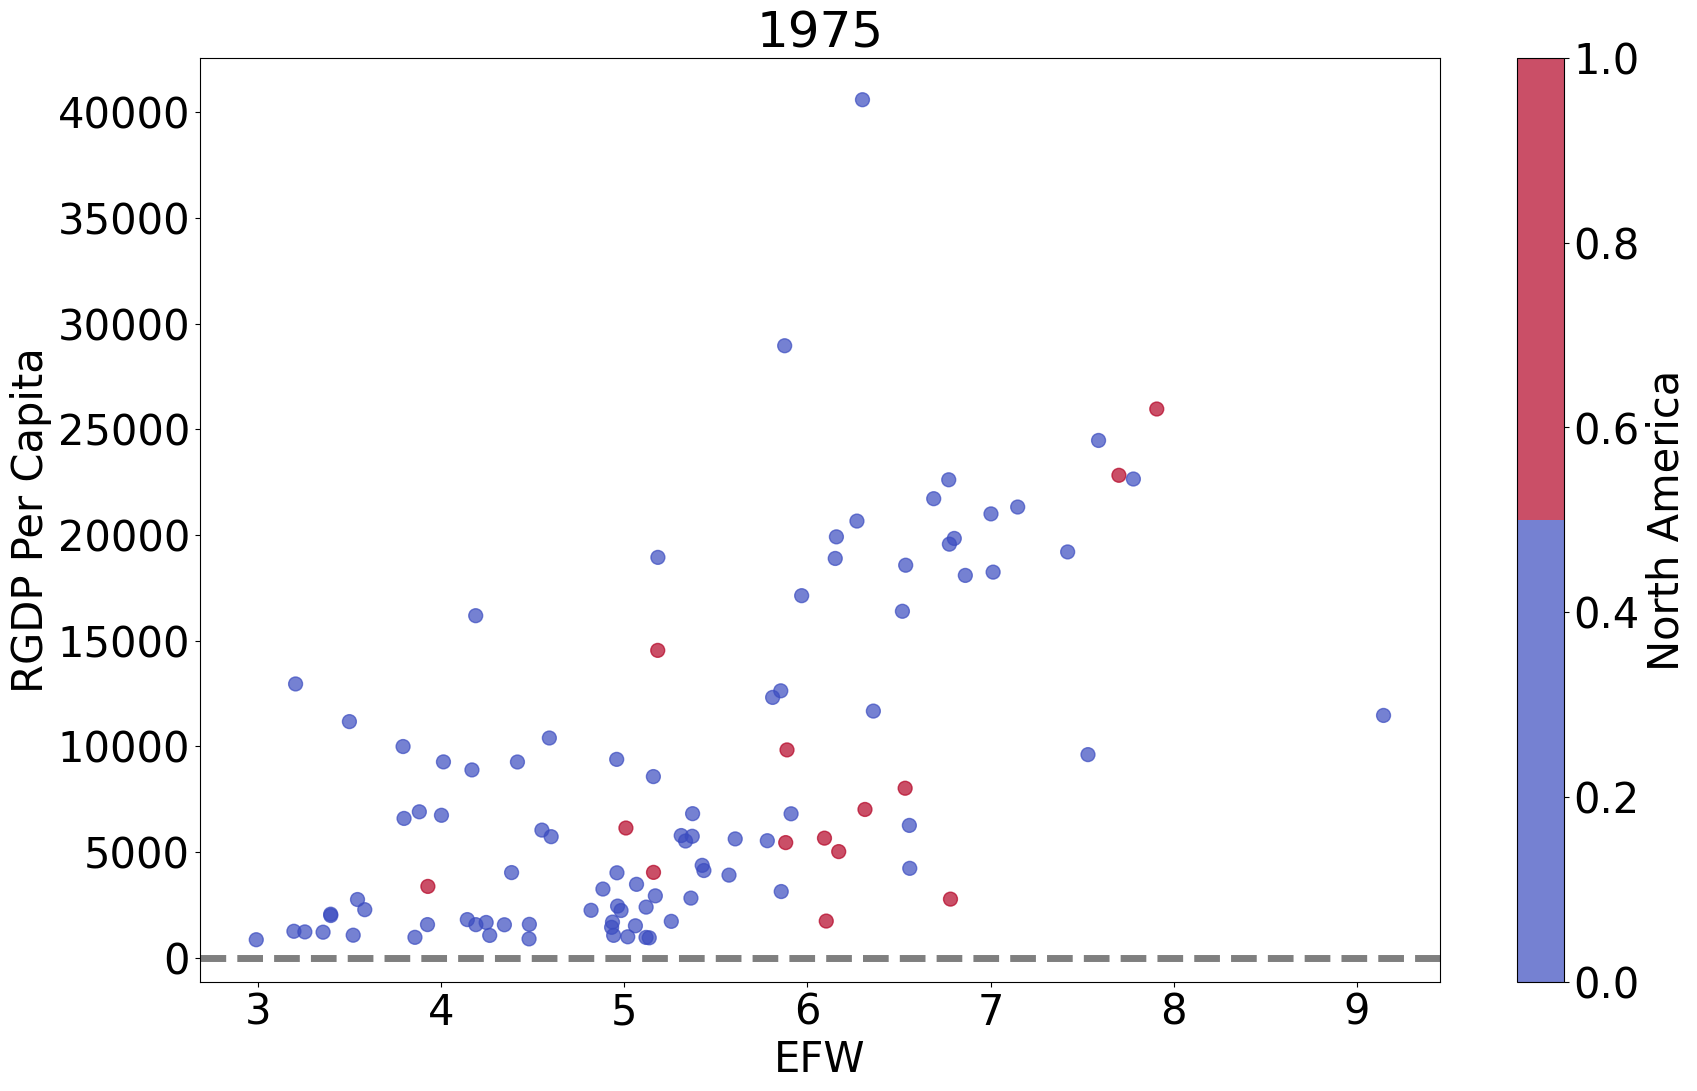

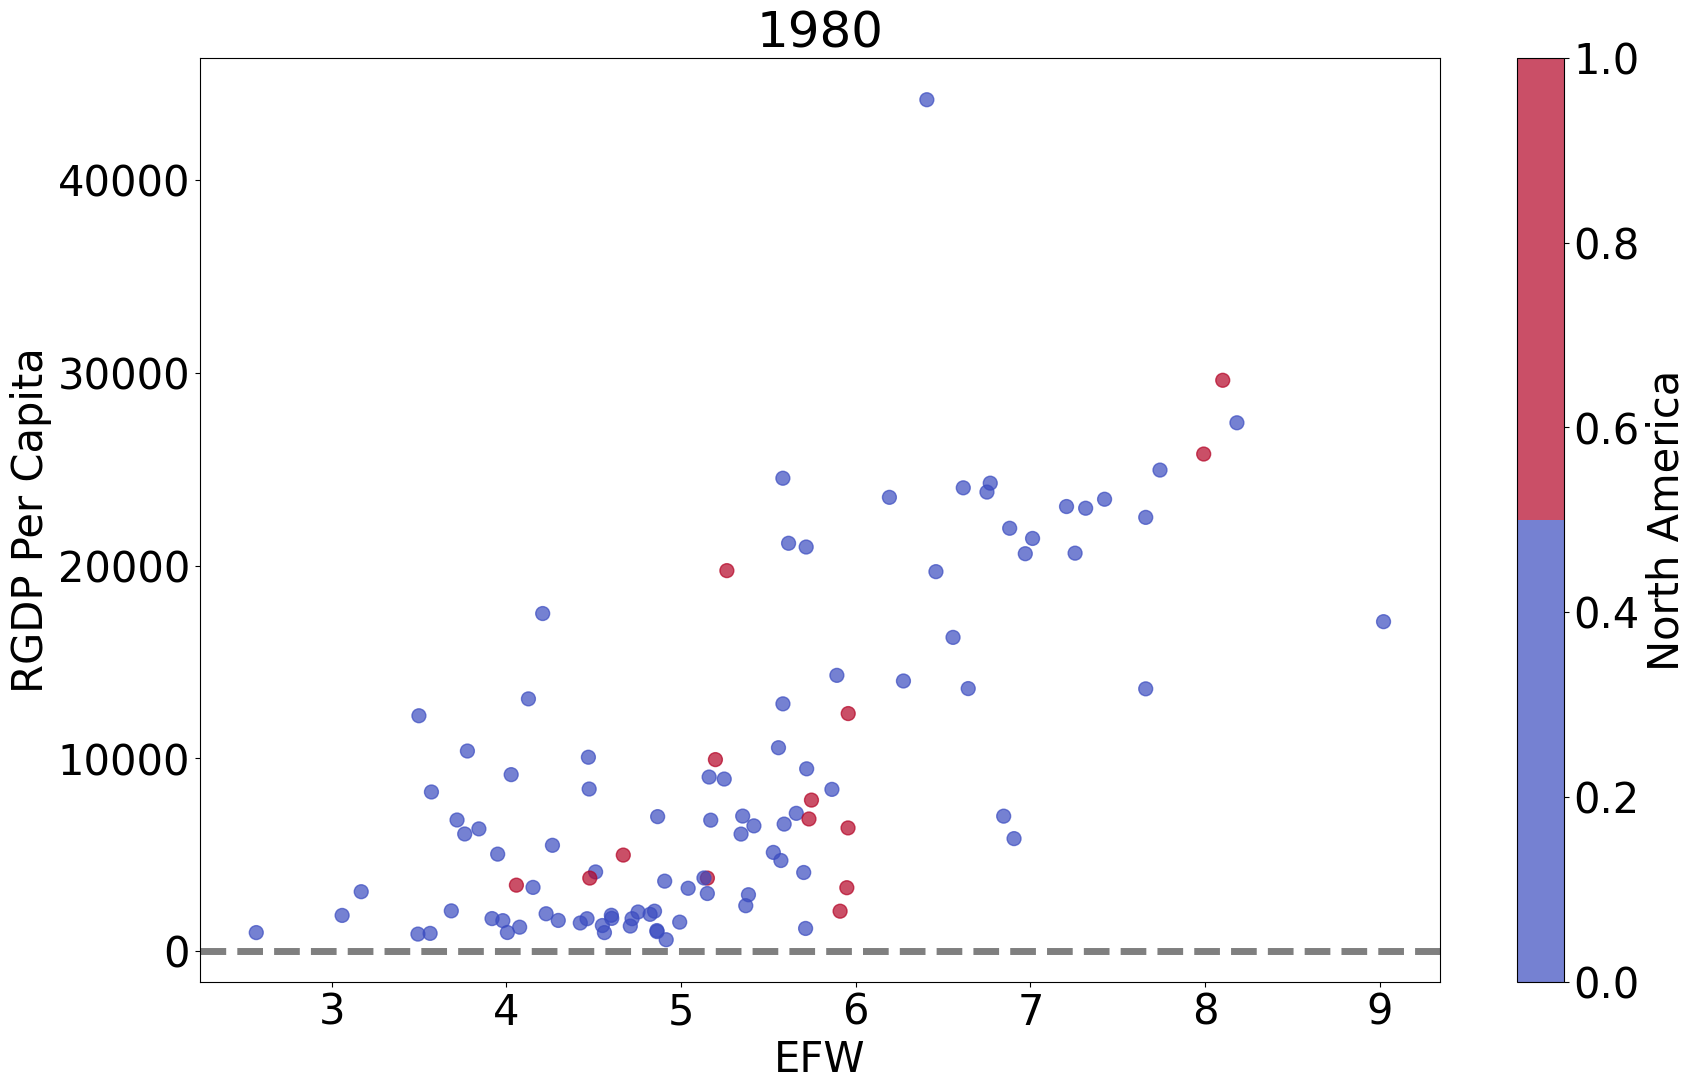

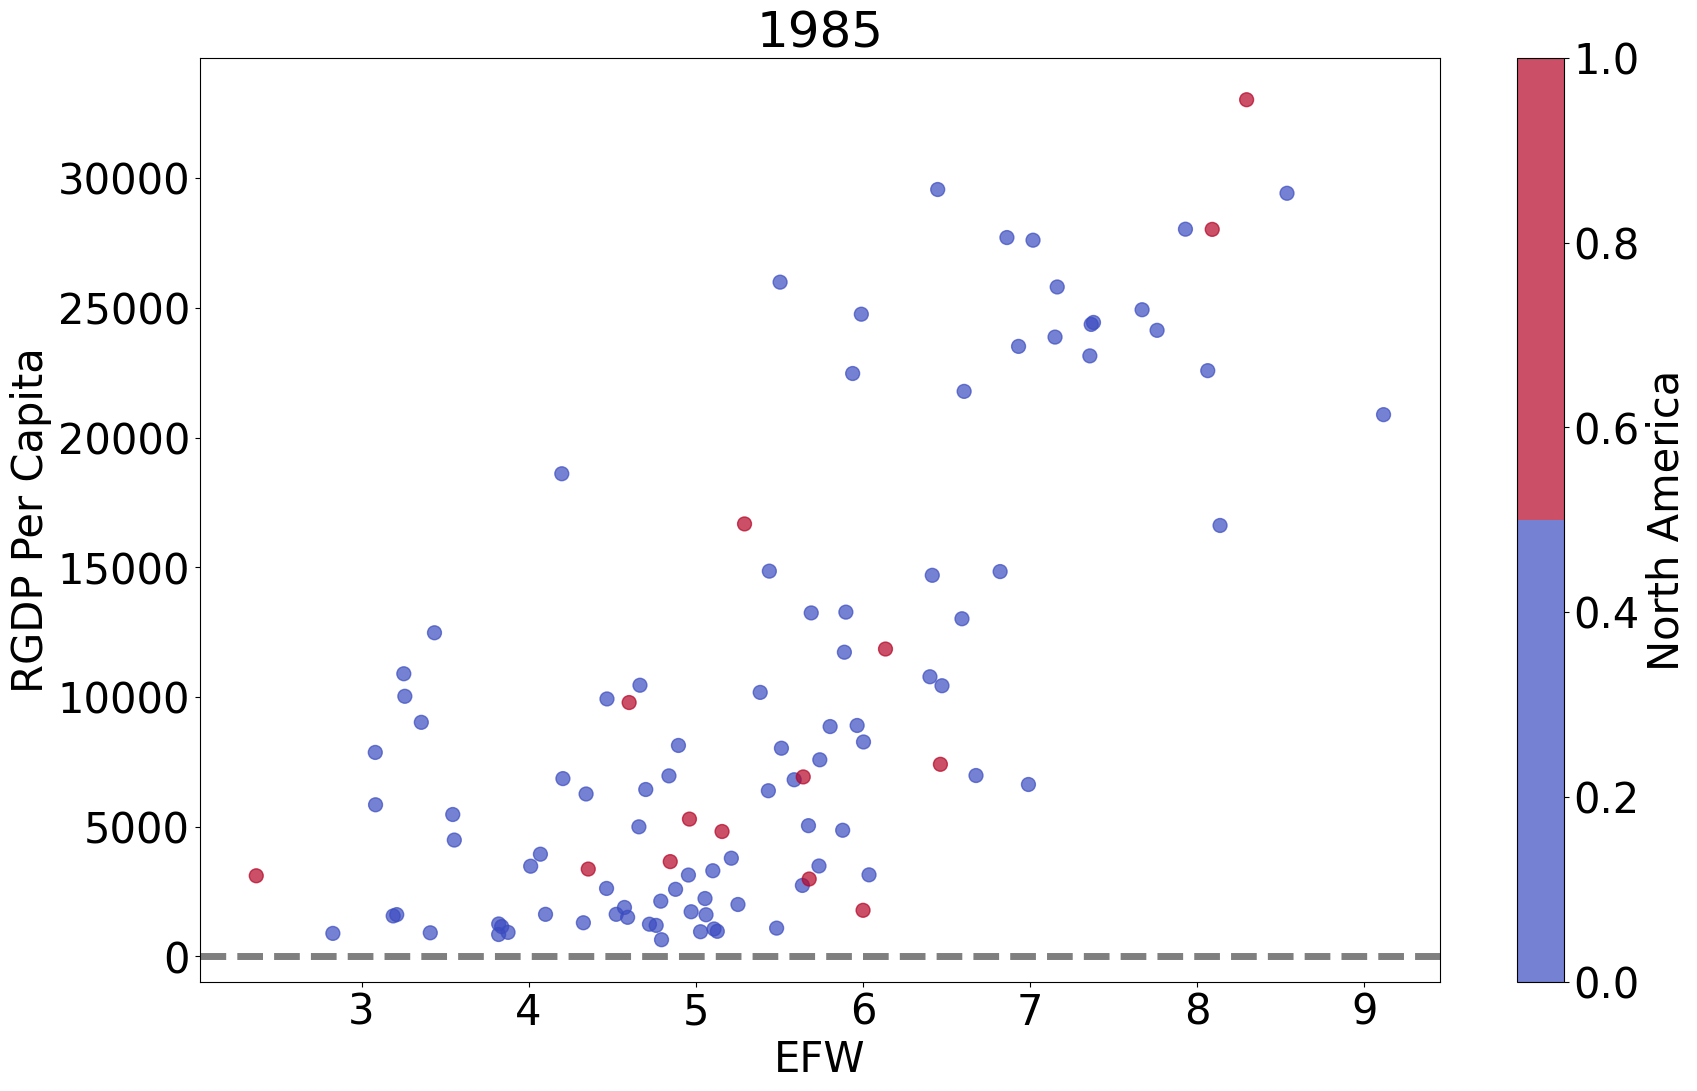

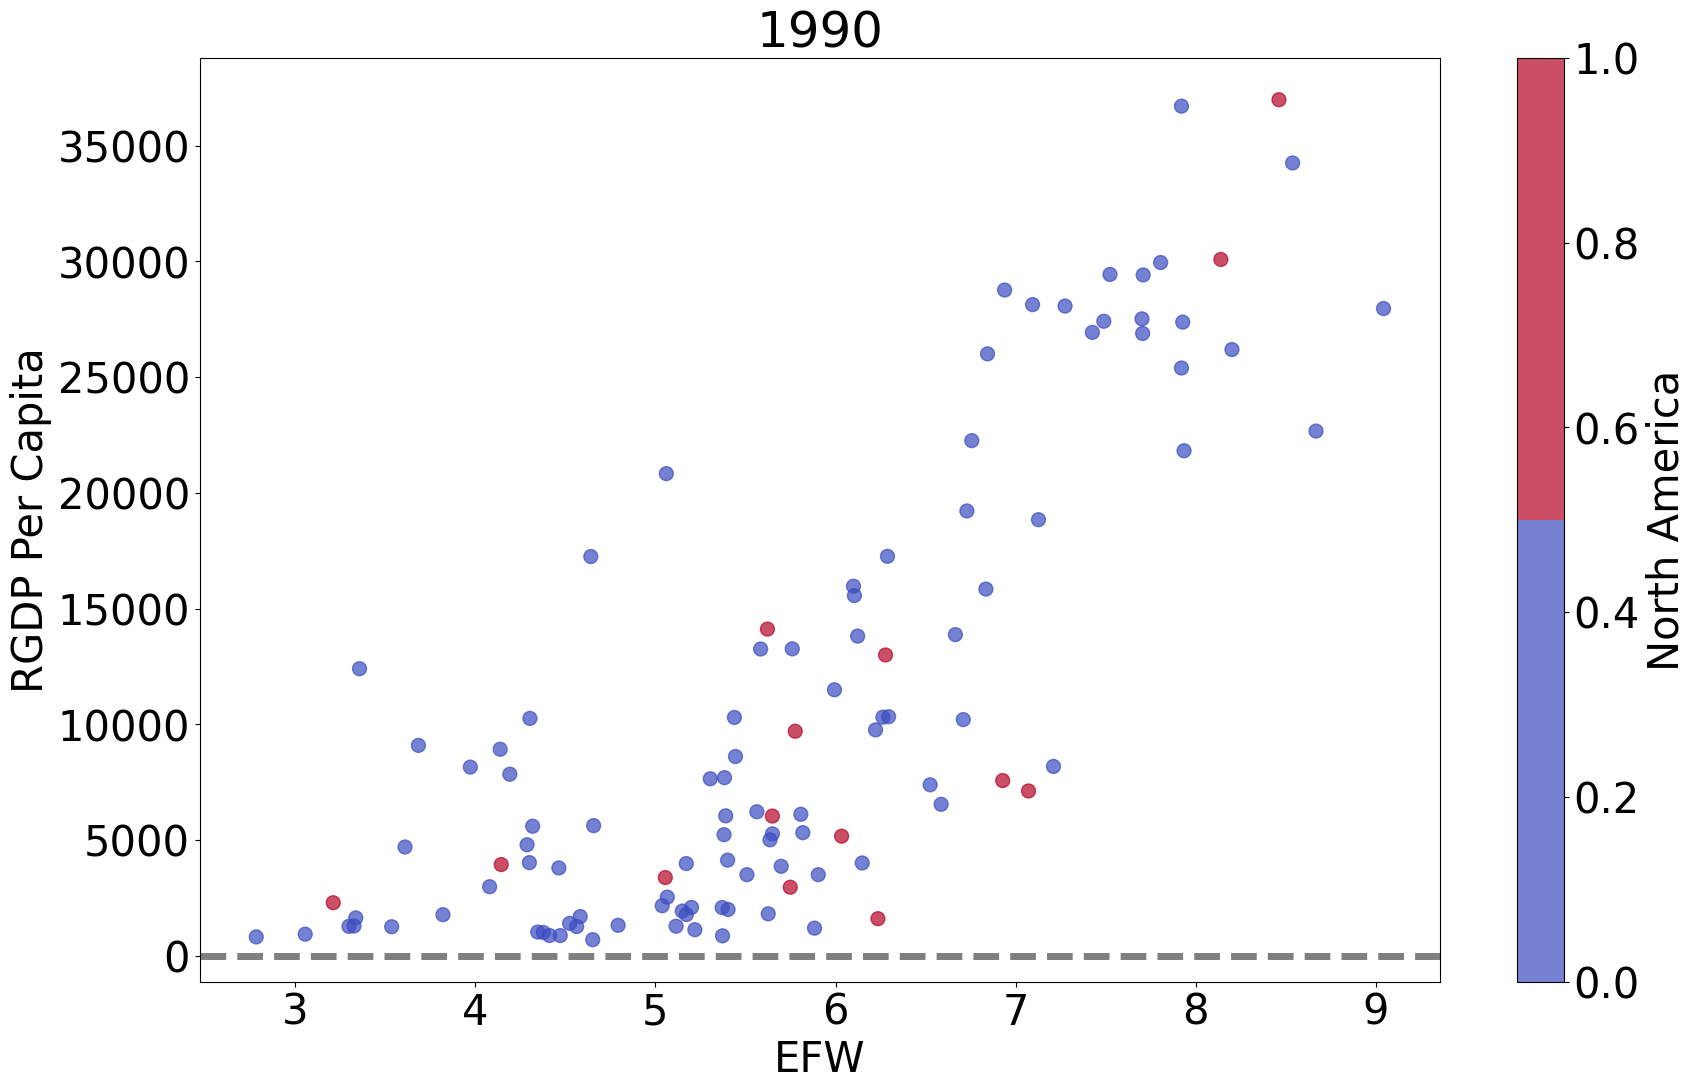

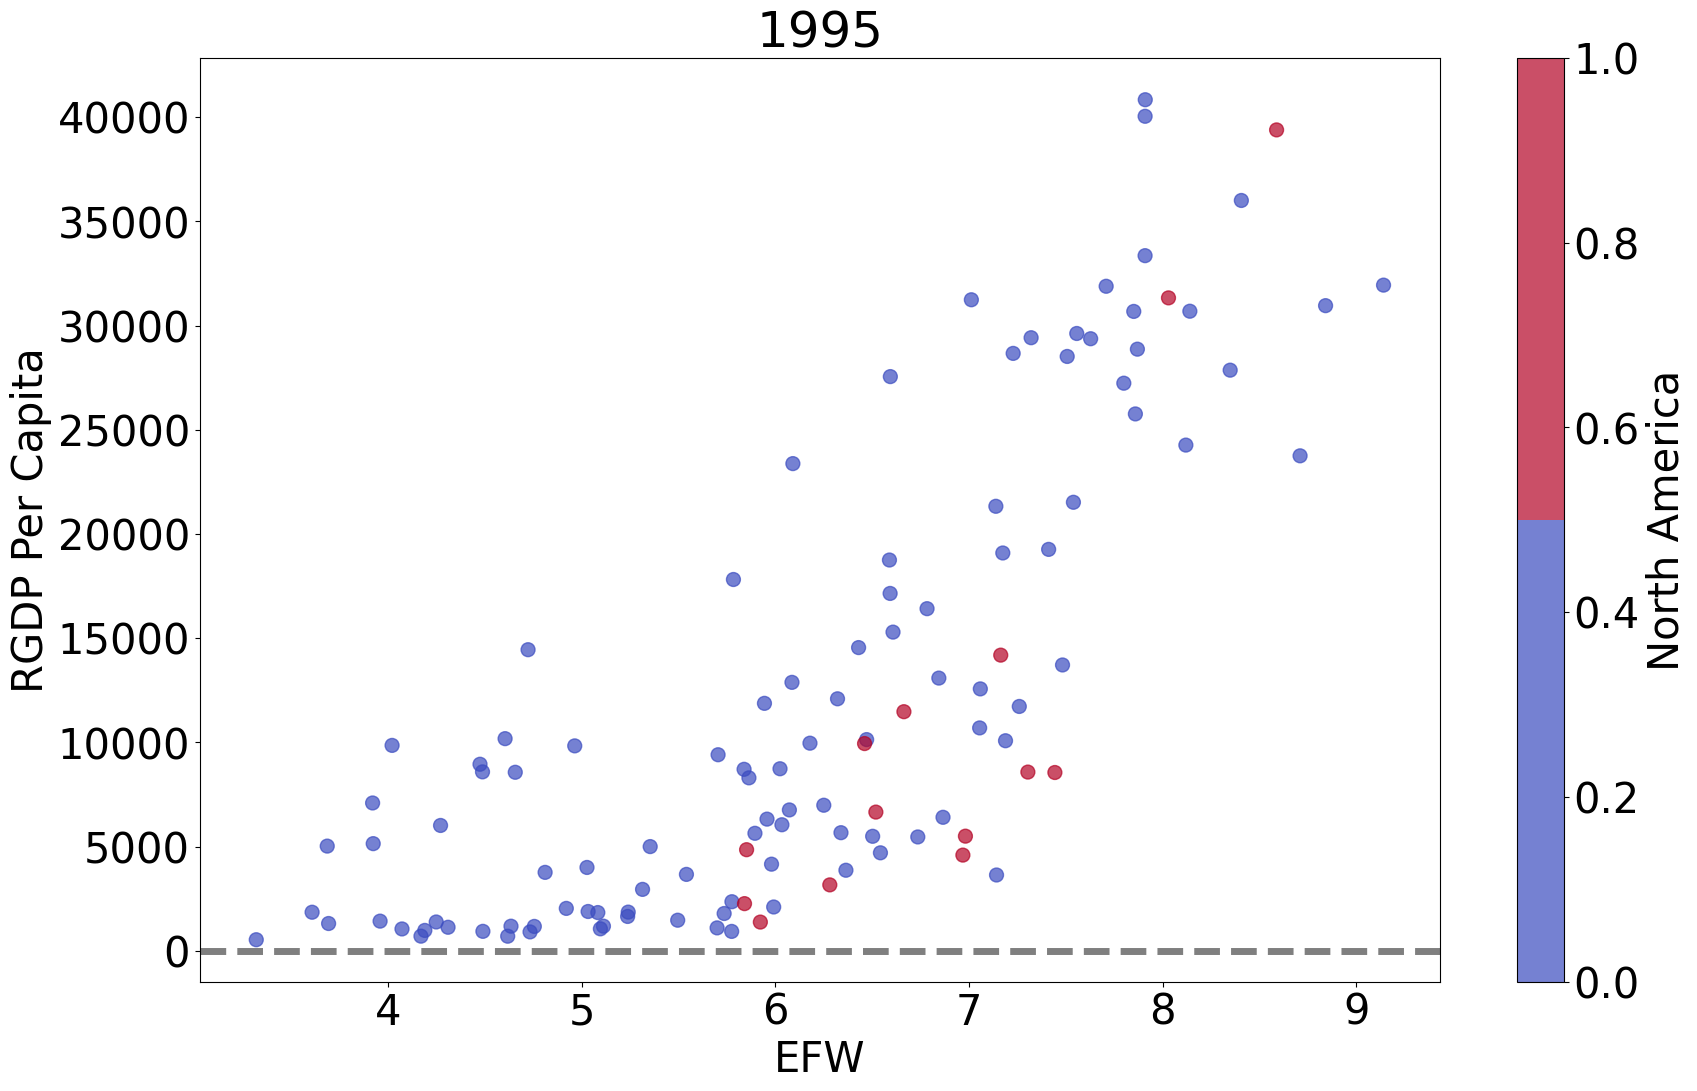

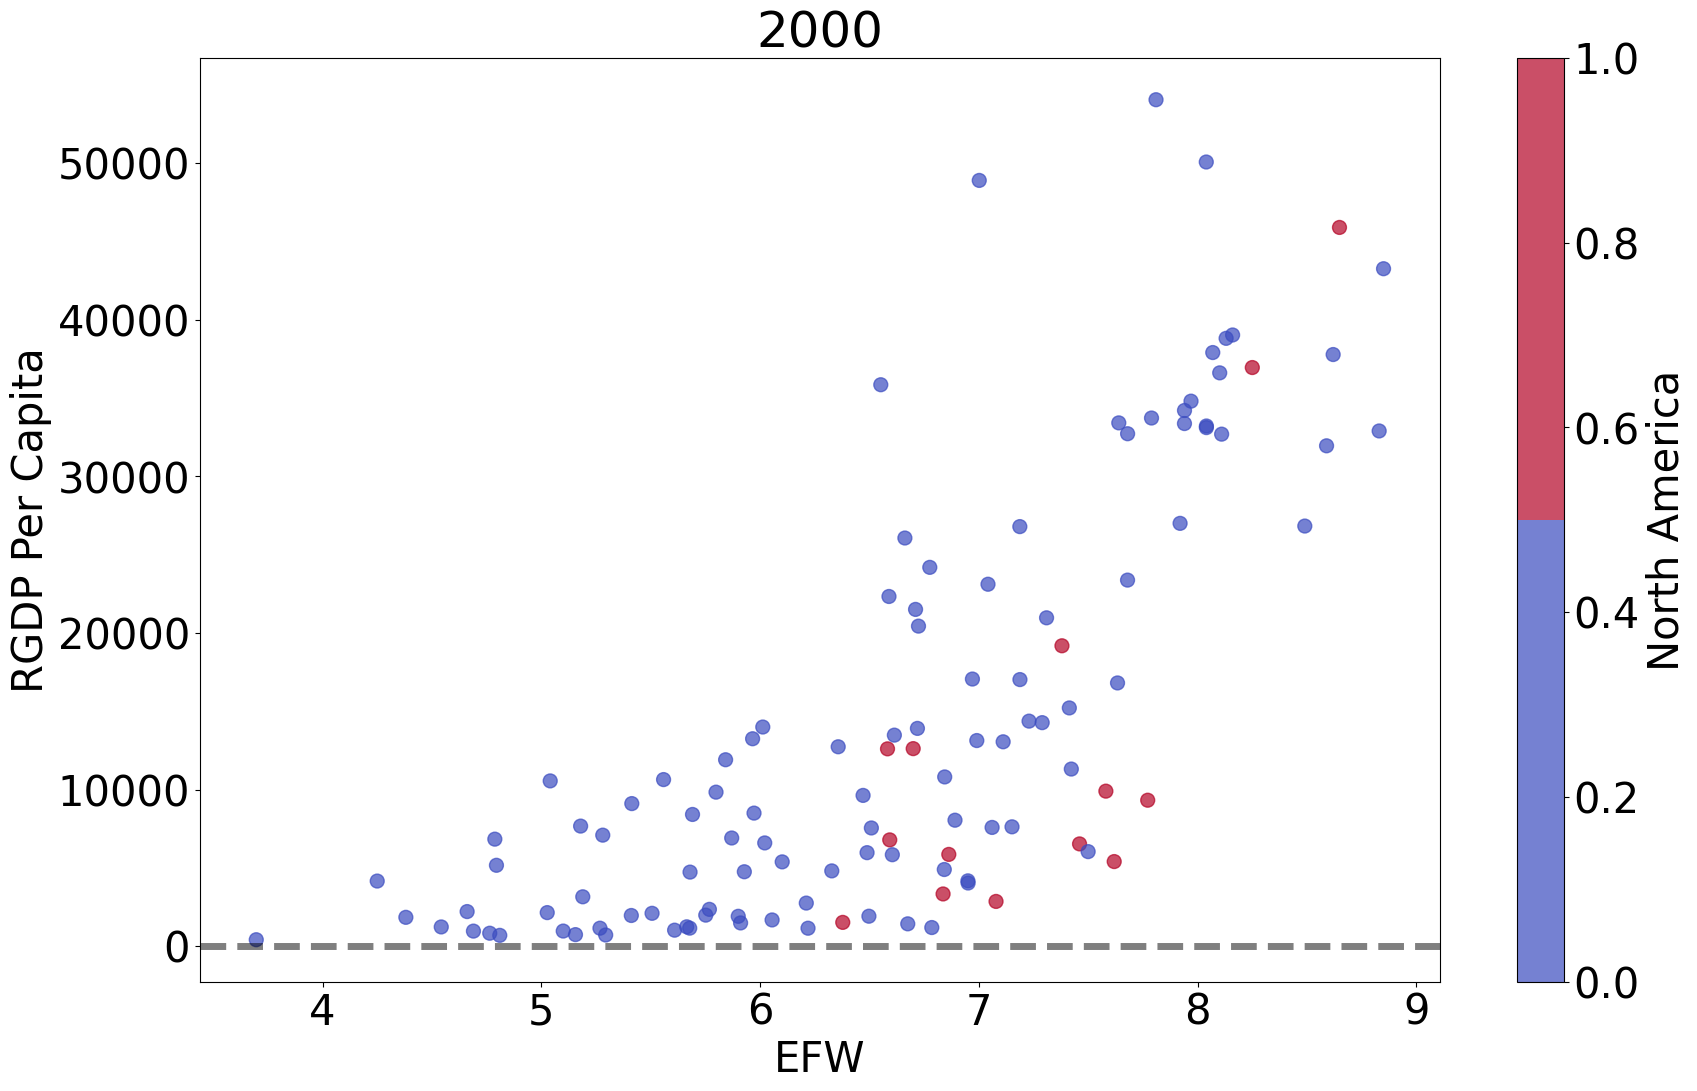

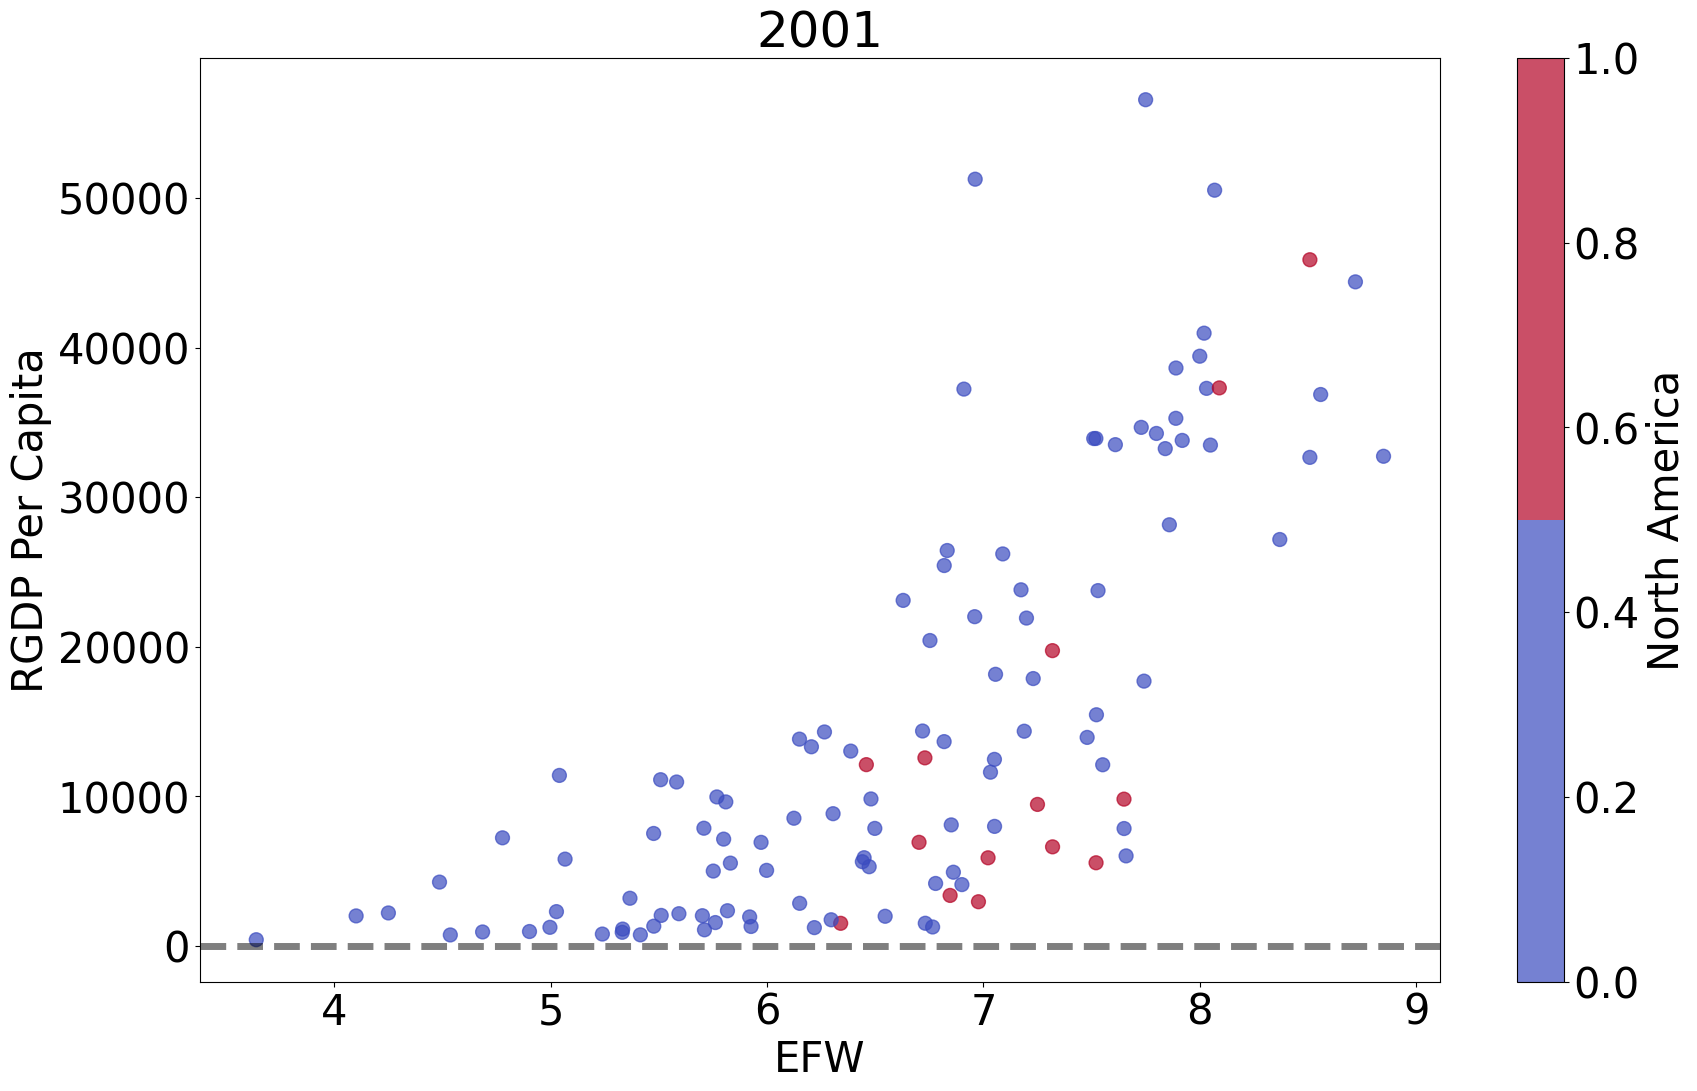

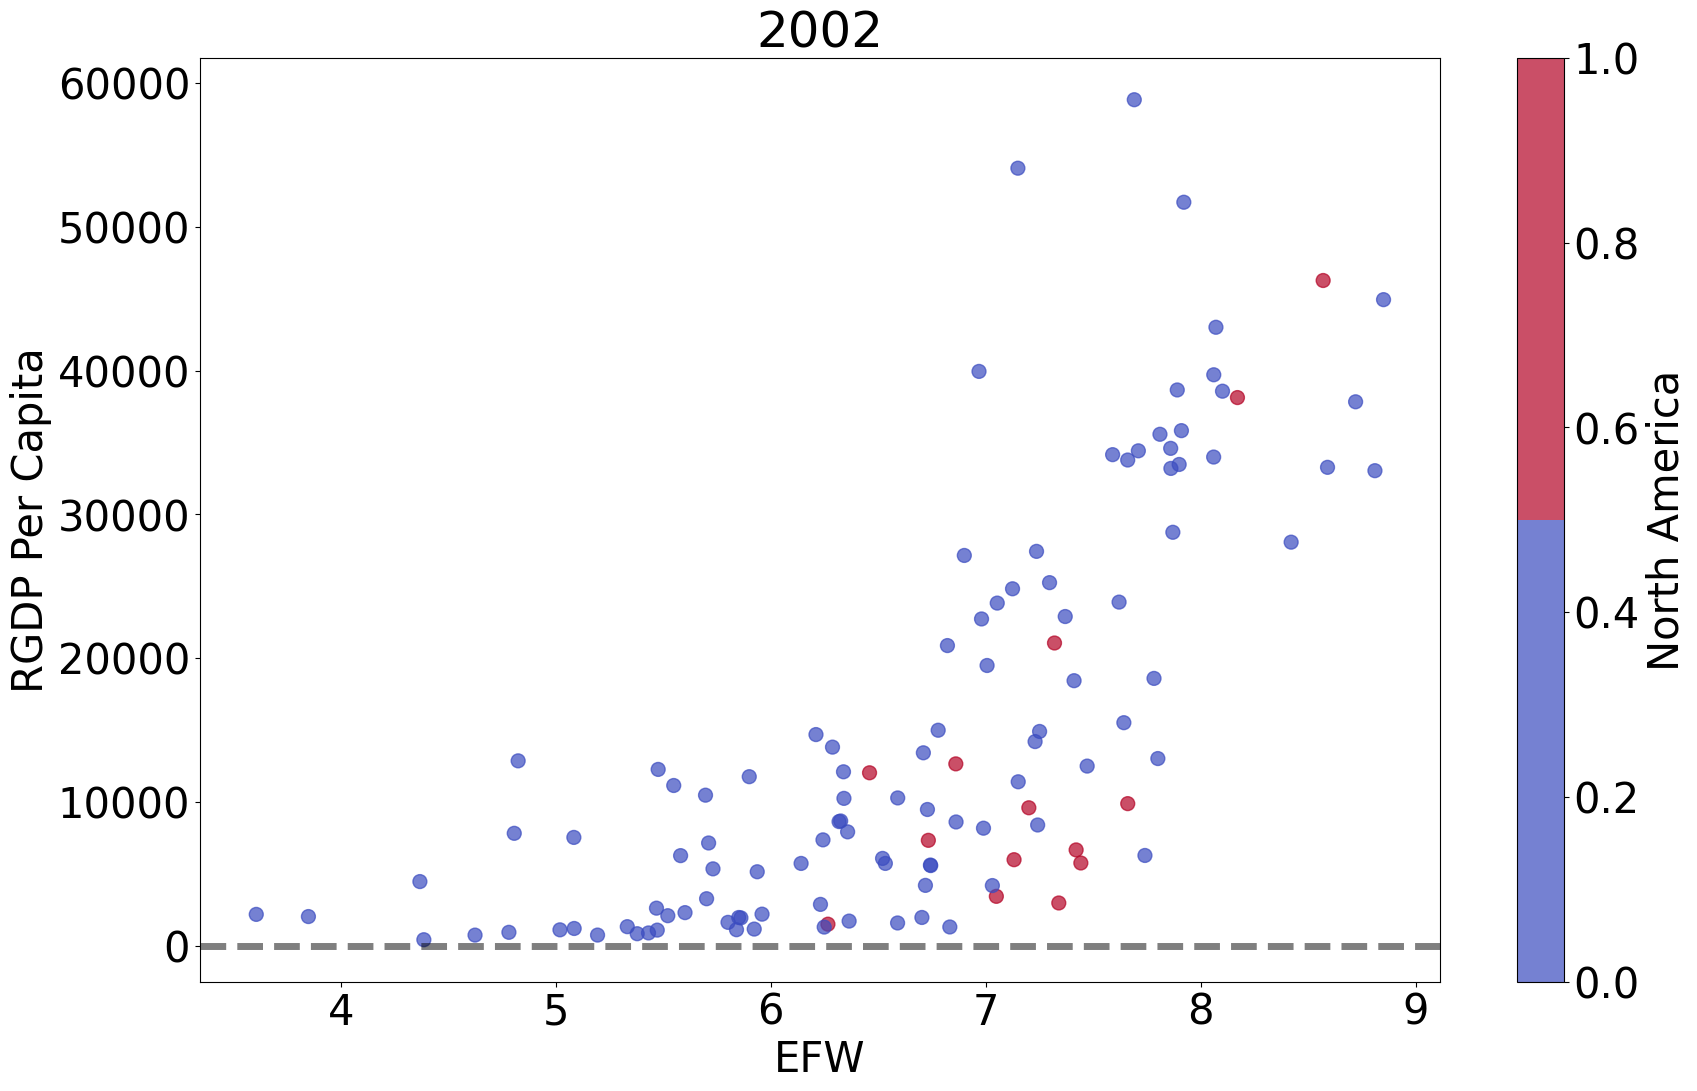

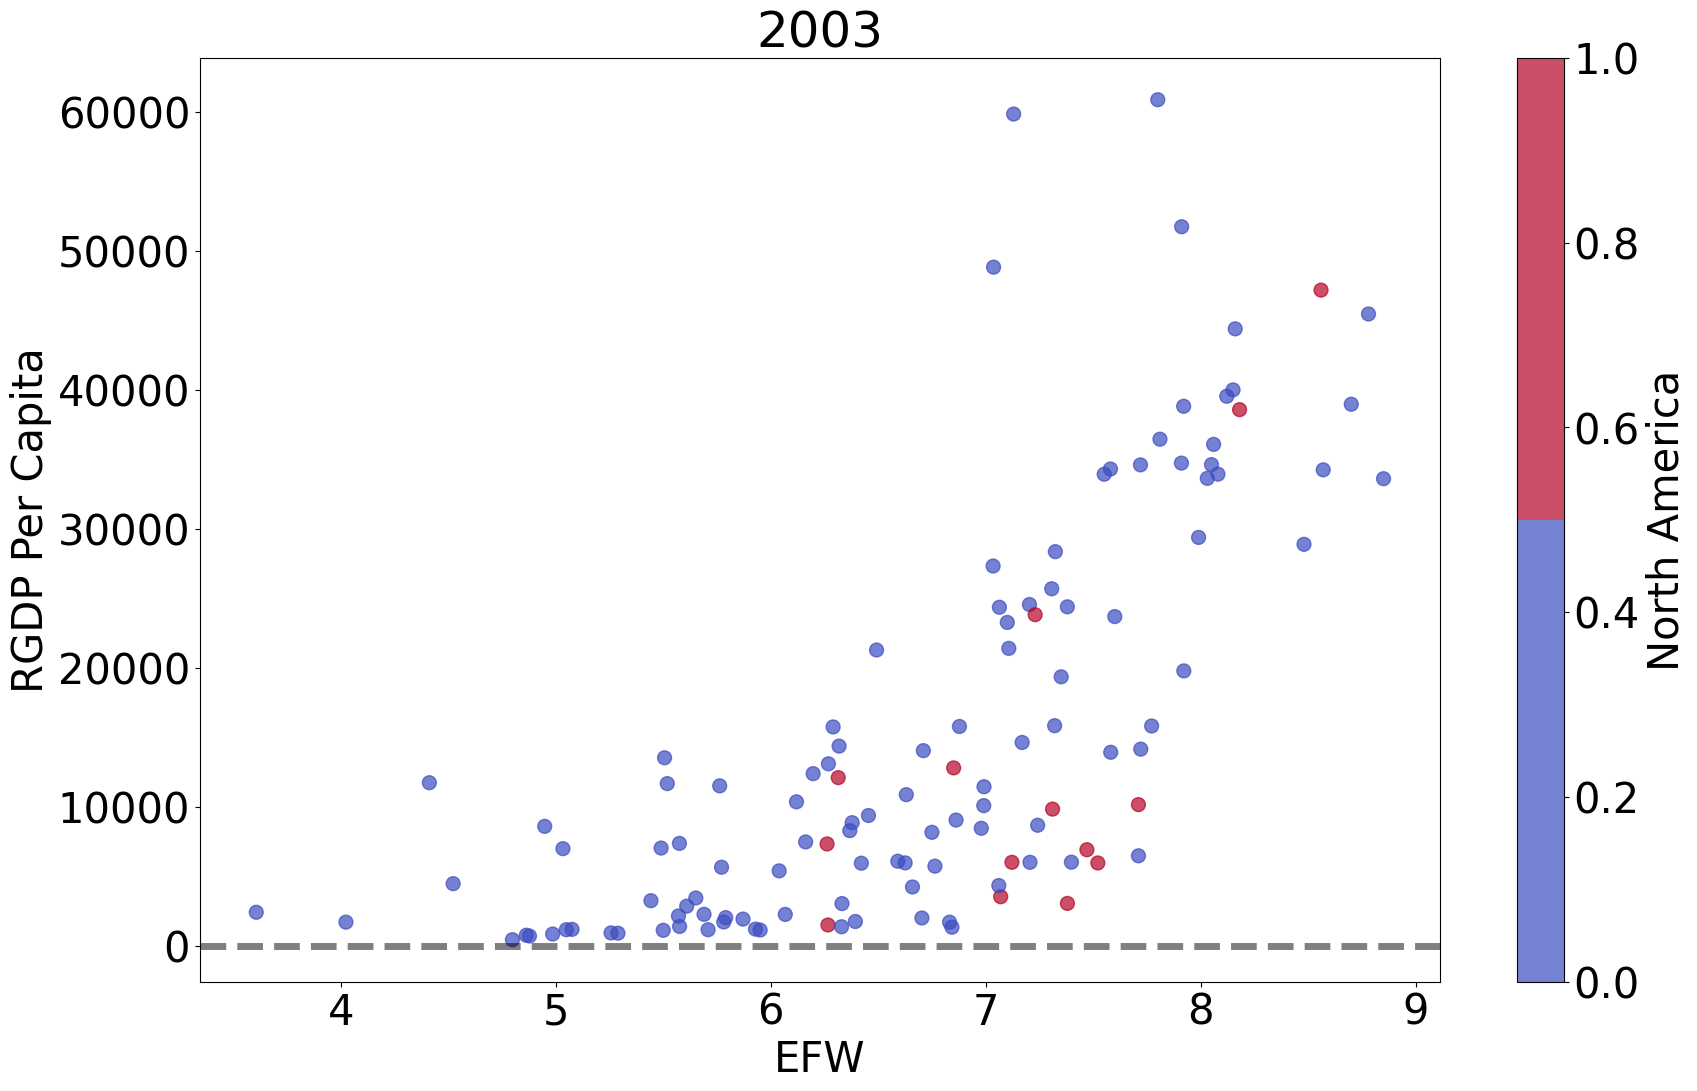

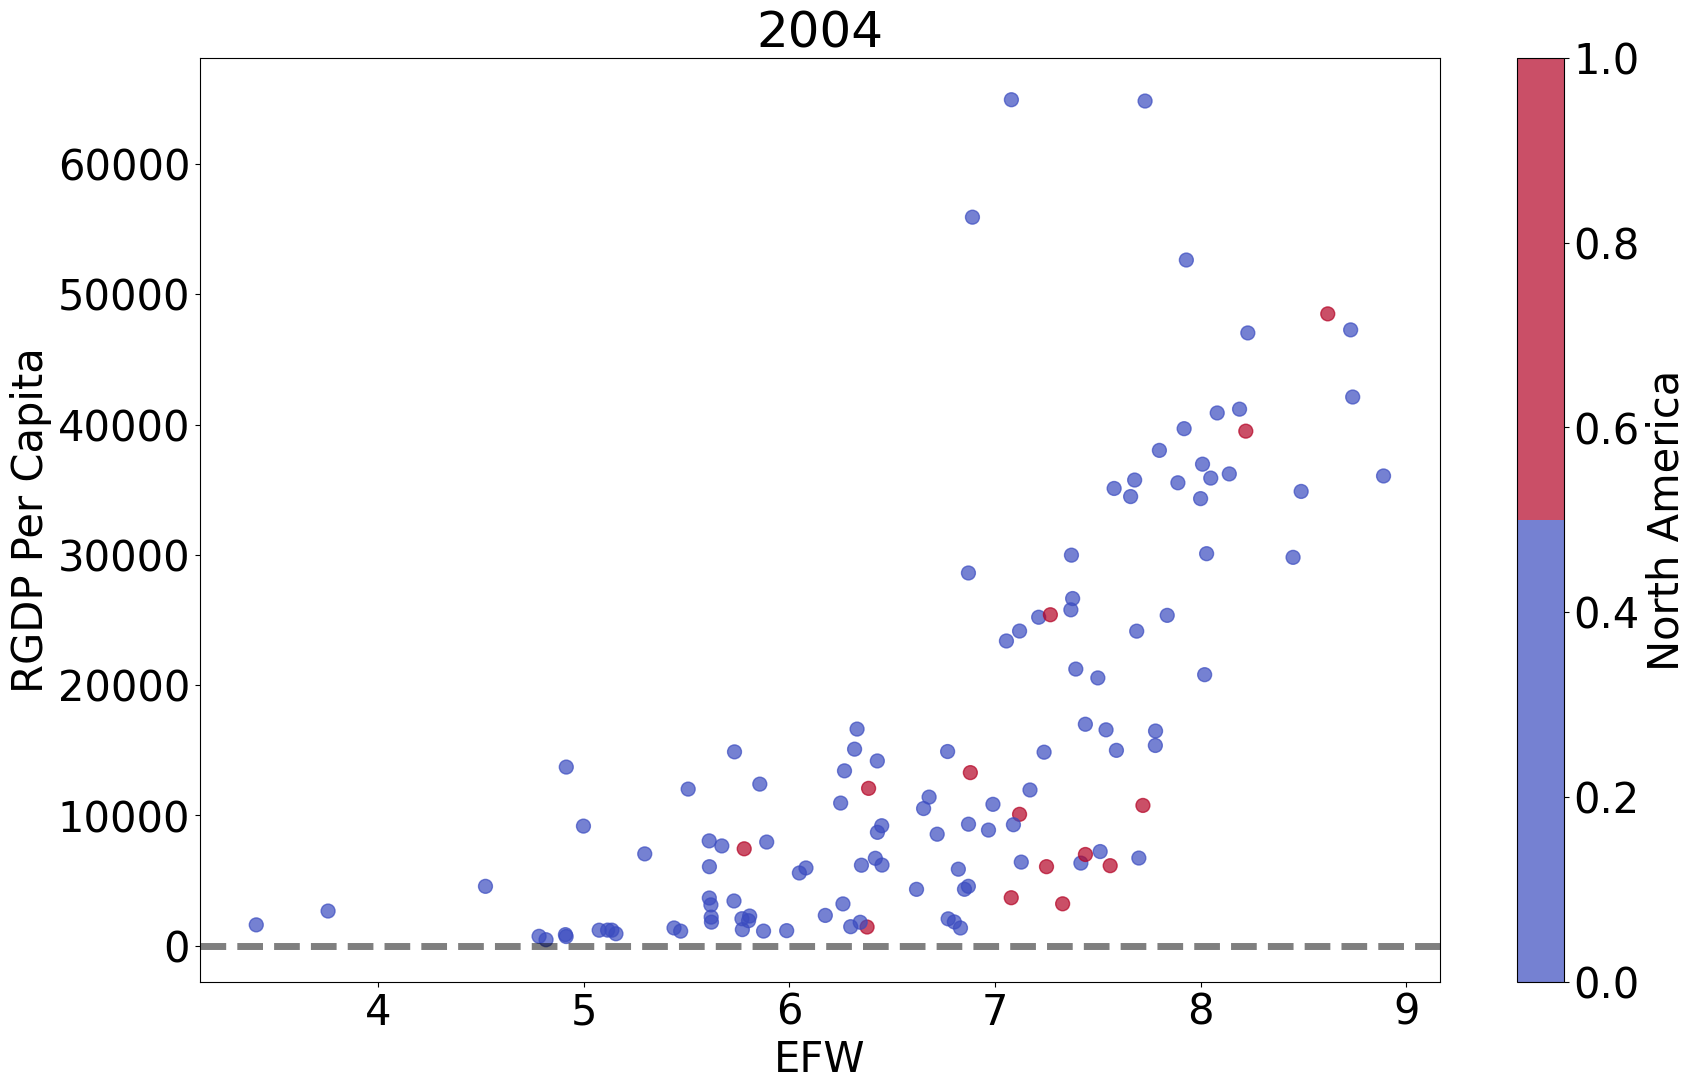

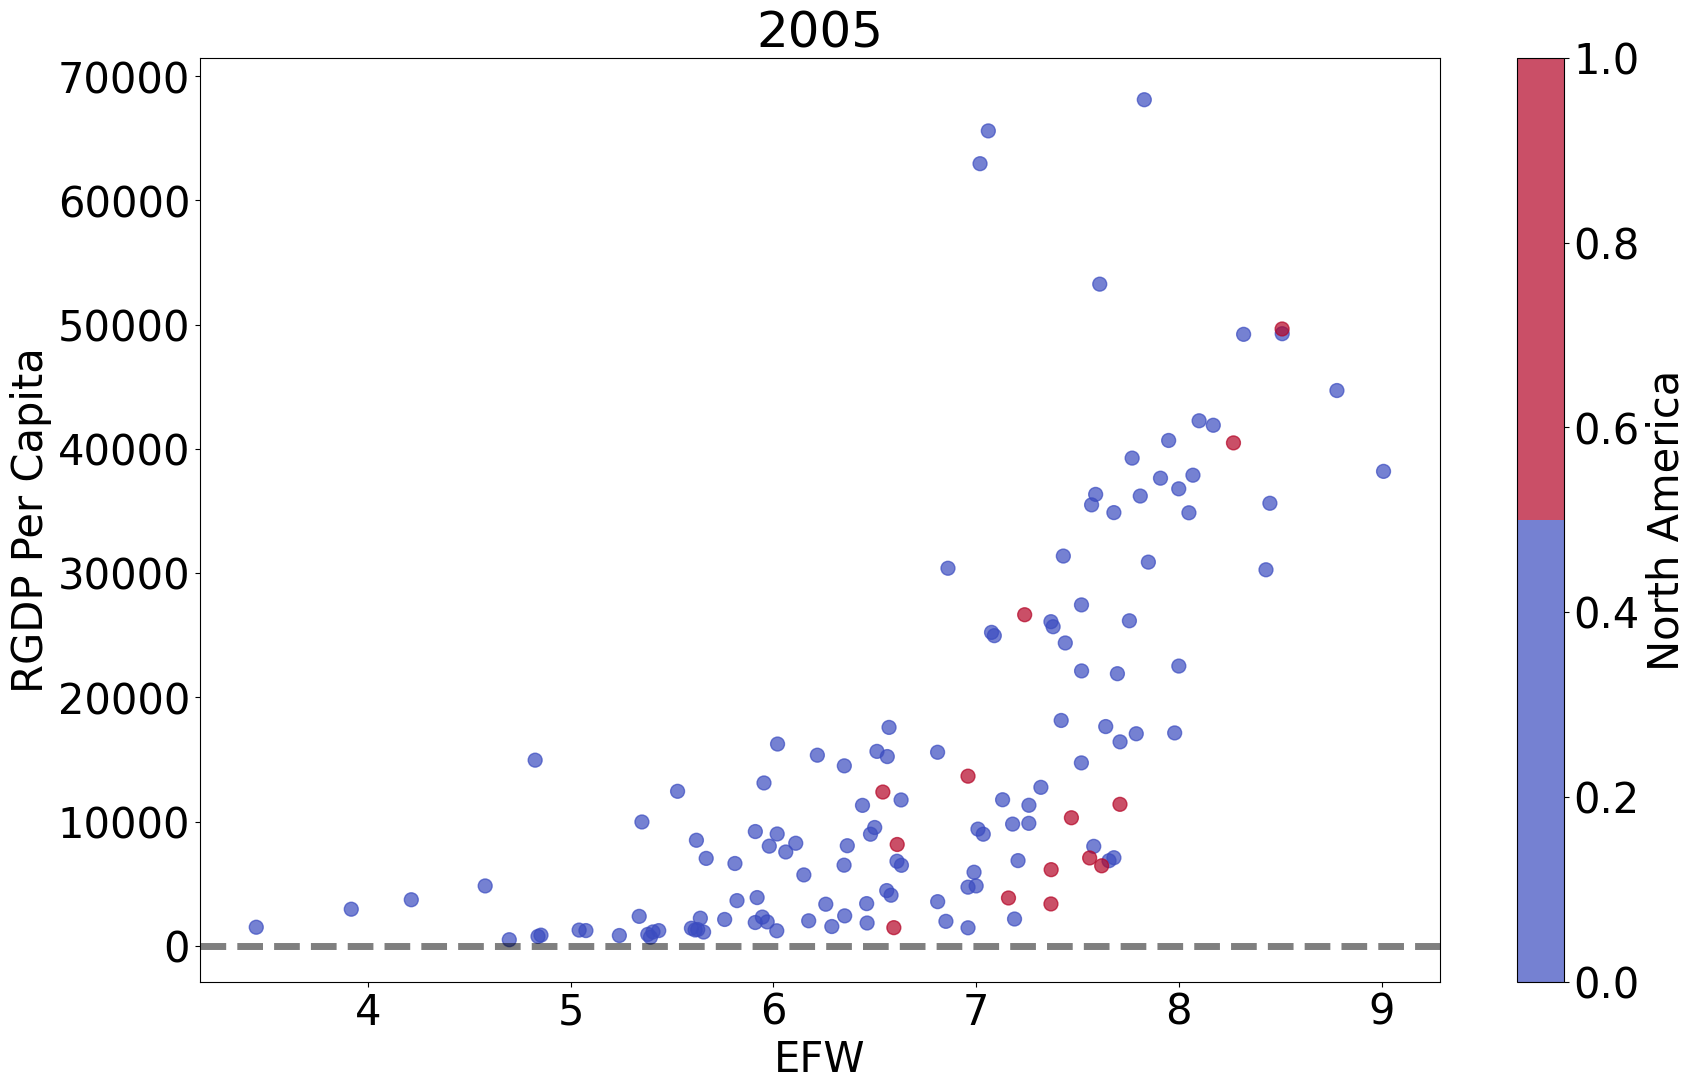

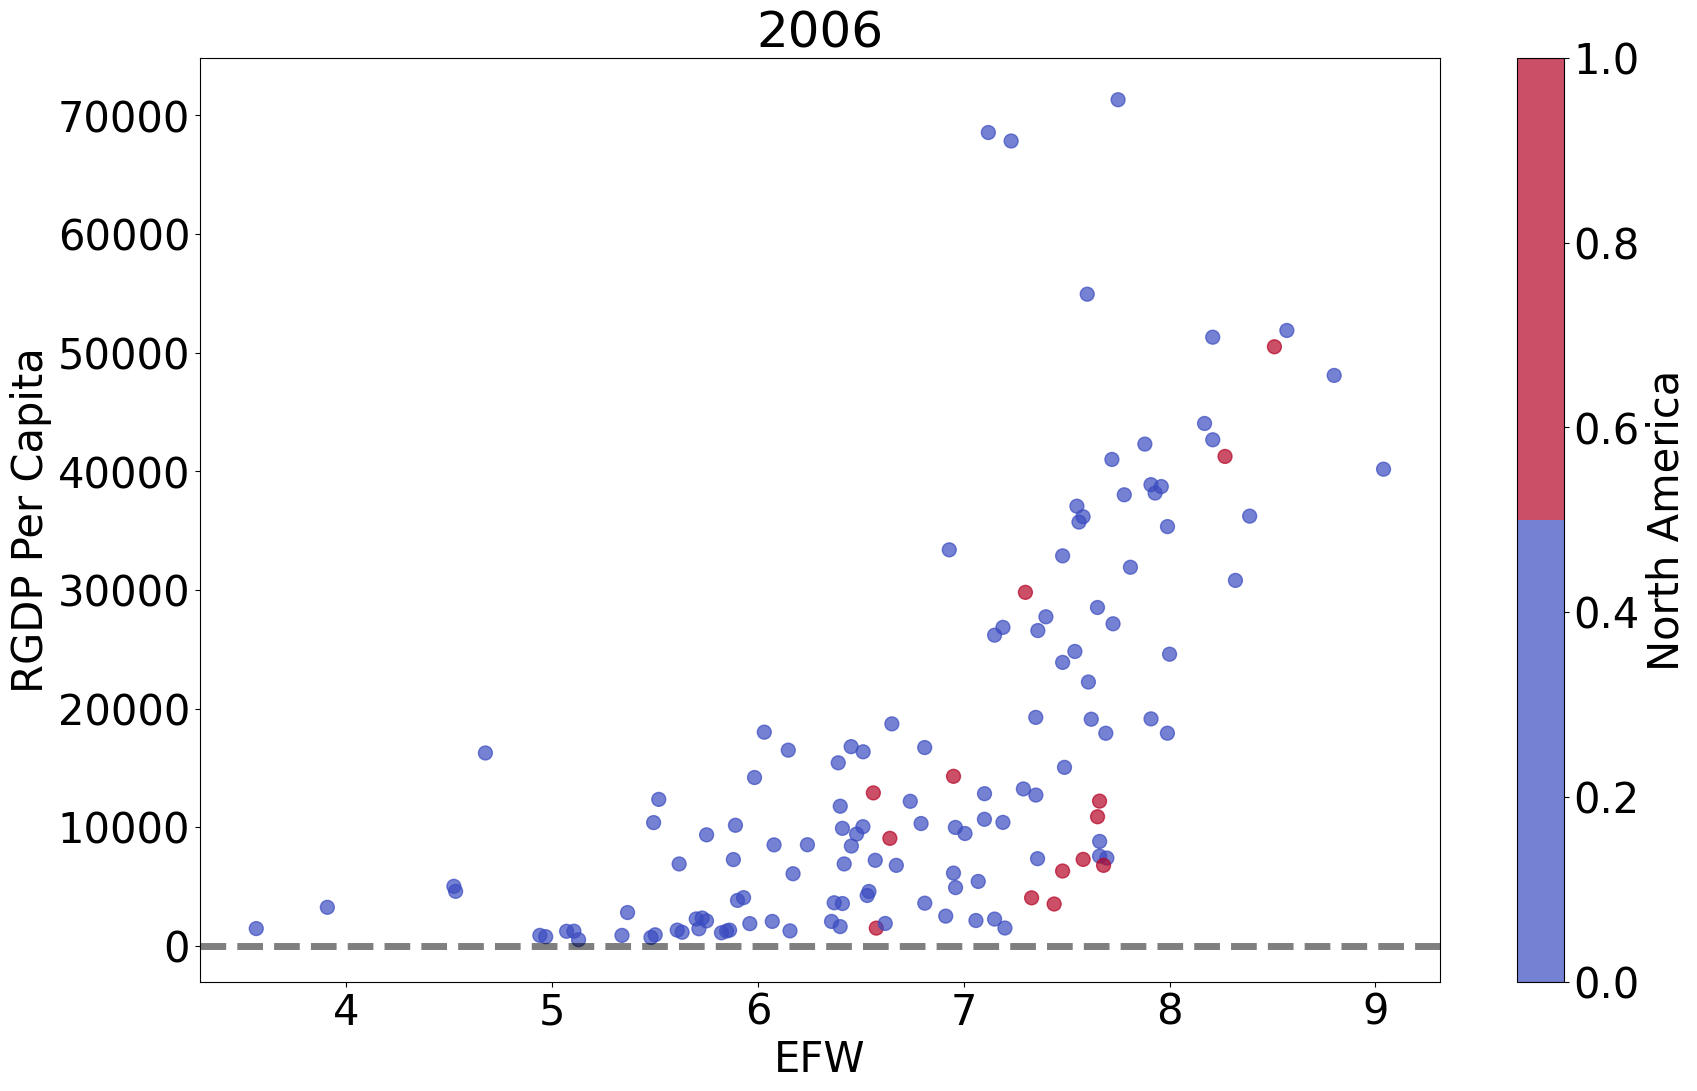

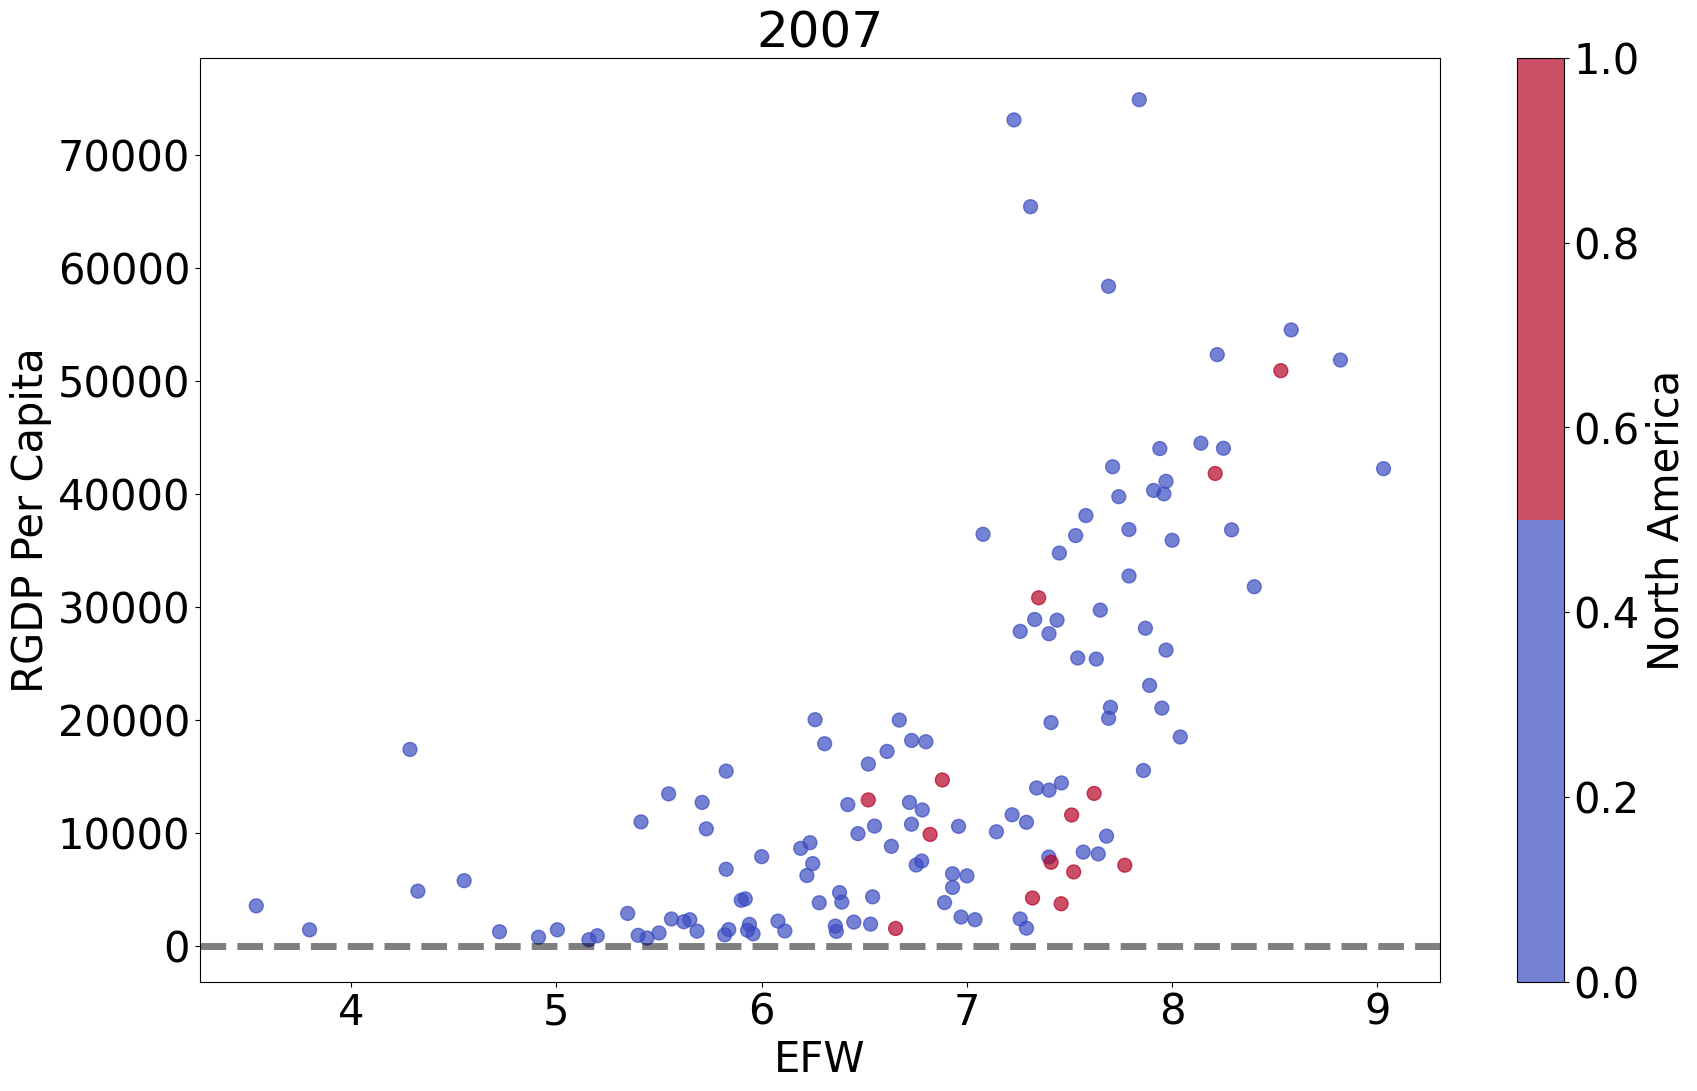

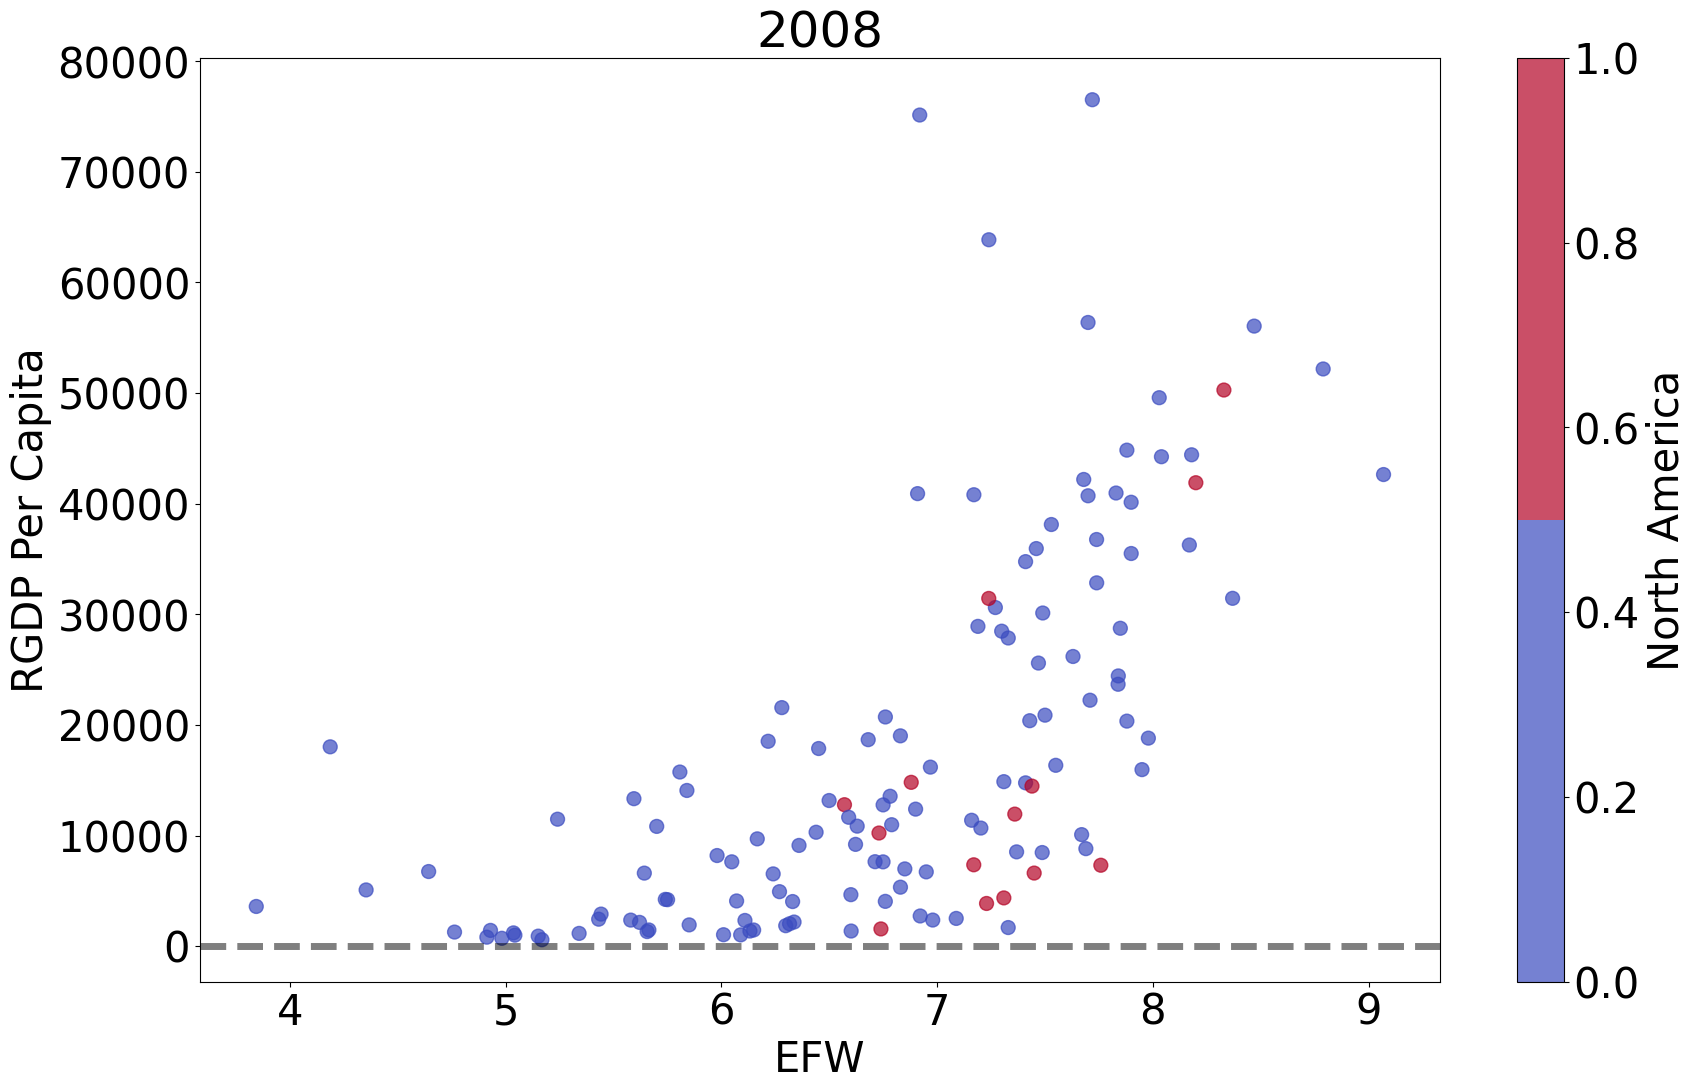

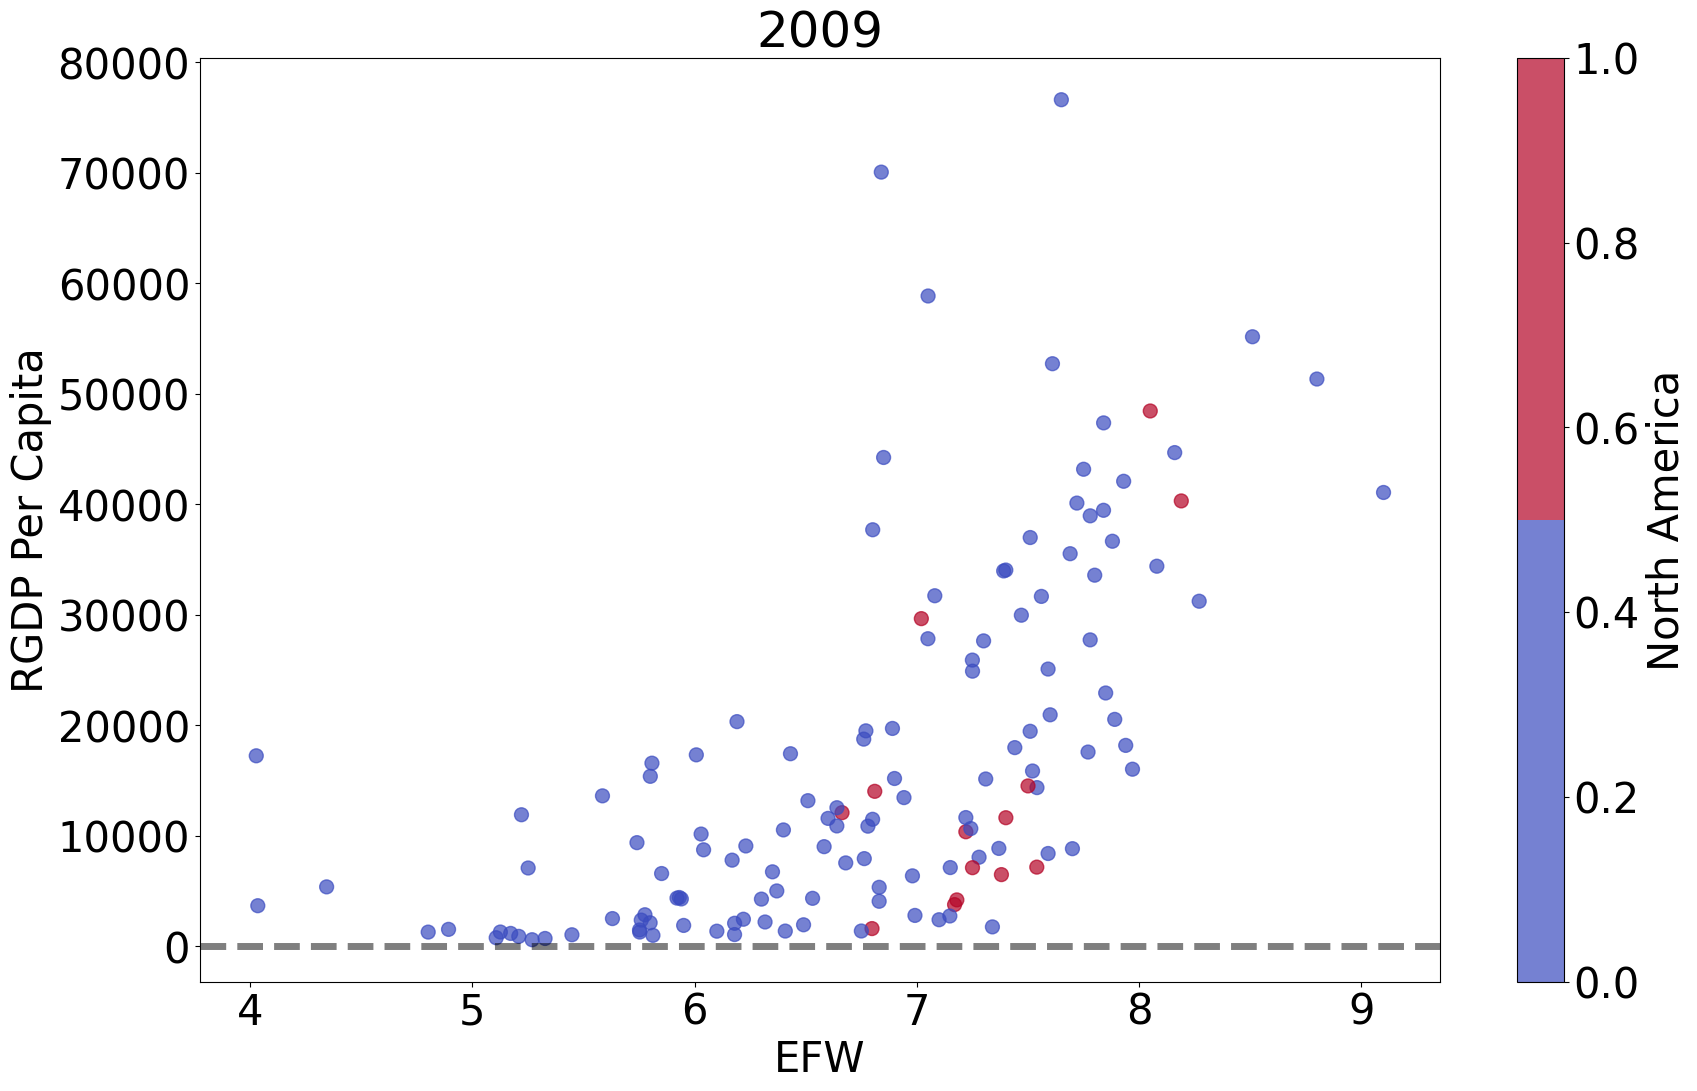

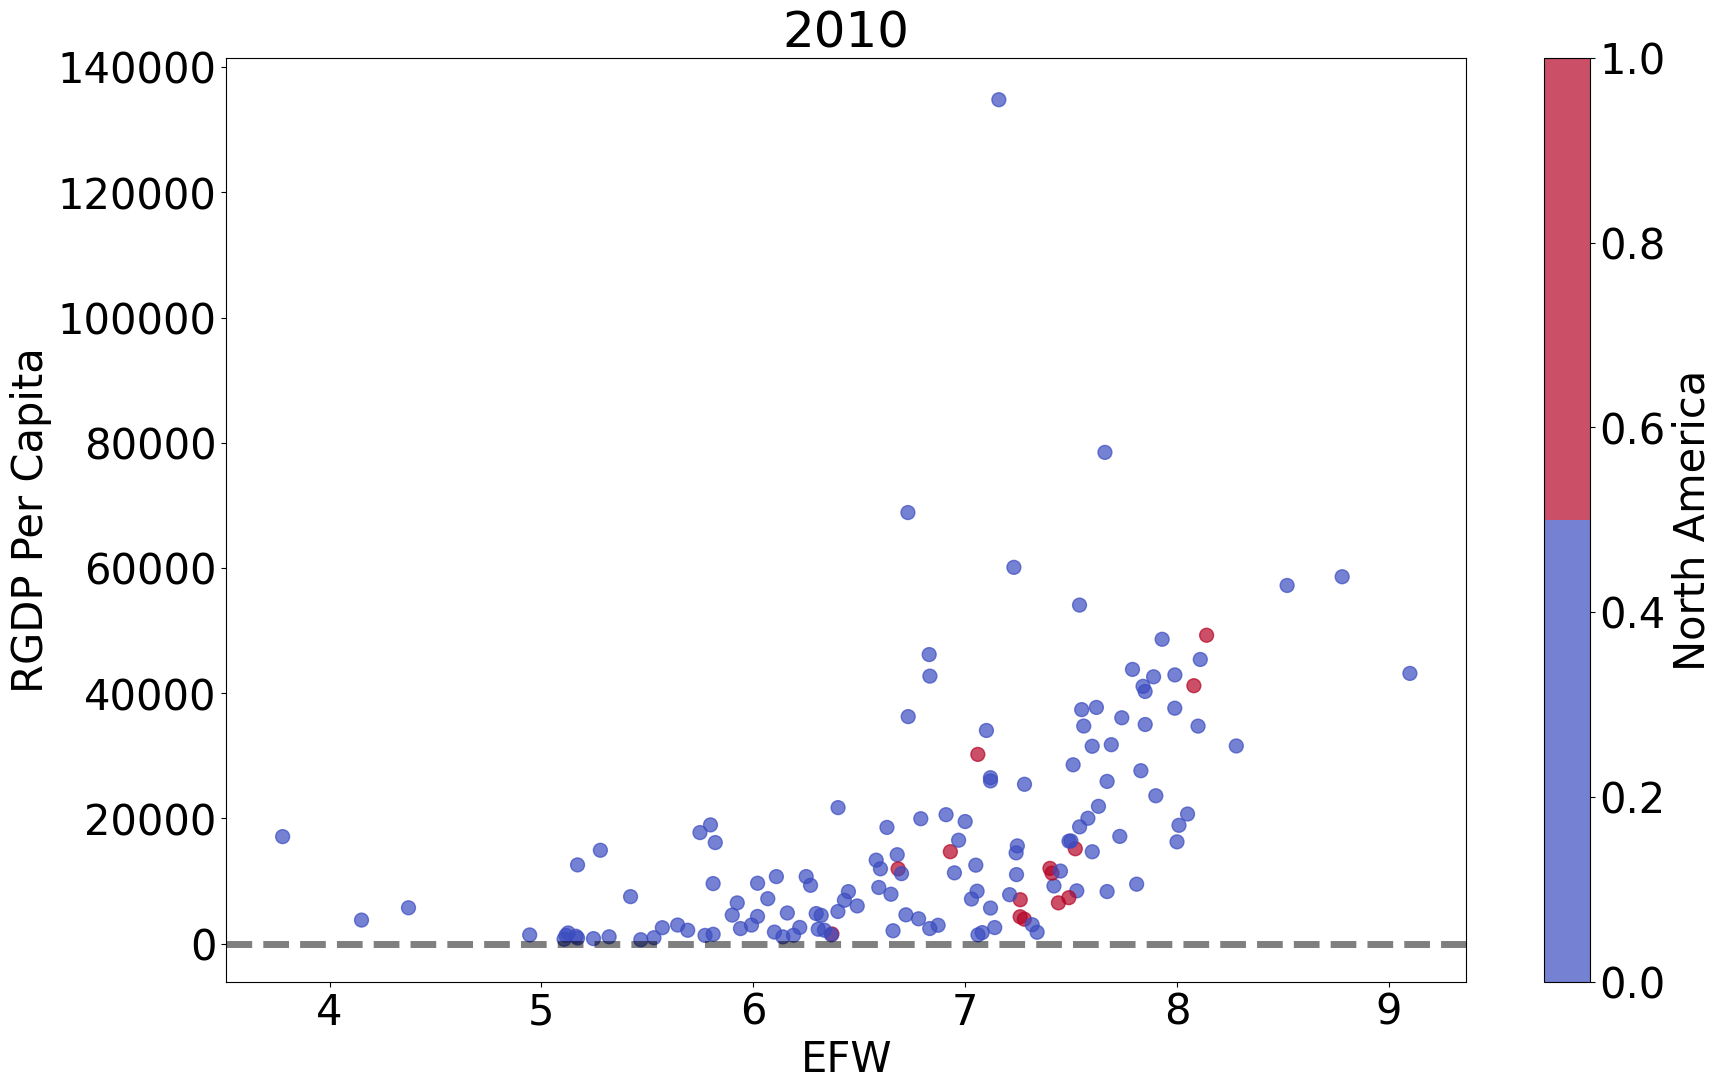

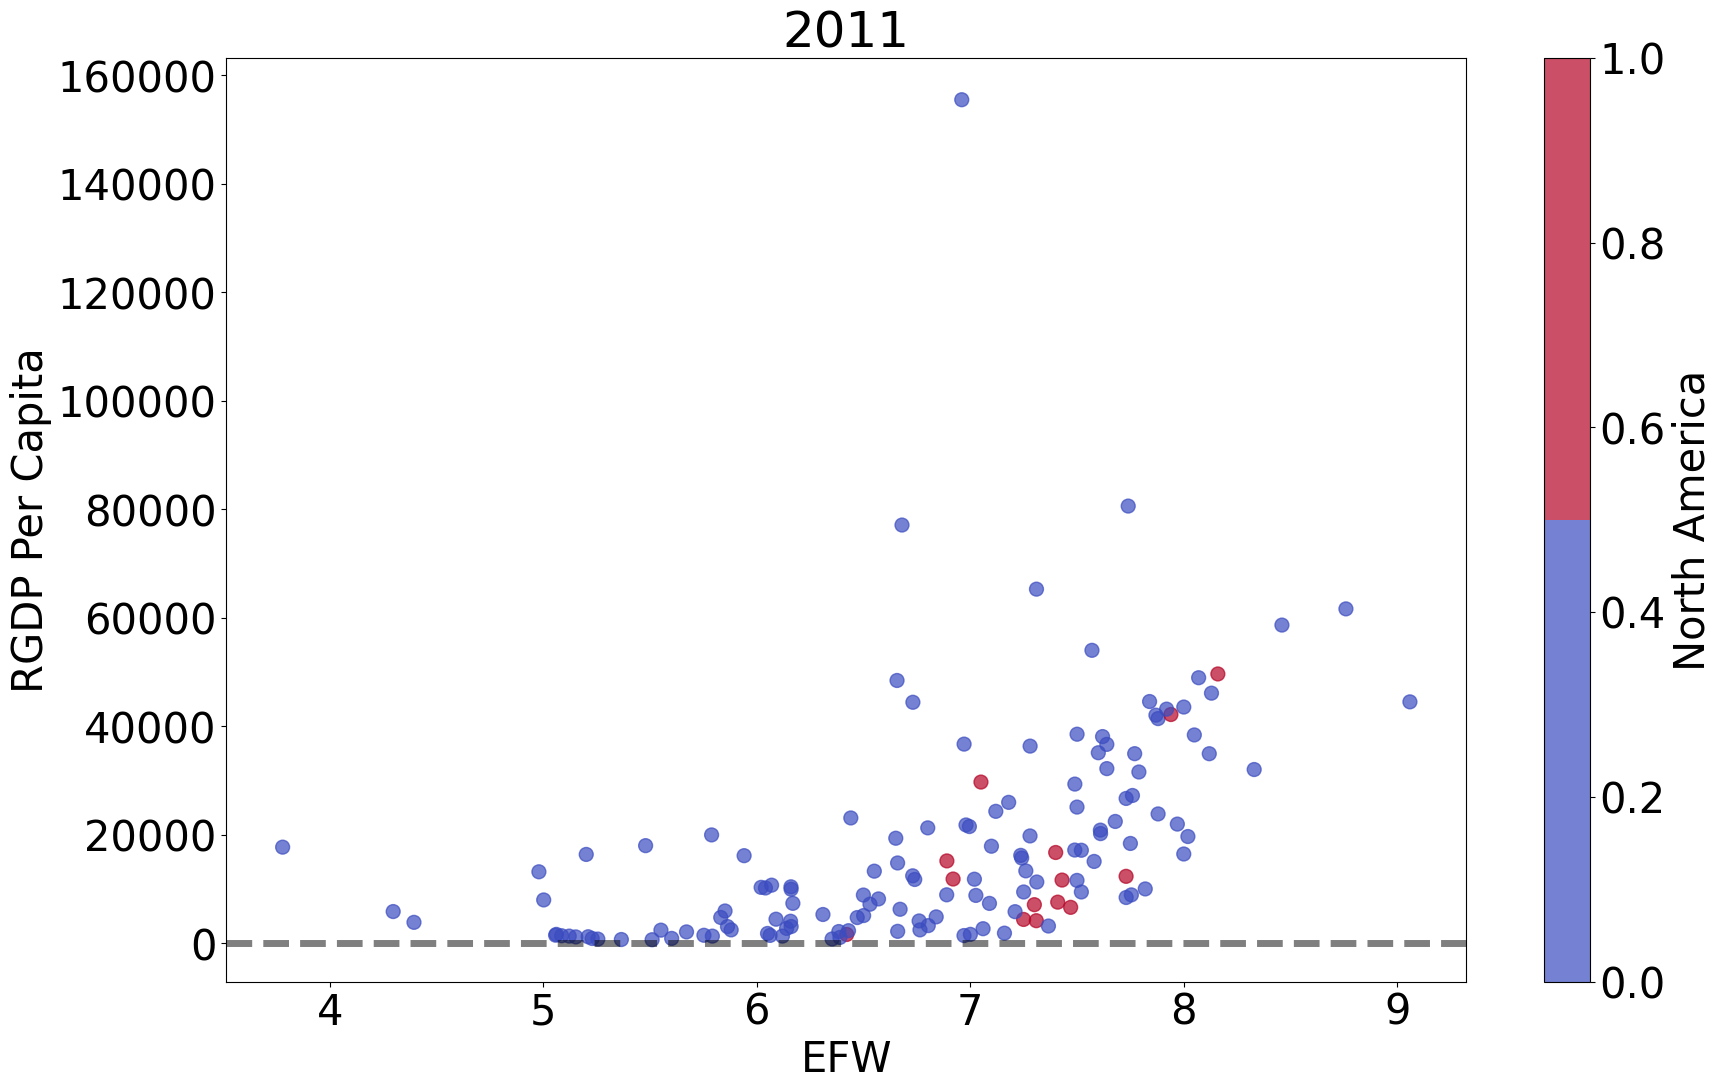

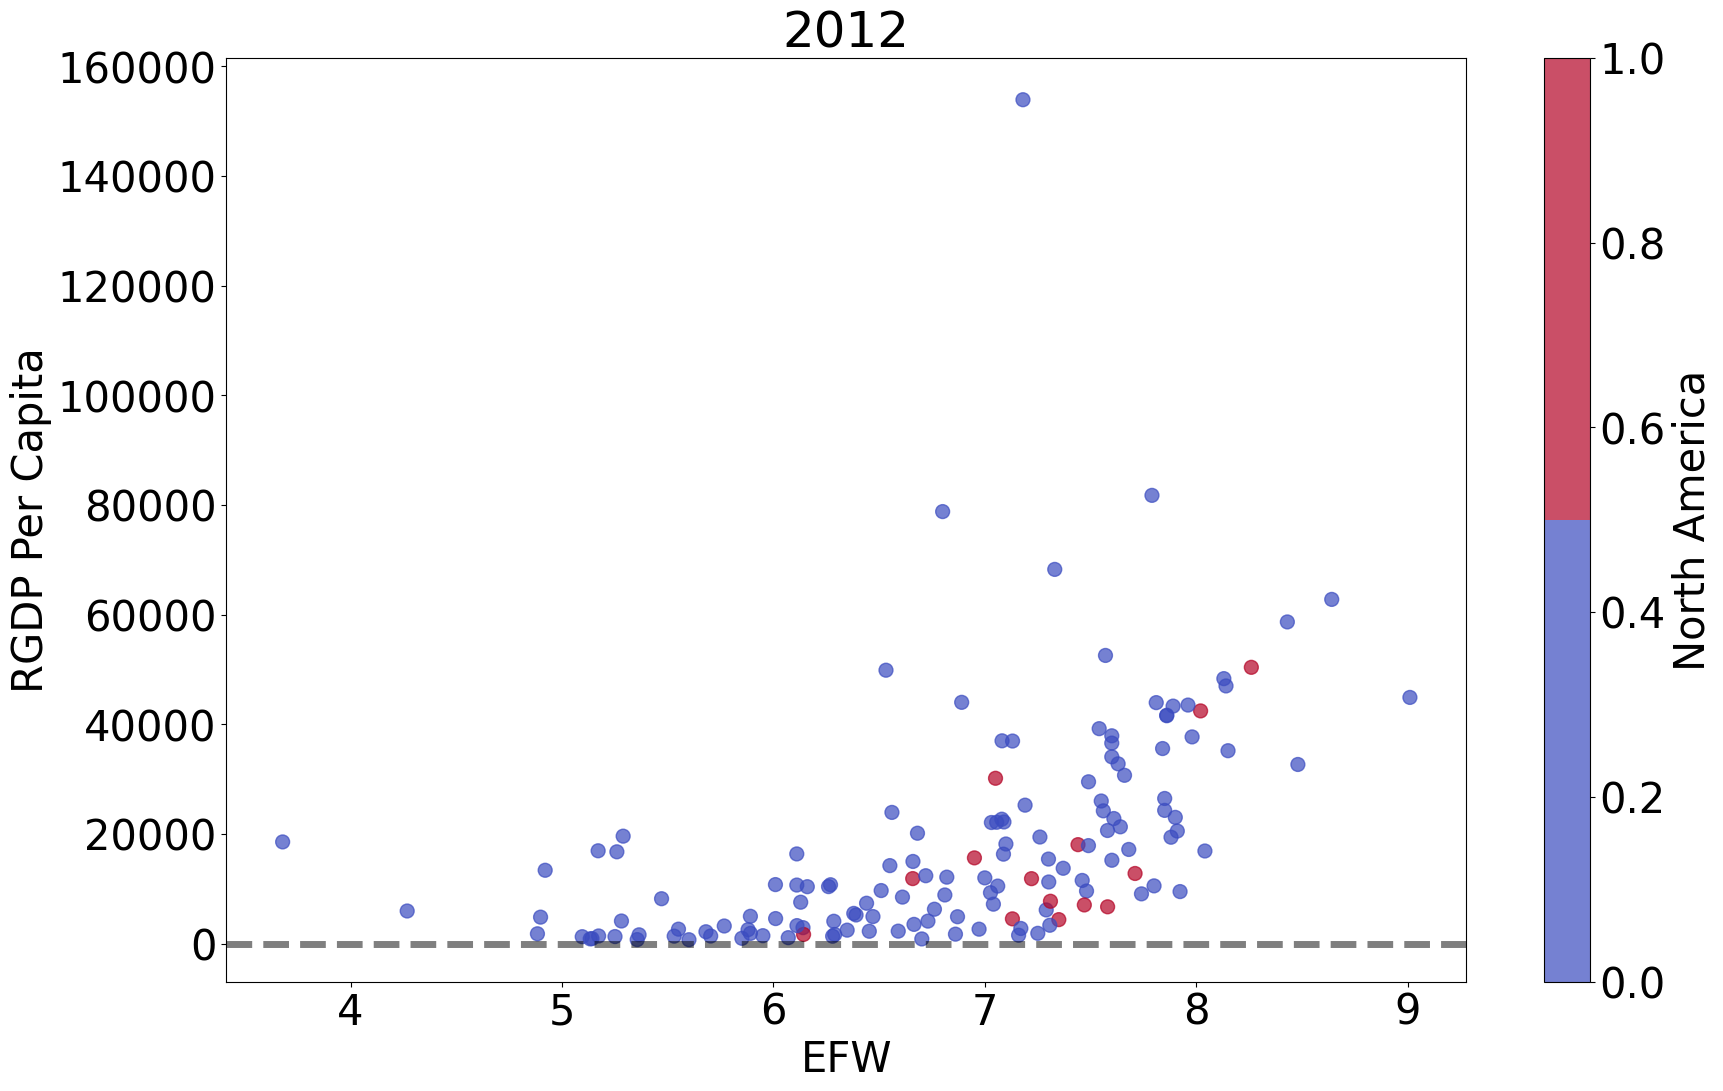

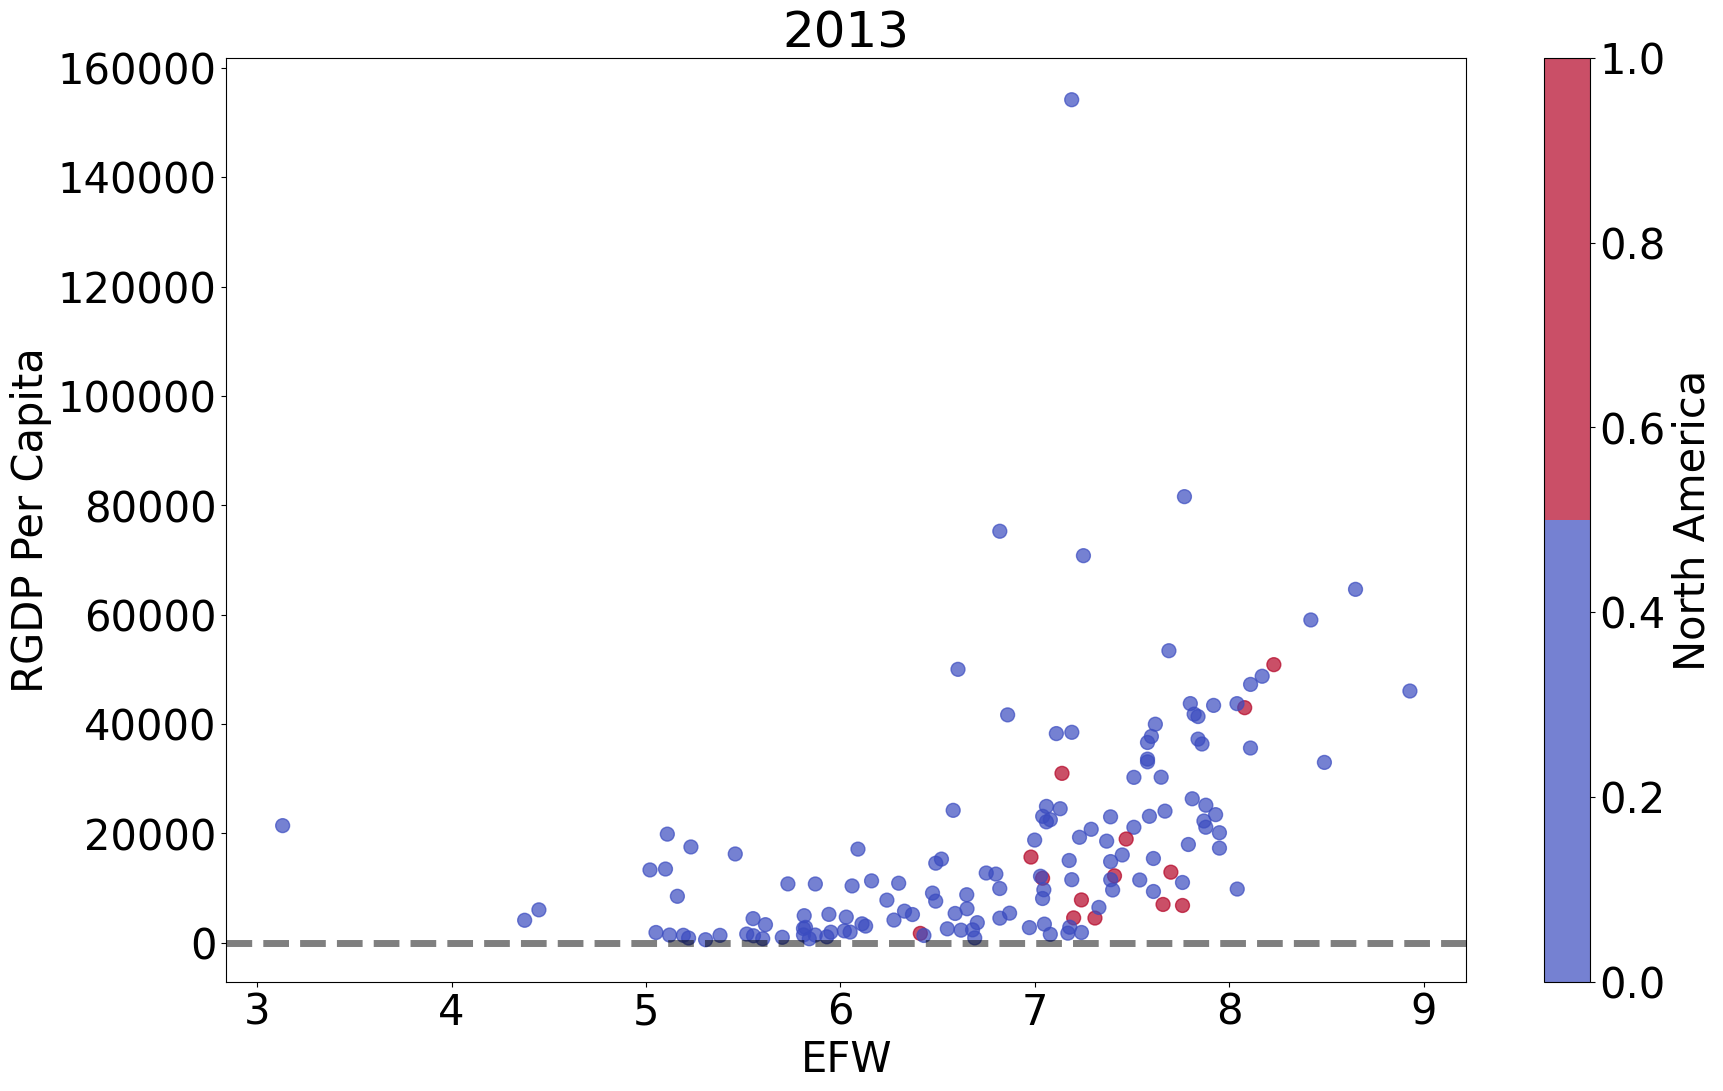

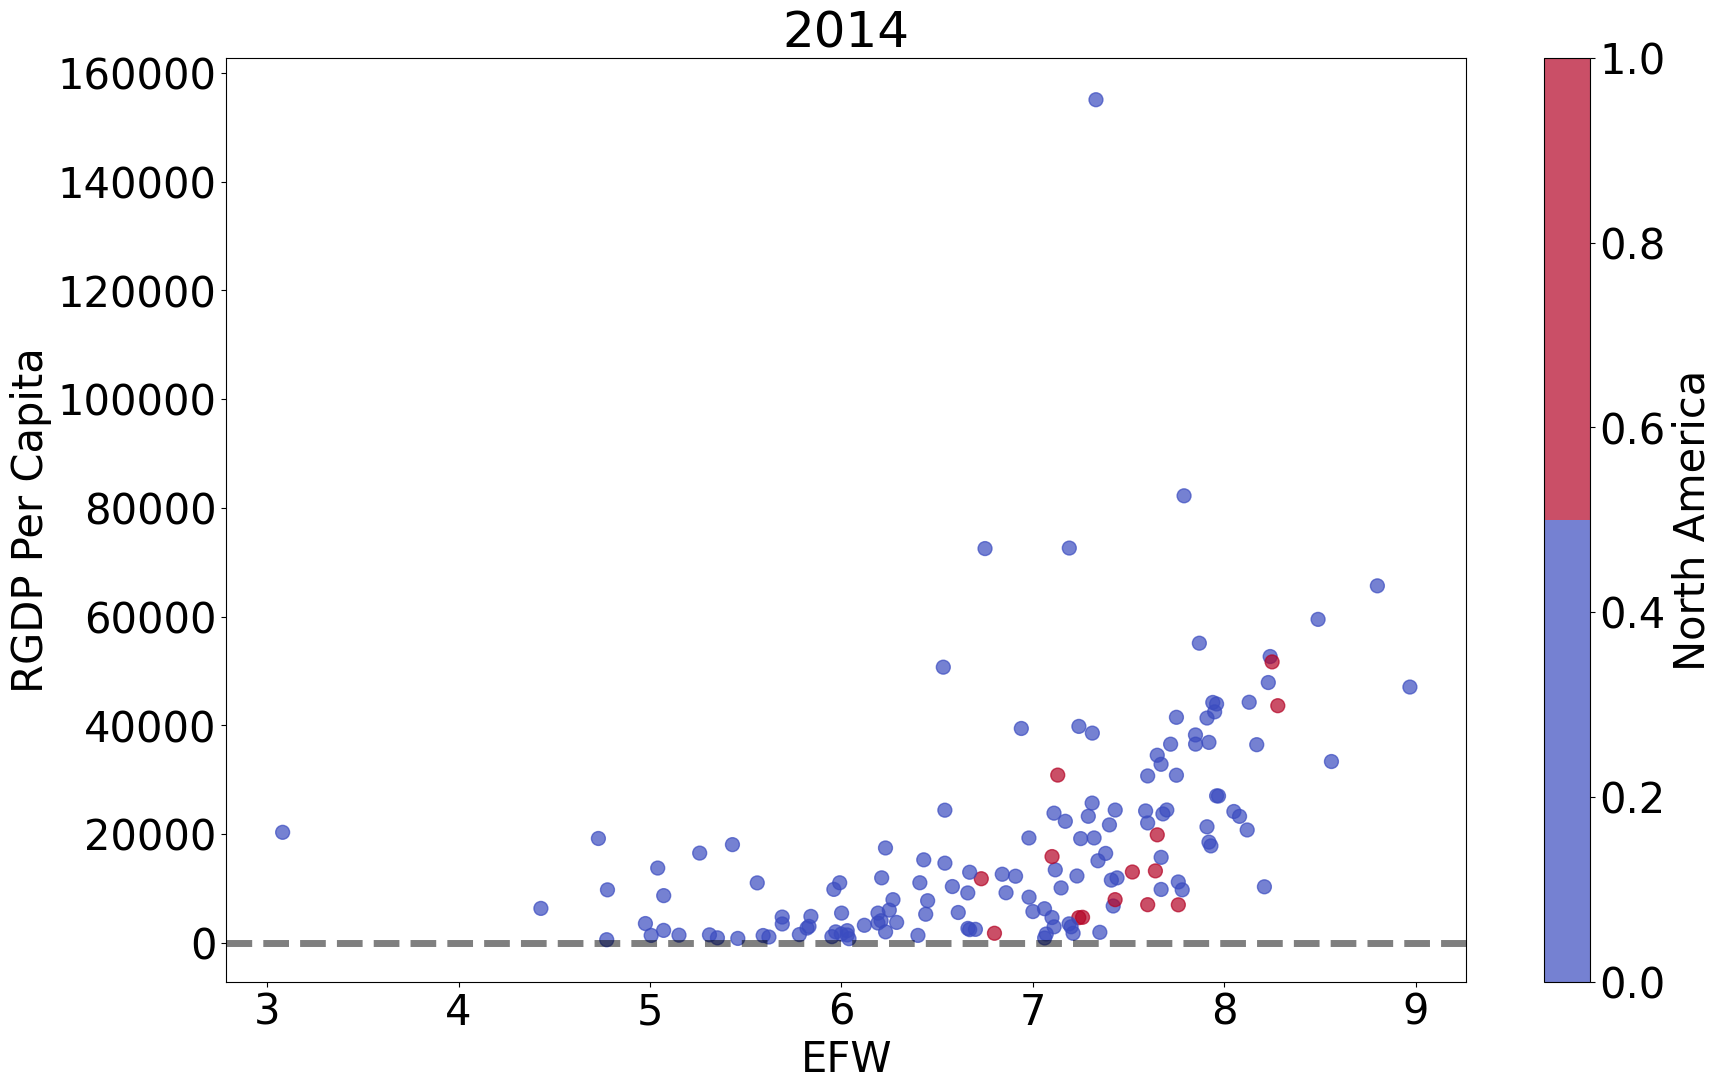

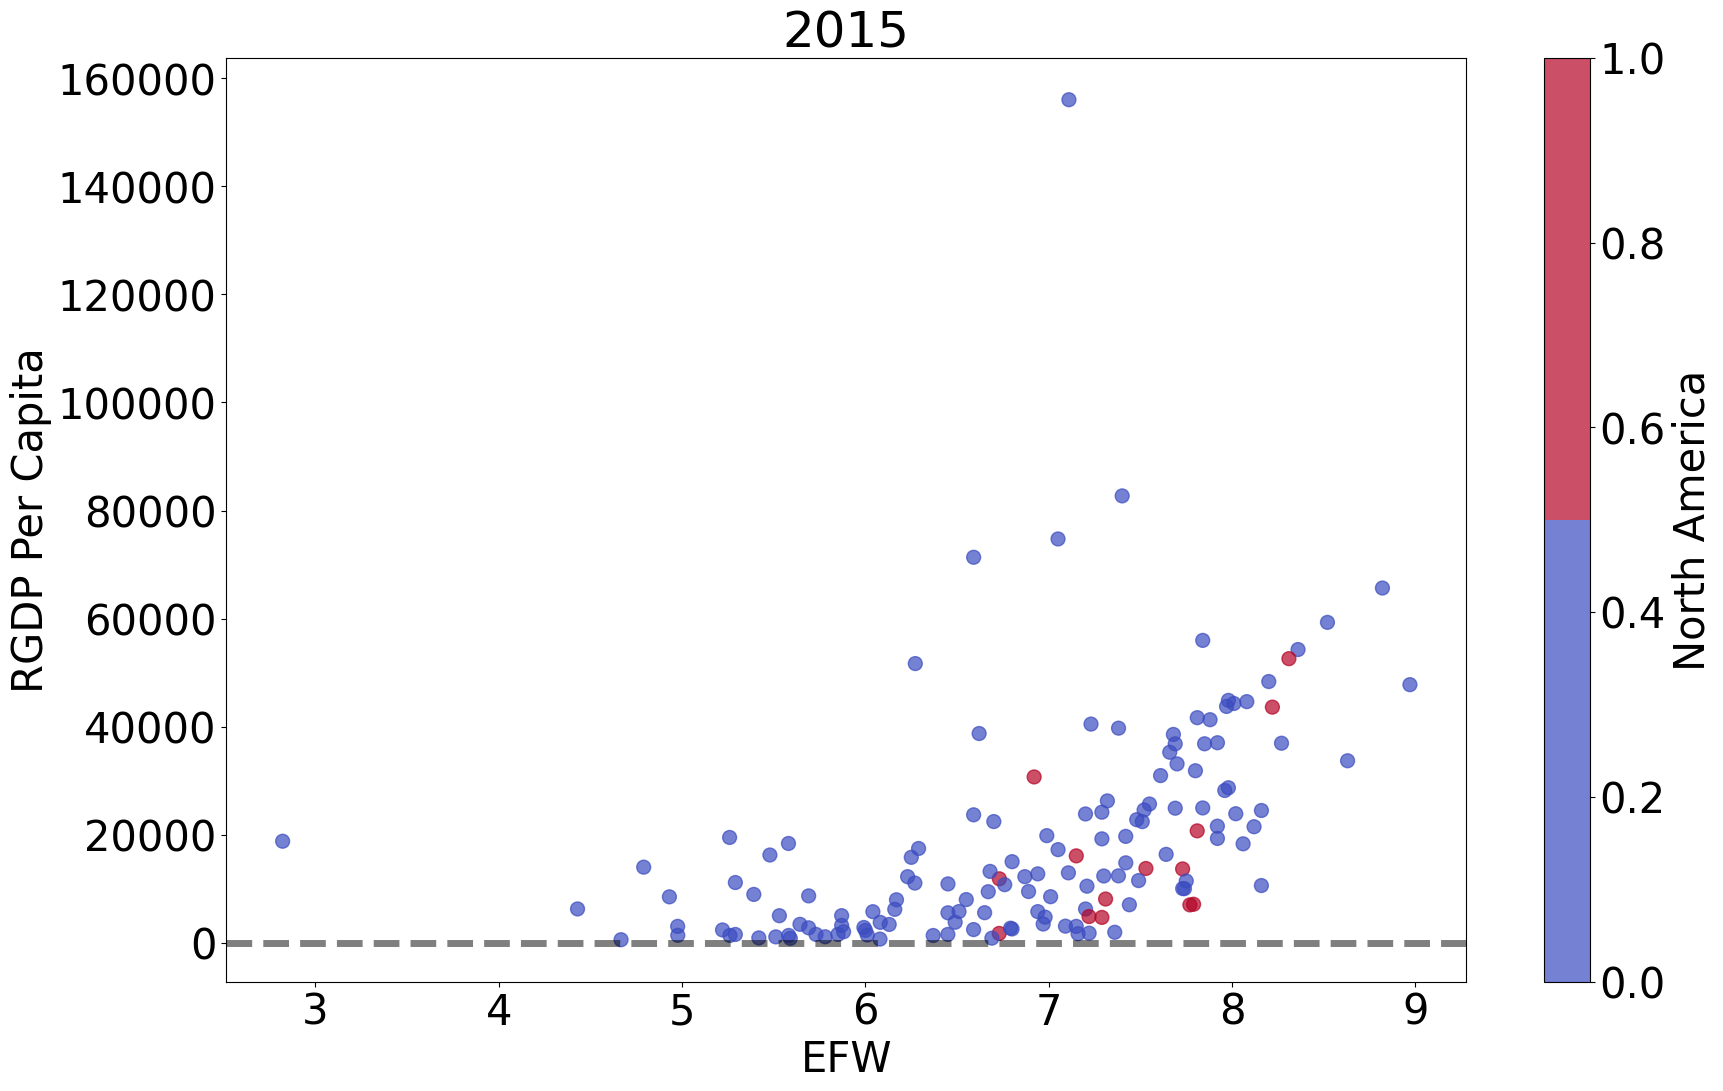

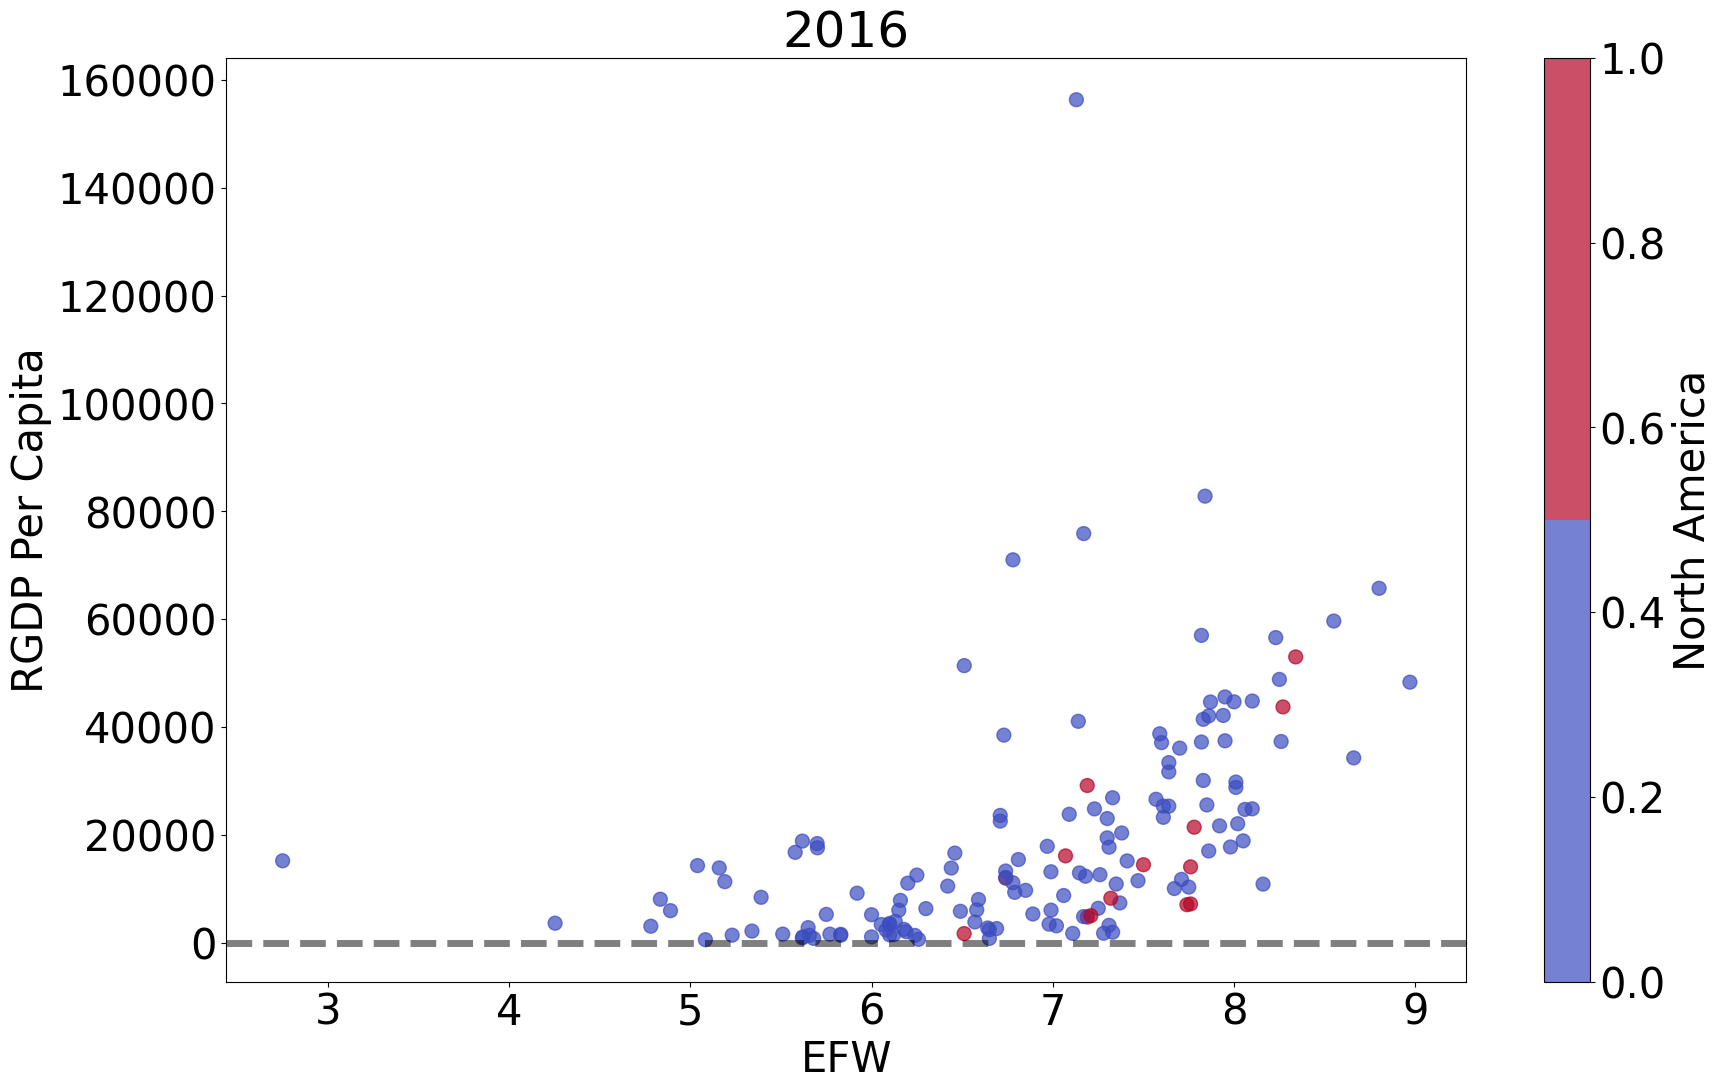

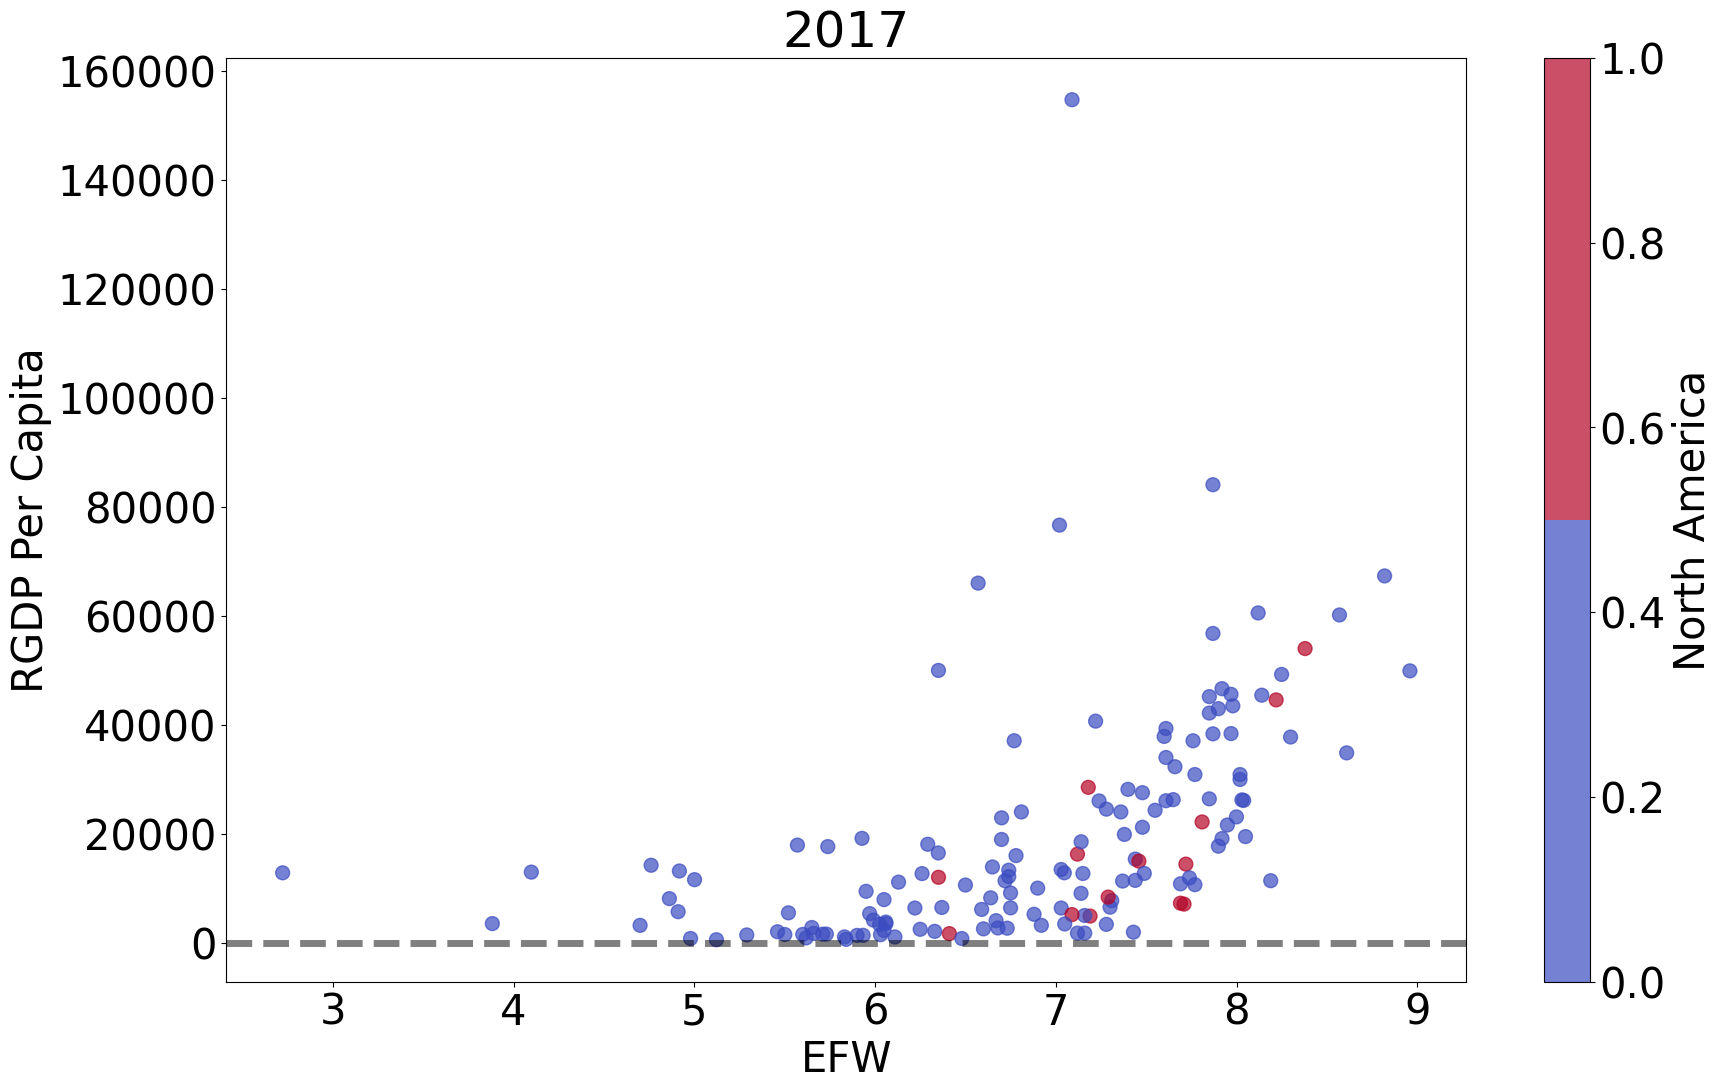

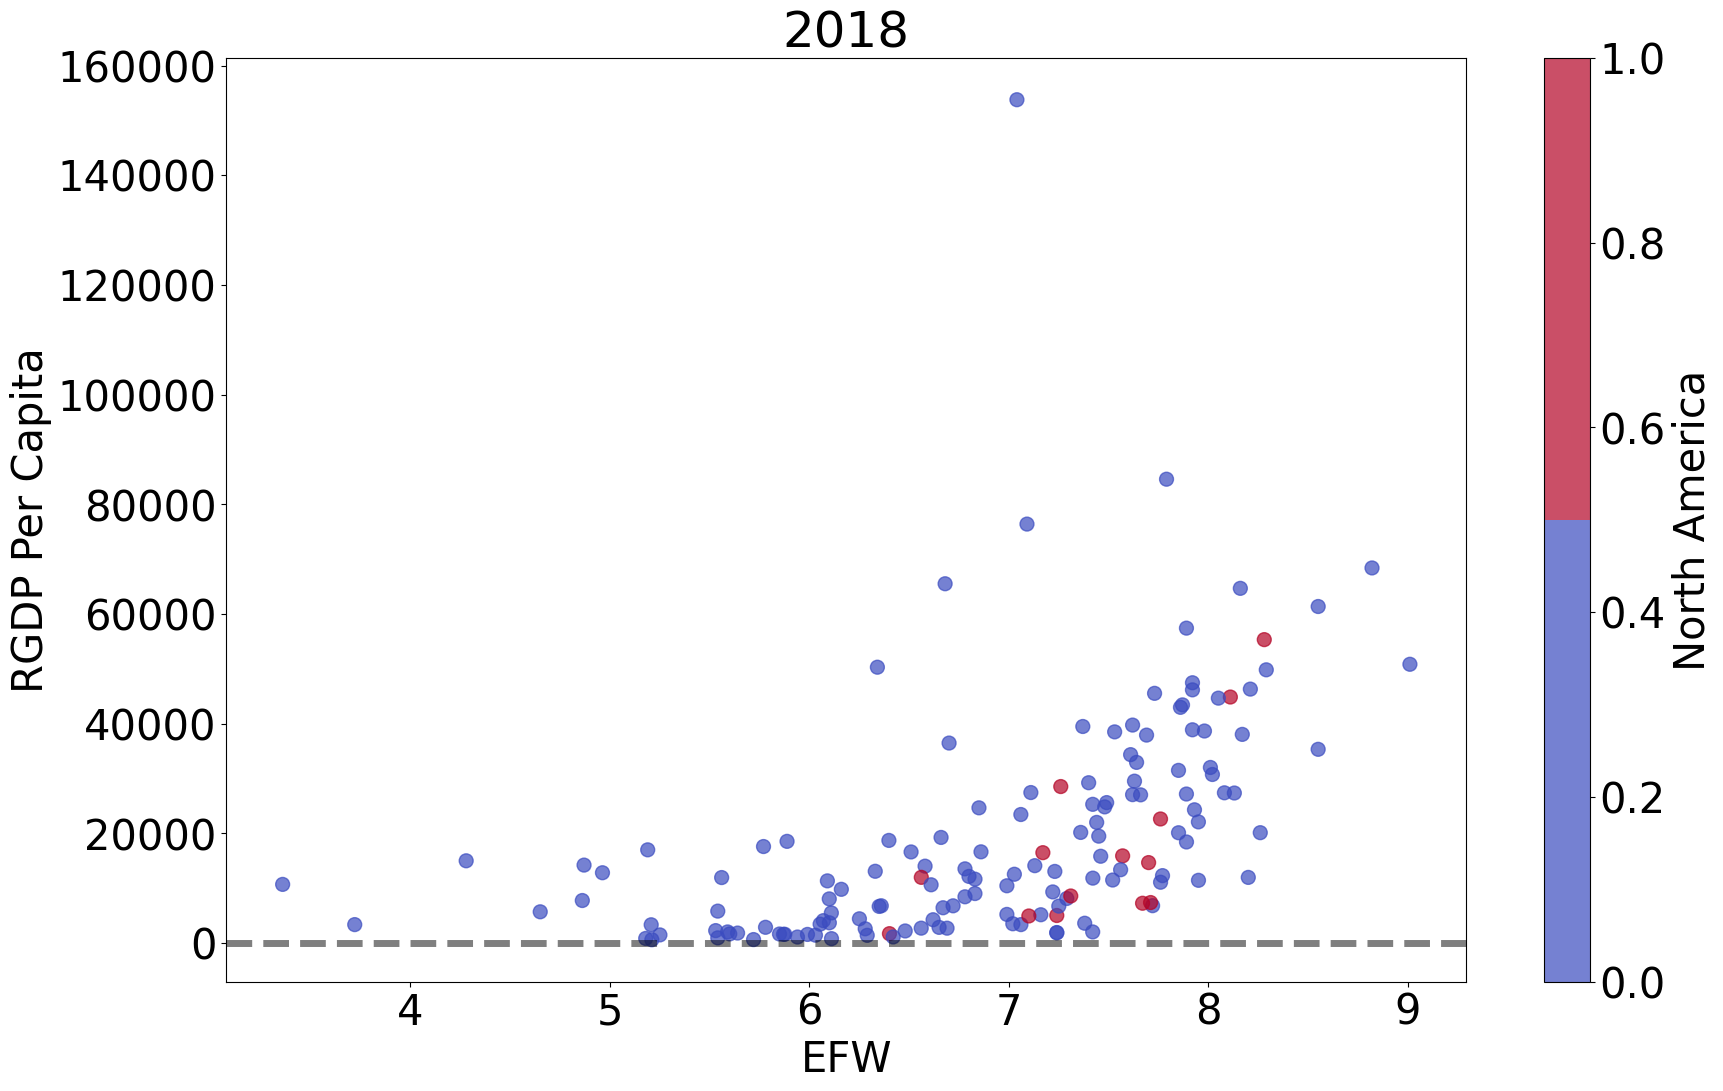

In [9]:
from matplotlib import cm
plt.rcParams.update({"font.size":30})
#year = 2000
years = sorted(data.dropna(subset = ["RGDP Per Capita"]).index.get_level_values("Year").unique())
norm = cm.colors.Normalize()
cmap = cm.get_cmap("coolwarm", 2)
for year in years:
    plot_data = data[data.index.get_level_values("Year") == str(year)]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW",
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = cmap,
                          s = 100,
                          alpha = 0.7,
                          ax =ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls="--", color = "k", alpha = 0.5, linewidth = 5)

In [10]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

In [13]:
def create_quantile(n, 
                    data, 
                    year, 
                    quantile_var,
                    quantile_name):  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    for index in data[year_index].index:  
        val = data.loc[index][quantile_var]  
        for i in range(1, n + 1):  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                break   
            else:  
                 continue  
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)
data.loc["USA"].dropna()

ISO_Code_2 World Bank Region  \
Year                                      
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                                                     
2011-01-01                                                  H                                                                                     
2012-01-01                                                  H                                                                                     
2013-01-01                                                  H                                                                                     
2014-01-01                                                  H                                                                                     
2015-01-01                                                  H                                                                                     
2016-01-01                                                  H                    

Text(0.5, 1.0, 'Year: 2016')

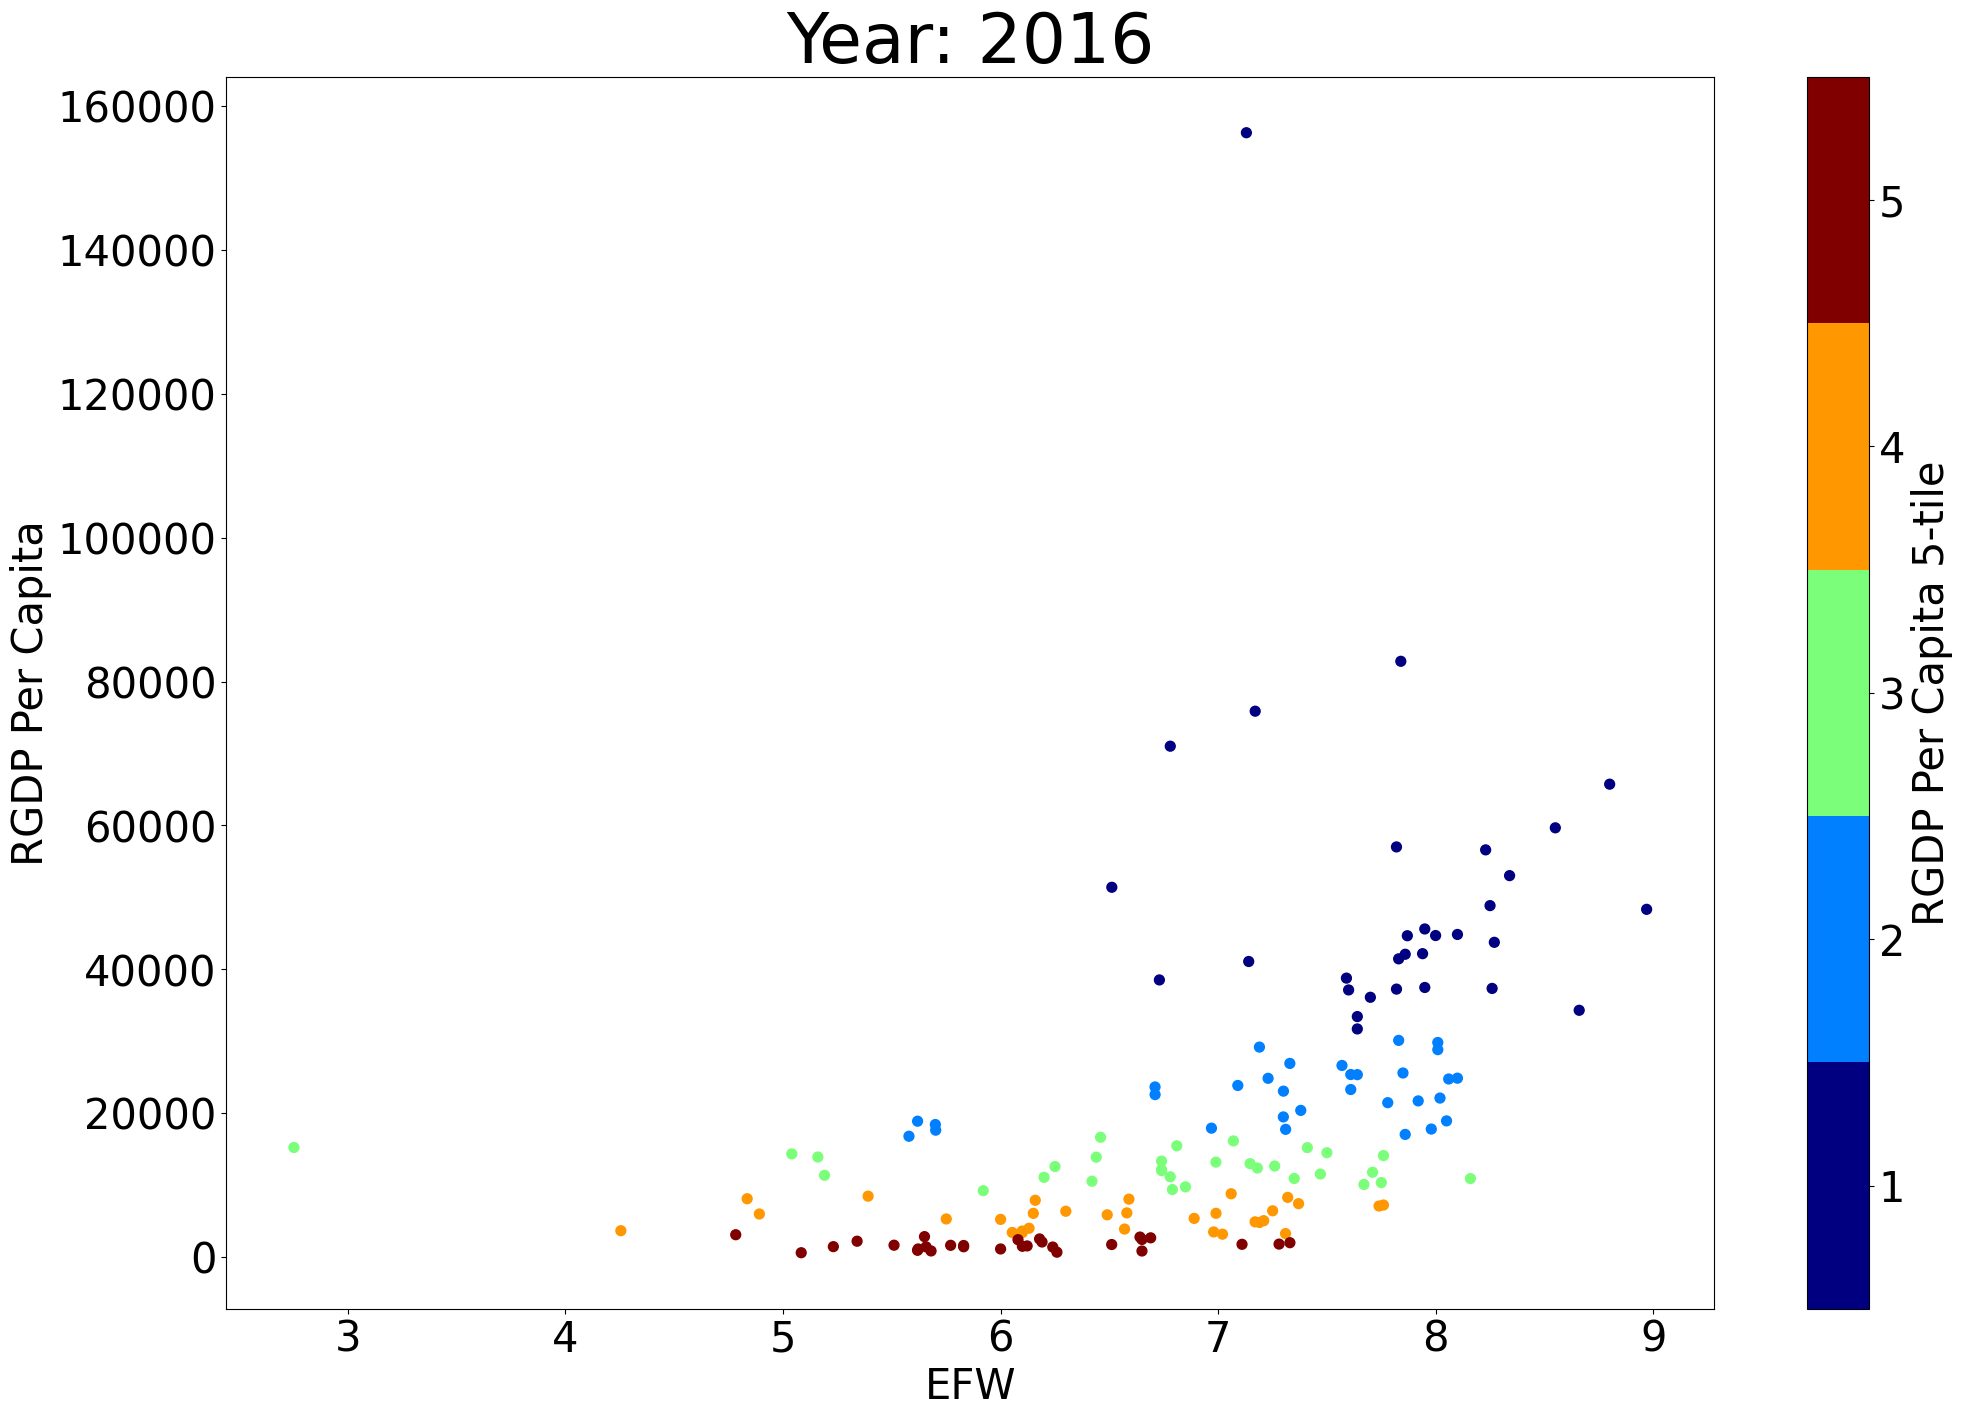

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 5 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
# plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                       cmap = cmap, 
                       ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)